**Background and Context:**

The Policy Maker of a tourism company named "Visit with us" wants to enable and establish a viable business model to expand the customer base. A viable business model is a central concept that helps to understand the existing ways of doing the business and how to change the ways for the benefit of the tourism sector. One of the ways to expand the customer base is to introduce a new offering of packages. Currently, 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages. However, it was difficult to identify the potential customers because customers were contacted at random without looking at the available information.

The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being. This time, company wants to harness the available data of existing and potential customers to target the right customers.

As Data Scientist at "Visit with us" travel company, we have to analyze the customers' data and information to provide recommendations to the Policy Maker and build a model to predict the potential customer who is going to purchase the newly introduced travel package. The model will be built to make predictions before a customer is contacted.


**Objective:**

- To analyze the customers' data and information to provide recommendations to the Policy Maker
- To predict which customer is more likely to purchase the newly introduced travel package.


**Data Dictionary:**

Customer details:

* CustomerID: Unique customer ID
* ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)
* Age: Age of customer
* TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
* CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered 
i.e. Tier 1 > Tier 2 > Tier 3. It's the city the customer lives in.
* Occupation: Occupation of customer
* Gender: Gender of customer
* NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
* PreferredPropertyStar: Preferred hotel property rating by customer
* MaritalStatus: Marital status of customer
* NumberOfTrips: Average number of trips in a year by customer
* Passport: The customer has a passport or not (0: No, 1: Yes)
* OwnCar: Whether the customers own a car or not (0: No, 1: Yes)
* NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer
* Designation: Designation of the customer in the current organization
* MonthlyIncome: Gross monthly income of the customer

Customer interaction data: 

* PitchSatisfactionScore: Sales pitch satisfaction score
* ProductPitched: Product pitched by the salesperson
* NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch
* DurationOfPitch: Duration of the pitch by a salesperson to the customer


# Import the necessary packages

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

pd.set_option("mode.chained_assignment", None)


# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier,
    StackingClassifier,
)
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    precision_recall_fscore_support,
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    make_scorer,
    roc_curve,
)

<IPython.core.display.Javascript object>

# Loading and exploring the dataset

In [2]:
tourism = pd.read_excel("Tourism.xlsx", sheet_name="Tourism")

<IPython.core.display.Javascript object>

In [3]:
# copying data to another varaible to avoid any changes to original data
data = tourism.copy()

<IPython.core.display.Javascript object>

### View the first and last 5 rows of the dataset.

In [4]:
data.head(10)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
5,200005,0,32.0,Company Invited,1,8.0,Salaried,Male,3,3.0,Basic,3.0,Single,1.0,0,5,1,1.0,Executive,18068.0
6,200006,0,59.0,Self Enquiry,1,9.0,Small Business,Female,2,2.0,Basic,5.0,Divorced,5.0,1,2,1,1.0,Executive,17670.0
7,200007,0,30.0,Self Enquiry,1,30.0,Salaried,Male,3,3.0,Basic,3.0,Married,2.0,0,2,0,1.0,Executive,17693.0
8,200008,0,38.0,Company Invited,1,29.0,Salaried,Male,2,4.0,Standard,3.0,Unmarried,1.0,0,3,0,0.0,Senior Manager,24526.0
9,200009,0,36.0,Self Enquiry,1,33.0,Small Business,Male,3,3.0,Deluxe,3.0,Divorced,7.0,0,3,1,0.0,Manager,20237.0


<IPython.core.display.Javascript object>

In [5]:
data.tail(10)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
4878,204878,1,35.0,Self Enquiry,1,17.0,Small Business,Male,3,4.0,Deluxe,5.0,Unmarried,3.0,0,4,0,1.0,Manager,24803.0
4879,204879,1,26.0,Self Enquiry,2,27.0,Small Business,Female,4,4.0,Basic,4.0,Married,2.0,1,3,0,2.0,Executive,22347.0
4880,204880,1,59.0,Self Enquiry,1,28.0,Small Business,Female,4,4.0,Deluxe,4.0,Married,6.0,0,3,1,2.0,Manager,28686.0
4881,204881,1,41.0,Self Enquiry,2,25.0,Salaried,Male,3,2.0,Basic,5.0,Married,2.0,0,1,1,2.0,Executive,21065.0
4882,204882,1,37.0,Self Enquiry,2,20.0,Salaried,Male,3,5.0,Basic,5.0,Married,6.0,1,5,1,2.0,Executive,23317.0
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0
4887,204887,1,36.0,Self Enquiry,1,14.0,Salaried,Male,4,4.0,Basic,4.0,Unmarried,3.0,1,3,1,2.0,Executive,24041.0


<IPython.core.display.Javascript object>

### Understand the shape of the dataset.

In [6]:
data.shape

(4888, 20)

<IPython.core.display.Javascript object>

* Dataset has 4888 rows and 20 columns.

### Check the data types of the columns for the dataset.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

<IPython.core.display.Javascript object>

* 14 of 20 columns of the data set are numerical.
* Is it correct? We'll take a look on the point later.

### Dropping column 'CustomerID'

* There is one different 'CustomerID' at each row of the dataset. We should drop this column as it doesn't bring any added value for the analysis 

In [8]:
data.drop("CustomerID", inplace=True, axis=1)

<IPython.core.display.Javascript object>

### Check for missing values

In [9]:
data.isnull().sum().sort_values(ascending=False)

DurationOfPitch             251
MonthlyIncome               233
Age                         226
NumberOfTrips               140
NumberOfChildrenVisiting     66
NumberOfFollowups            45
PreferredPropertyStar        26
TypeofContact                25
Designation                   0
OwnCar                        0
PitchSatisfactionScore        0
Passport                      0
ProdTaken                     0
MaritalStatus                 0
NumberOfPersonVisiting        0
Gender                        0
Occupation                    0
CityTier                      0
ProductPitched                0
dtype: int64

<IPython.core.display.Javascript object>

* Most rows don't have missing values
* The columns  `DurationOfPitch`, `MonthlyIncome` and `Age` have a lot of missing values. These could be customers who were contacted at random and their details were not reported
* There is no missing values in the target column `ProdTaken`

In [10]:
# counting the number of missing values per row
data.isnull().sum(axis=1).value_counts()

0    4128
1     533
2     202
3      25
dtype: int64

<IPython.core.display.Javascript object>

In [11]:
# most rows don't have missing values now
num_missing = data.isnull().sum(axis=1)
num_missing.value_counts()

0    4128
1     533
2     202
3      25
dtype: int64

<IPython.core.display.Javascript object>

* I'll check the rows that have exactly 2 and exactly 3 missing values to see what's going on.

In [12]:
# these are missing `Age` and `MonthlyIncome`
data[num_missing == 2].sample(n=5)

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
1868,0,37.0,Company Invited,1,NaN,Small Business,Female,3,3.0,Deluxe,3.0,Married,4.0,1,3,1,2.0,Manager,NaN
1091,0,33.0,Self Enquiry,1,NaN,Salaried,Male,2,4.0,Deluxe,4.0,Single,2.0,0,1,0,1.0,Manager,NaN
2335,0,NaN,Self Enquiry,3,35.0,Salaried,Male,3,3.0,Deluxe,5.0,Married,1.0,0,1,1,0.0,Manager,NaN
1406,0,54.0,Self Enquiry,1,NaN,Small Business,Female,3,3.0,Deluxe,5.0,Single,7.0,1,1,0,0.0,Manager,NaN
581,0,NaN,Self Enquiry,1,6.0,Salaried,Male,2,5.0,Basic,3.0,Divorced,4.0,0,4,1,0.0,Executive,NaN


<IPython.core.display.Javascript object>

We don't know if the missingness has a structure to it. We'll investigate this.

In [13]:
# these are missing `TypeofContact`, `DurationOfPitch`  and `MonthlyIncome`
data[num_missing == 3].sample(n=5)

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
598,1,28.0,NaN,1,NaN,Small Business,Male,2,3.0,Basic,3.0,Single,7.0,0,3,0,0.0,Executive,NaN
1356,0,41.0,NaN,3,NaN,Small Business,Female,2,3.0,Deluxe,4.0,Married,6.0,0,3,1,1.0,Manager,NaN
224,0,31.0,NaN,1,NaN,Small Business,Male,2,5.0,Deluxe,3.0,Divorced,1.0,0,3,1,0.0,Manager,NaN
2049,0,34.0,NaN,1,NaN,Small Business,Female,2,4.0,Basic,5.0,Single,2.0,0,1,1,0.0,Executive,NaN
2046,0,27.0,NaN,3,NaN,Small Business,Male,2,3.0,Deluxe,3.0,Married,1.0,0,3,1,1.0,Manager,NaN


<IPython.core.display.Javascript object>

In [14]:
for n in num_missing.value_counts().sort_index().index:
    if n > 0:
        print(f"For the rows with exactly {n} missing values, NAs are found in:")
        n_miss_per_col = data[num_missing == n].isnull().sum()
        print(n_miss_per_col[n_miss_per_col > 0])
        print("\n\n")

For the rows with exactly 1 missing values, NAs are found in:
Age                          96
DurationOfPitch             154
NumberOfFollowups            45
PreferredPropertyStar        26
NumberOfTrips               140
NumberOfChildrenVisiting     66
MonthlyIncome                 6
dtype: int64



For the rows with exactly 2 missing values, NAs are found in:
Age                130
DurationOfPitch     72
MonthlyIncome      202
dtype: int64



For the rows with exactly 3 missing values, NAs are found in:
TypeofContact      25
DurationOfPitch    25
MonthlyIncome      25
dtype: int64





<IPython.core.display.Javascript object>

* Certain columns tend to be missing together or all nonmissing together. Rows with exactly 2 missing values are the most important, followed respectively by rows with 1 and 3 missing values
* For modeling purpose, we will impute them 

#### Let us look at the entries with MonthlyIncome.

In [15]:
# select the rows of the column MonthlyIncome with no value
Monthly_Income_null = data[data.MonthlyIncome.isnull()]

<IPython.core.display.Javascript object>

In [16]:
# display the rows
Monthly_Income_null

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
11,0,NaN,Self Enquiry,1,21.0,Salaried,Female,2,4.0,Deluxe,3.0,Single,1.0,1,3,0,0.0,Manager,NaN
19,0,NaN,Self Enquiry,1,8.0,Salaried,Male,2,3.0,Basic,3.0,Single,6.0,1,4,0,1.0,Executive,NaN
20,0,NaN,Company Invited,1,17.0,Salaried,Female,3,2.0,Deluxe,3.0,Married,1.0,0,3,1,2.0,Manager,NaN
26,1,NaN,Company Invited,1,22.0,Salaried,Female,3,5.0,Basic,5.0,Single,2.0,1,4,1,2.0,Executive,NaN
44,0,NaN,Company Invited,1,6.0,Small Business,Female,2,3.0,Deluxe,3.0,Single,2.0,0,3,1,0.0,Manager,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2390,1,34.0,Company Invited,3,NaN,Salaried,Female,2,5.0,Basic,3.0,Single,2.0,0,3,0,1.0,Executive,NaN
2399,1,NaN,Company Invited,3,19.0,Large Business,Female,2,3.0,Deluxe,4.0,Single,6.0,0,3,1,0.0,Manager,NaN
2410,1,NaN,Self Enquiry,1,30.0,Small Business,Male,2,3.0,Basic,4.0,Married,2.0,1,1,0,0.0,Executive,NaN
2430,1,NaN,Self Enquiry,1,14.0,Small Business,Female,3,3.0,Basic,5.0,Married,2.0,1,3,0,2.0,Executive,NaN


<IPython.core.display.Javascript object>

##### Check the null values in all the columns of this new dataset

In [17]:
Monthly_Income_null.isnull().sum()

ProdTaken                     0
Age                         130
TypeofContact                25
CityTier                      0
DurationOfPitch              97
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups             0
ProductPitched                0
PreferredPropertyStar         0
MaritalStatus                 0
NumberOfTrips                 0
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting      0
Designation                   0
MonthlyIncome               233
dtype: int64

<IPython.core.display.Javascript object>

In [18]:
# checking the summary of the data with missing values in MonthlyIncome
Monthly_Income_null[Monthly_Income_null.MonthlyIncome.isnull()].describe(
    include="all"
).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ProdTaken,233.0,NaN,NaN,NaN,0.137339,0.344946,0.0,0.0,0.0,0.0,1.0
Age,103.0,NaN,NaN,NaN,34.951456,8.170222,24.0,28.0,34.0,40.0,56.0
TypeofContact,208,2,Self Enquiry,138,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CityTier,233.0,NaN,NaN,NaN,1.55794,0.884414,1.0,1.0,1.0,3.0,3.0
DurationOfPitch,136.0,NaN,NaN,NaN,14.242647,8.068683,5.0,8.0,11.0,17.25,35.0
Occupation,233,3,Small Business,114,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,233,2,Male,135,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfPersonVisiting,233.0,NaN,NaN,NaN,2.313305,0.533889,1.0,2.0,2.0,3.0,4.0
NumberOfFollowups,233.0,NaN,NaN,NaN,3.236052,0.793337,1.0,3.0,3.0,4.0,5.0
ProductPitched,233,2,Deluxe,146,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>

* The entries with no values on 'MonthlyIncome' concern 2 Product pitched by the salesperson : Deluxe and Basic and 2 Designation of the customer : Manager and Executive)
* Those empty entries concern people aged in range 24 to 56 years old


#### filling in with a standard value

In [19]:
# counting the items of the column 'TypeofContact'
data["TypeofContact"].value_counts(dropna=False)

Self Enquiry       3444
Company Invited    1419
NaN                  25
Name: TypeofContact, dtype: int64

<IPython.core.display.Javascript object>

In [20]:
# we need to replace nans with string value 'is_missing'
data["TypeofContact"].fillna("is_missing", inplace=True)

<IPython.core.display.Javascript object>

In [21]:
data["TypeofContact"].dtypes

dtype('O')

<IPython.core.display.Javascript object>

In [22]:
data["TypeofContact"].value_counts(dropna=False)

Self Enquiry       3444
Company Invited    1419
is_missing           25
Name: TypeofContact, dtype: int64

<IPython.core.display.Javascript object>

* The column 'TypeofContact' is now filled. No missing values anymore

##### We will fill the missing values in `Age`, `DurationOfPitch`, `NumberOfFollowups`, `PreferredPropertyStar`, `NumberOfTrips`, `NumberOfChildrenVisiting` and `MonthlyIncome` columns by the median values grouped by `ProductPitched` and `Designation`.

In [23]:
df = data.copy()

df[
    [
        "Age",
        "DurationOfPitch",
        "NumberOfFollowups",
        "PreferredPropertyStar",
        "NumberOfTrips",
        "NumberOfChildrenVisiting",
        "MonthlyIncome",
    ]
] = df.groupby(["ProductPitched", "Designation"])[
    [
        "Age",
        "DurationOfPitch",
        "NumberOfFollowups",
        "PreferredPropertyStar",
        "NumberOfTrips",
        "NumberOfChildrenVisiting",
        "MonthlyIncome",
    ]
].transform(
    lambda x: x.fillna(x.median())
)

# checking for missing values
df.isnull().sum()

ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

<IPython.core.display.Javascript object>

* Missing values have been computed

In [24]:
# Check if we have missing values in all the dataset rows
df.isnull().sum()

ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

<IPython.core.display.Javascript object>

* No missing values in the whole dataset rows

### Check the data types of the columns for the dataset.

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ProdTaken                 4888 non-null   int64  
 1   Age                       4888 non-null   float64
 2   TypeofContact             4888 non-null   object 
 3   CityTier                  4888 non-null   int64  
 4   DurationOfPitch           4888 non-null   float64
 5   Occupation                4888 non-null   object 
 6   Gender                    4888 non-null   object 
 7   NumberOfPersonVisiting    4888 non-null   int64  
 8   NumberOfFollowups         4888 non-null   float64
 9   ProductPitched            4888 non-null   object 
 10  PreferredPropertyStar     4888 non-null   float64
 11  MaritalStatus             4888 non-null   object 
 12  NumberOfTrips             4888 non-null   float64
 13  Passport                  4888 non-null   int64  
 14  PitchSat

<IPython.core.display.Javascript object>

### Fixing the data types
* Some variables are numeric are not valid. Those columns are : The target variable 'ProdTaken' (Whether the customer has purchased a package or not) which has 2 values, 'PreferredPropertyStar' (Preferred hotel property rating by customer) on a scale of 5, 'Passport' (The customer has a passport or not) that has 2 values, 'OwnCar' (hether the customers own a car or not) with 2 single values, CityTier (City tier depends on the development of a city, population, facilities, and living standards) that has 3 values (from 1 o 3), 'NumberOfPersonVisiting' (Total number of persons planning to take the trip with the customer) is a column which has 5 values, 'NumberOfFollowups' (Total number of follow-ups has been done by the salesperson after the sales pitch) has 6 different values and 'NumberOfChildrenVisiting' (Total number of children with age less than 5 planning to take the trip with the customer) with a maximum of 3

* TypeofContact, Occupation, Gender, ProductPitched, MaritalStatus and Designation are of object type, we can change them to categories.

In [26]:
df["ProdTaken"] = df["ProdTaken"].astype("category")
df["PreferredPropertyStar"] = df["PreferredPropertyStar"].astype("category")
df["CityTier"] = df["CityTier"].astype("category")
df["NumberOfPersonVisiting"] = df["NumberOfPersonVisiting"].astype("category")
df["NumberOfFollowups"] = df["NumberOfFollowups"].astype("category")
df["PitchSatisfactionScore"] = df["PitchSatisfactionScore"].astype("category")
df["NumberOfChildrenVisiting"] = df["NumberOfChildrenVisiting"].astype("category")
df["Passport"] = df["Passport"].astype("category")
df["OwnCar"] = df["OwnCar"].astype("category")
df["TypeofContact"] = df["TypeofContact"].astype("category")
df["Occupation"] = df["Occupation"].astype("category")
df["Gender"] = df["Gender"].astype("category")
df["ProductPitched"] = df["ProductPitched"].astype("category")
df["MaritalStatus"] = df["MaritalStatus"].astype("category")
df["Designation"] = df["Designation"].astype("category")

<IPython.core.display.Javascript object>

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4888 non-null   category
 1   Age                       4888 non-null   float64 
 2   TypeofContact             4888 non-null   category
 3   CityTier                  4888 non-null   category
 4   DurationOfPitch           4888 non-null   float64 
 5   Occupation                4888 non-null   category
 6   Gender                    4888 non-null   category
 7   NumberOfPersonVisiting    4888 non-null   category
 8   NumberOfFollowups         4888 non-null   category
 9   ProductPitched            4888 non-null   category
 10  PreferredPropertyStar     4888 non-null   category
 11  MaritalStatus             4888 non-null   category
 12  NumberOfTrips             4888 non-null   float64 
 13  Passport                  4888 non-null   catego

<IPython.core.display.Javascript object>

* The columns 'ProdTaken', 'PreferredPropertyStar', 'CityTier', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'PitchSatisfactionScore', 'NumberOfChildrenVisiting', 'Passport', 'OwnCar', 'TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus' and 'Designation' have been converted to categories

### Number of observations in each category

In [28]:
cat_cols = [
    "ProdTaken",
    "PreferredPropertyStar",
    "CityTier",
    "NumberOfPersonVisiting",
    "NumberOfFollowups",
    "NumberOfChildrenVisiting",
    "Passport",
    "OwnCar",
    "TypeofContact",
    "Occupation",
    "Gender",
    "ProductPitched",
    "PitchSatisfactionScore",
    "MaritalStatus",
    "Designation",
]

for column in cat_cols:
    print(df[column].value_counts())
    print("-" * 30)

0    3968
1     920
Name: ProdTaken, dtype: int64
------------------------------
3.0    3019
5.0     956
4.0     913
Name: PreferredPropertyStar, dtype: int64
------------------------------
1    3190
3    1500
2     198
Name: CityTier, dtype: int64
------------------------------
3    2402
2    1418
4    1026
1      39
5       3
Name: NumberOfPersonVisiting, dtype: int64
------------------------------
4.0    2113
3.0    1466
5.0     768
2.0     229
1.0     176
6.0     136
Name: NumberOfFollowups, dtype: int64
------------------------------
1.0    2146
2.0    1335
0.0    1082
3.0     325
Name: NumberOfChildrenVisiting, dtype: int64
------------------------------
0    3466
1    1422
Name: Passport, dtype: int64
------------------------------
1    3032
0    1856
Name: OwnCar, dtype: int64
------------------------------
Self Enquiry       3444
Company Invited    1419
is_missing           25
Name: TypeofContact, dtype: int64
------------------------------
Salaried          2368
Small Busines

<IPython.core.display.Javascript object>

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4888 non-null   category
 1   Age                       4888 non-null   float64 
 2   TypeofContact             4888 non-null   category
 3   CityTier                  4888 non-null   category
 4   DurationOfPitch           4888 non-null   float64 
 5   Occupation                4888 non-null   category
 6   Gender                    4888 non-null   category
 7   NumberOfPersonVisiting    4888 non-null   category
 8   NumberOfFollowups         4888 non-null   category
 9   ProductPitched            4888 non-null   category
 10  PreferredPropertyStar     4888 non-null   category
 11  MaritalStatus             4888 non-null   category
 12  NumberOfTrips             4888 non-null   float64 
 13  Passport                  4888 non-null   catego

<IPython.core.display.Javascript object>

* In the column 'Gender', there is the value Fe Male which can means Female. We'll replace Fe Male by Female

In [30]:
# we define a function to convert the duration column to numeric


def replace(Gender):
    """In the Gender column we're replacing the terminals 'Fe Male' with 'Female' """

    if isinstance(Gender, str):
        return str(Gender.replace("Fe Male", "Female"))
    else:
        return np.nan

<IPython.core.display.Javascript object>

In [31]:
df["Gender"] = df["Gender"].apply(replace)

<IPython.core.display.Javascript object>

In [32]:
df["Gender"].value_counts(dropna=False)

Male      2916
Female    1972
Name: Gender, dtype: int64

<IPython.core.display.Javascript object>

* Fe Male has been replace by Female

### Give a statistical summary for the dataset.

In [33]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ProdTaken,4888.0,2.0,0.0,3968.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,4888.0,NaN,NaN,NaN,37.429828,9.149822,18.0,31.0,36.0,43.0,61.0
TypeofContact,4888,3,Self Enquiry,3444,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CityTier,4888.0,3.0,1.0,3190.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DurationOfPitch,4888.0,NaN,NaN,NaN,15.4018,8.307361,5.0,9.0,14.0,19.0,127.0
Occupation,4888,4,Salaried,2368,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,4888,2,Male,2916,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfPersonVisiting,4888.0,5.0,3.0,2402.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfFollowups,4888.0,6.0,4.0,2113.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProductPitched,4888,5,Basic,1842,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>

* Customer Age is spread in the range 18 to 61 years old. It's a litle bite right skewed.
* DurationOfPitch (Duration of the pitch by a salesperson to the customer) is also right skewed (The mean is greater than median).
* We can see a slight right skewness on the column NumberOfTrips.
* The is a huge gap between the 75% quantile and the maximum. There is a right skewness in this column too

**Insight** : We can see some right skewness in the numerical value of the dataset 

### Grouping data w.r.t to Product pitched by the salesperson to build customer profiles

In [34]:
df["ProductPitched"].value_counts(dropna=False)

Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64

<IPython.core.display.Javascript object>

### Basic package customers

In [35]:
df[df["ProductPitched"] == "Basic"].describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ProdTaken,1842.0,2.0,0.0,1290.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,1842.0,NaN,NaN,NaN,32.97177,8.274308,18.0,28.0,32.0,37.0,60.0
TypeofContact,1842,3,Self Enquiry,1316,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CityTier,1842.0,3.0,1.0,1466.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DurationOfPitch,1842.0,NaN,NaN,NaN,15.12215,8.509684,5.0,9.0,13.0,19.0,127.0
Occupation,1842,4,Salaried,924,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,1842,2,Male,1162,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfPersonVisiting,1842.0,5.0,3.0,911.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfFollowups,1842.0,6.0,4.0,780.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProductPitched,1842,1,Basic,1842,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>

**Basic package customers insights:**

* The Basic package represents the most important package bought by the customers. It represents around 38% of the demand
* It's a regular package for Salaried, Small Business, Large Business and Free Lancer (Since they are those who demand the basic package)
* Those customers was mostly contacted through Self Enquiry and through CompanyInvited. We don't have information about how 10 of them was contacted
* The vast majority of the customers of the Basic package are in CityTier Tier 1 (around 80%). Around 6% are in CotyTier Tier 2 and 14% are in CityTier Tier 3
* The Male is the Gender who buy the most this package (63%) and 37% of Female buy the Basic package
* The customers of the Basic package plan to take the trip with 3 persons mostly. They are also often accompagnied by 2 or 4 persons.
* The average number of follup ups done by saleperson on this product is 4
* Very few Unmarried and Divorced persons want this package. It's respectively acclaimed by Married and Single persons
* The Sales pitch satisfaction score is mostly at level of 3 or 4. We have less 5 and have some 1 and 2
* Most of the customers of the Basic package have 1 child with age less than 5 planning to take the trip with them. Others have 2 children. Altmost 22% of them have no child to take trip with them
* They are mostly between 18 and 33 years old.
* The company targets Executives with the Basic package. Approx 30% of the Executives purchased the package
* Most of the Executive (69%) don't have a passport
* 5-127 minutes of Duration of pitch by a salesperson to the customer of this Basic package
* Number of trips between 1 and 20
* Monthly income between 16K and 98.6K

### Deluxe package customers

In [36]:
df[df["ProductPitched"] == "Deluxe"].describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ProdTaken,1732.0,2.0,0.0,1528.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,1732.0,NaN,NaN,NaN,37.317552,7.621587,21.0,32.0,36.0,42.0,61.0
TypeofContact,1732,3,Self Enquiry,1176,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CityTier,1732.0,3.0,1.0,908.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DurationOfPitch,1732.0,NaN,NaN,NaN,15.724596,8.021549,5.0,9.0,14.0,19.0,36.0
Occupation,1732,3,Salaried,818,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,1732,2,Male,1008,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfPersonVisiting,1732.0,5.0,3.0,848.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfFollowups,1732.0,6.0,4.0,756.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProductPitched,1732,1,Deluxe,1732,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>

**Deluxe package customers insights:**

* The Deluxe package represents the second most important package bought by the customers. It represents around 35% of the demand
* It's a package requested by Salaried, Small Business and Large Business respectively
* Those customers was mostly contacted through Self Enquiry and through CompanyInvited. We don't have information about how 15 of them was contacted
* The vast majority of the customers of the Deluxe package are in CityTier Tier 1 (around 52%). Around 2% are in CotyTier Tier 2 and 45% are in CityTier Tier 3
* The Male is the Gender who buy the most this package (58%) and 42% of Female buy the Deluxe package
* The customers of the Deluxe package plan to take the trip with 3 persons mostly. They are also often accompagnied by 2 or 4 persons. Rarely with 1 or 5 persons
* The follup ups done by saleperson on this product are frequently 4 or 3
* Many Married persons want this package. They are followed by Divorced  and Unmarried persons. The Deluxe package is less acclaimed by Single persons
* The Sales pitch satisfaction score is mostly at level of 3, 1 or 5. 4 and 2 scores are also common
* Most of the customers of the Deluxe package have 1 child with age less than 5 planning to take the trip with them. Others have 2 children. Some times, those customers are with 3 children. Altmost 22.6% of them have no child to take trip with them
* The company customized the Deluxe package for Managers. 11.8% of the Managers purchased the package
* 72% of Managers don't have a passport
* They are mostly between 21 and 37 years old.
* 5-36 minutes of Duration of pitch by a salesperson to the customer of this Deluxe package
* Number of trips between 1 and 22
* Monthly income between 1K and 38.5K

### Standard package customers

In [37]:
df[df["ProductPitched"] == "Standard"].describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ProdTaken,742.0,2.0,0.0,618.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,742.0,NaN,NaN,NaN,40.578167,8.367968,19.0,35.0,38.0,46.0,61.0
TypeofContact,742,2,Self Enquiry,524,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CityTier,742.0,3.0,1.0,436.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DurationOfPitch,742.0,NaN,NaN,NaN,15.983827,8.293357,5.0,9.0,14.0,21.75,36.0
Occupation,742,3,Salaried,338,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,742,2,Male,416,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfPersonVisiting,742.0,5.0,3.0,363.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfFollowups,742.0,6.0,4.0,333.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProductPitched,742,1,Standard,742,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>

**Standard package customers insights:**

* The Standard package represents the third most important package bought by the customers. It represents around 15% of the demand
* It's a package requested by Salaried, Small Business and Large Business respectively
* Those customers was exclusively contacted through Self Enquiry and through CompanyInvited.
* The vast majority of the customers of the Standard package are in CityTier Tier 1 (around 59%). Around 2% are in CotyTier Tier 2 and 39% are in CityTier Tier 3
* The Male is the Gender who buy the most this package (56%) and 44% of Female buy the Standard package
* The customers of the Standard package plan to take the trip with 3 persons mostly. They are also often accompagnied by 2 or 4 persons. Rarely with 1 or 5 persons
* The follup ups done by saleperson on this product are frequently 4 or 3
* Many Married persons want this package. They are followed by Unmarried and Divorced persons. The Standard package is less acclaimed by Single persons
* The Sales pitch satisfaction score is mostly at level of 3, 5 or 1. 4 and 2 scores are also common
* Most of the customers of the Standard package have 1 child with age less than 5 planning to take the trip with them. Others have 2 children. Some times, those customers are with 3 children. Altmost 23.2% of them have no child to take trip with them
* The company targets Senior Managers with the Standard package. 16.7% of the Senior Manager purchased the package
* Approx 72% of Senior Managers don't have a passport
* They are mostly between 19 and 41 years old.
* 5-36 minutes of Duration of pitch by a salesperson to the customer of this Standard package
* Number of trips between 1 and 8
* Monthly income between 17.4K and 38.4K

### Super Deluxe package customers

In [38]:
df[df["ProductPitched"] == "Super Deluxe"].describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ProdTaken,342.0,2.0,0.0,322.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,342.0,NaN,NaN,NaN,48.026316,6.324269,29.0,43.0,49.0,53.0,60.0
TypeofContact,342,2,Self Enquiry,246,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CityTier,342.0,3.0,1.0,212.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DurationOfPitch,342.0,NaN,NaN,NaN,16.230994,9.484167,6.0,9.0,13.0,23.0,36.0
Occupation,342,3,Salaried,174,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,342,2,Male,182,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfPersonVisiting,342.0,4.0,3.0,165.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfFollowups,342.0,6.0,4.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProductPitched,342,1,Super Deluxe,342,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>

**Super Deluxe package customers insights:**

* The Super Deluxe package represents the fourth most important package bought by the customers. It represents around 7% of the demand
* It's a package requested by Salaried, Small Business and Large Business respectively
* Those customers was exclusively contacted through Self Enquiry and through CompanyInvited.
* The vast majority of the customers of the Super Deluxe package are in CityTier Tier 1 (around 62%). Around 3% are in CityTier Tier 2 and 35% are in CityTier Tier 3
* The Male is the Gender who buy the most this package (53%) and 47% of Female buy the Super Deluxe package
* The customers of the Super Deluxe package plan to take the trip with 3 persons mostly. They are also often accompagnied by 2 or 4 persons. Rarely with 1 person and never 5 persons up to now
* The follup ups done by saleperson on this product are frequently 4 or 3
* Many Married persons want this package. They are followed by Divorced and Single persons. The Super Deluxe package is less acclaimed by Unmarried persons
* The Sales pitch satisfaction score is mostly at level of 3 and 5 . 4 and 1 scores are often common. The score 2 is sometime allocated by the Super Deluxe customers
* Most of the customers of the Super Deluxe package have 1 child with age less than 5 planning to take the trip with them. Others have 2 children. Some times, those customers are with 3 children. Altmost 24.6% of them have no child to take trip with them
* The Super Deluxe package is cutomized for AVP. 5.8% of the AVP purchased the package
* Approx 70% of AVP don't have a passport
* They are mostly between 48 and 60 years old.
* 6-36 minutes of Duration of pitch by a salesperson to the customer of this Super Deluxe package
* Number of trips between 1 and 8
* Monthly income between 17.7K and 37.5K

### King package customers

In [39]:
df[df["ProductPitched"] == "King"].describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ProdTaken,230.0,2.0,0.0,210.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,230.0,NaN,NaN,NaN,48.065217,6.133173,27.0,42.25,49.0,52.75,61.0
TypeofContact,230,2,Self Enquiry,182,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CityTier,230.0,3.0,1.0,168.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DurationOfPitch,230.0,NaN,NaN,NaN,12.1,5.764179,5.0,8.0,11.0,14.0,33.0
Occupation,230,3,Salaried,114,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,230,2,Male,148,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfPersonVisiting,230.0,3.0,3.0,115.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfFollowups,230.0,6.0,4.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProductPitched,230,1,King,230,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>

**King package customers insights:**

* The King package is the less important package bought by the customers. It represents around 5% of the demand
* It's a package requested by Salaried, Small Business and Large Business respectively
* Those customers was exclusively contacted through Self Enquiry and through CompanyInvited.
* The vast majority of the customers of the King package are in CityTier Tier 1 (around 73%). Around 10% are in CityTier Tier 2 and 17% are in CityTier Tier 3
* The Male is the Gender who buy the most this package (64%) and 36% of Female buy the King package
* The customers of the King package plan to take the trip with 3 persons mostly. They are also often accompagnied by 2 or 4 persons. Never with 1 or 5 persons up to now
* The follup ups done by saleperson on this product are frequently 4 or 3
* Many Married persons request this package. They are followed by Divorced and Single persons. The King package is not much acclaimed by Unmarried persons up to now
* The Sales pitch satisfaction score is mostly at level of 5 and 4. The score 3 is also well represented in this group as well as the scores 1 and 2
* Most of the customers of the King package have 1 child with age less than 5 planning to take the trip with them. Others have 2 children. Some times, those customers are with 3 children. Altmost 13.5% of them have no child to take trip with them
* The company targets the VP customers with the King package and they are 8.7% to take the package. 
* Approx 74% of VP don't have a passport
* They are mostly between 48 and 61 years old.
* 5-33 minutes of Duration of pitch by a salesperson to the customer of this King package. 91.3% of them don't take package King
* Number of trips between 1 and 8
* Monthly income between 17.5K and 38.7K

### Outliers treatment

**Observation about the basic package:**

* We can note that the maximum monthly income of this group of customers is extremely higher than that of other groups. We can also see the maximum of the Average number of trips in a year by customers of this group is also very high. The same observation can be done with the column DurationOfPitch. Therefore, we assume that those values constitute outliers

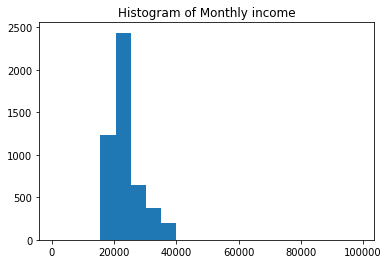

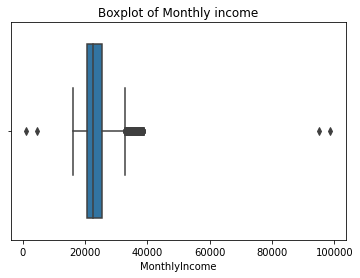

<IPython.core.display.Javascript object>

In [40]:
# we'll look at `MonthlyIncome`

plt.hist(df["MonthlyIncome"], 20)
plt.title("Histogram of Monthly income")
plt.show()

sns.boxplot(df["MonthlyIncome"])
plt.title("Boxplot of Monthly income")
plt.show()

In [41]:
# handling outliers
quartiles = np.quantile(
    df["MonthlyIncome"][df["MonthlyIncome"].notnull()], [0.25, 0.75]
)
income_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f"Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {income_4iqr}")
outlier_income = df.loc[
    np.abs(df["MonthlyIncome"] - df["MonthlyIncome"].median()) > income_4iqr,
    "MonthlyIncome",
]
outlier_income

Q1 = 20485.0, Q3 = 25424.75, 4*IQR = 19759.0


38      95000.0
142      1000.0
2482    98678.0
Name: MonthlyIncome, dtype: float64

<IPython.core.display.Javascript object>

In [42]:
income = df["MonthlyIncome"].median()

<IPython.core.display.Javascript object>

In [43]:
print(income)

22413.5


<IPython.core.display.Javascript object>

* We have 3 outliers in the column `MonthlyIncome`

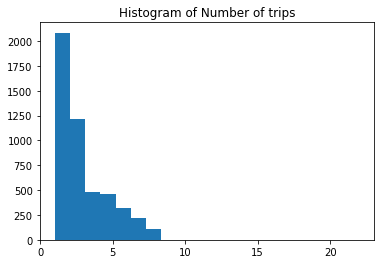

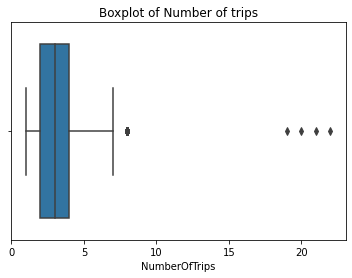

<IPython.core.display.Javascript object>

In [44]:
# we'll look at `NumberOfTrips`

plt.hist(df["NumberOfTrips"], 20)
plt.title("Histogram of Number of trips")
plt.show()

sns.boxplot(df["NumberOfTrips"])
plt.title("Boxplot of Number of trips")
plt.show()

In [45]:
# handling outliers
quartiles = np.quantile(
    df["NumberOfTrips"][df["NumberOfTrips"].notnull()], [0.25, 0.75]
)
trip_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f"Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {trip_4iqr}")
outlier_trip = df.loc[
    np.abs(df["NumberOfTrips"] - df["NumberOfTrips"].median()) > trip_4iqr,
    "NumberOfTrips",
]
outlier_trip

Q1 = 2.0, Q3 = 4.0, 4*IQR = 8.0


385     19.0
816     21.0
2829    20.0
3260    22.0
Name: NumberOfTrips, dtype: float64

<IPython.core.display.Javascript object>

* We have 4 outliers in the column `NumberOfTrips`

In [46]:
trip = df["NumberOfTrips"].median()

<IPython.core.display.Javascript object>

In [47]:
print(trip)

3.0


<IPython.core.display.Javascript object>

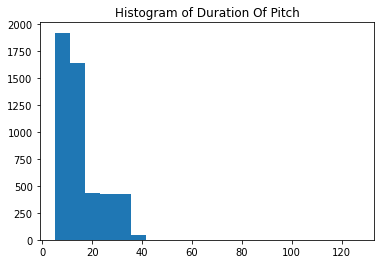

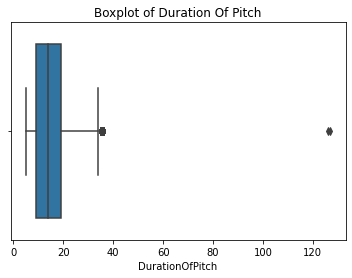

<IPython.core.display.Javascript object>

In [48]:
# we'll look at `DurationOfPitch`

plt.hist(df["DurationOfPitch"], 20)
plt.title("Histogram of Duration Of Pitch")
plt.show()

sns.boxplot(df["DurationOfPitch"])
plt.title("Boxplot of Duration Of Pitch")
plt.show()

In [49]:
# handling outliers
quartiles = np.quantile(
    df["DurationOfPitch"][df["DurationOfPitch"].notnull()], [0.25, 0.75]
)
duration_4iqr = 3 * (quartiles[1] - quartiles[0])
print(f"Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {duration_4iqr}")
outlier_duration = df.loc[
    np.abs(df["DurationOfPitch"] - df["DurationOfPitch"].median()) > duration_4iqr,
    "DurationOfPitch",
]
outlier_duration


Q1 = 9.0, Q3 = 19.0, 4*IQR = 30.0


1434    126.0
3878    127.0
Name: DurationOfPitch, dtype: float64

<IPython.core.display.Javascript object>

* We have 2 outliers in the column `DurationOfPitch`

In [50]:
duration = df["DurationOfPitch"].median()

<IPython.core.display.Javascript object>

In [51]:
print(duration)

14.0


<IPython.core.display.Javascript object>

### drop the outliers in the 3 columns

In [52]:
# dropping these rows in the column MonthlyIncome
# [not run]
df.drop(outlier_income.index, axis=0, inplace=True)

<IPython.core.display.Javascript object>

In [53]:
# dropping these rows in the column NumberOfTrips
# [not run]
df.drop(outlier_trip.index, axis=0, inplace=True)

<IPython.core.display.Javascript object>

In [54]:
# dropping these rows in the column DurationOfPitch
# [not run]
df.drop(outlier_duration.index, axis=0, inplace=True)

<IPython.core.display.Javascript object>

**After the outliers replacements**

In [55]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4879.0,37.430006,9.154004,18.0,31.0,36.0,43.0,61.0
DurationOfPitch,4879.0,15.361140,8.003275,5.0,9.0,14.0,19.0,36.0
NumberOfTrips,4879.0,3.216028,1.755347,1.0,2.0,3.0,4.0,8.0
MonthlyIncome,4879.0,23524.526132,5045.778703,4678.0,20485.5,22415.0,25417.5,38677.0


<IPython.core.display.Javascript object>

* The outliers have been removed

### EDA

### Univariate analysis

In [56]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical
# variable.
# This function takes the numerical column as the input and returns the boxplots
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

### Observations on Age

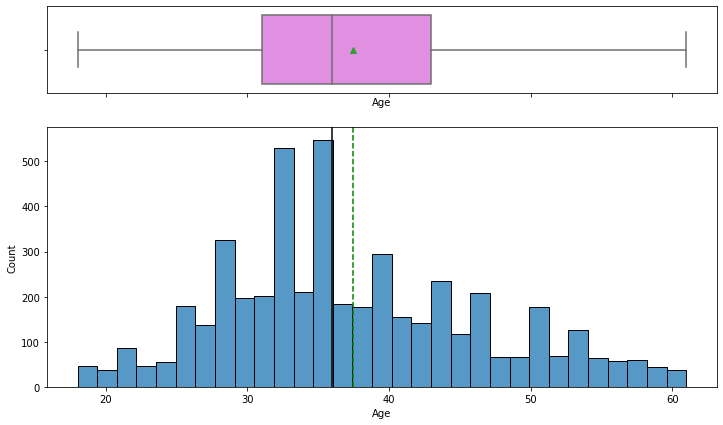

<IPython.core.display.Javascript object>

In [57]:
histogram_boxplot(df, "Age")

* The distribution of Age is right skewed.
* From boxplot we can see that the third quartile(Q3) is equal to 43 which means 75% of customers are below the age of 43.

### Observations on DurationOfPitch

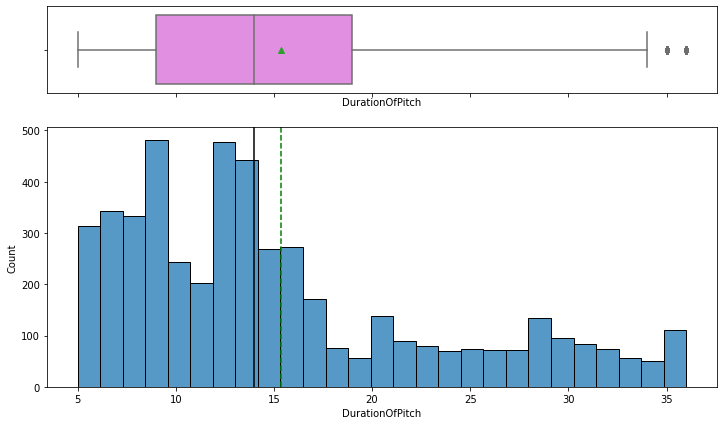

<IPython.core.display.Javascript object>

In [58]:
histogram_boxplot(df, "DurationOfPitch")

* Mean Duration of the pitch by a salesperson to the customer is 15.36 minutes
* There are a few some extreme values (outliers?) present in data (Duration of the pitch greater than 33 minutes)

### Observations on NumberOfTrips

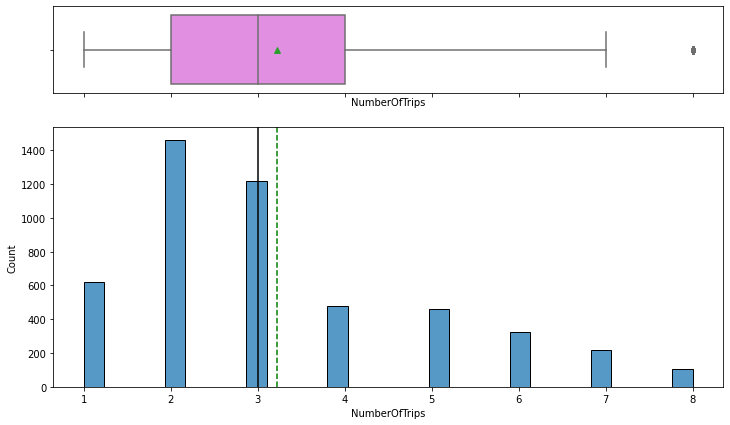

<IPython.core.display.Javascript object>

In [59]:
histogram_boxplot(df, "NumberOfTrips")

* Most customers Average number of trips in a year is between 3 and 4.
* The column values are discrete	

### Observations on MonthlyIncome

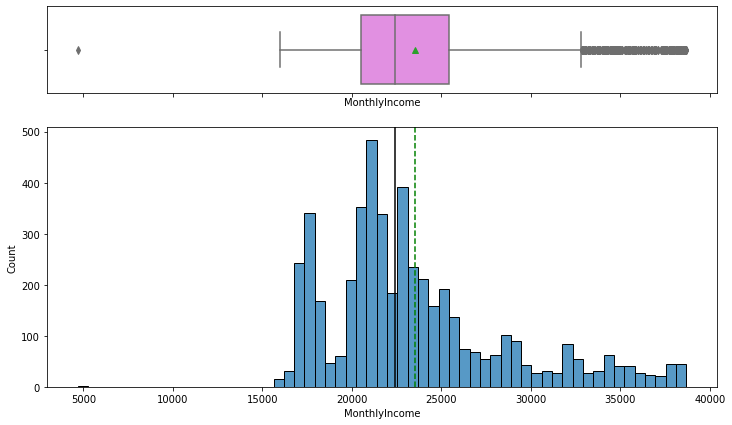

<IPython.core.display.Javascript object>

In [60]:
histogram_boxplot(df, "MonthlyIncome")

* Mean monthly income of customers who bought packages is around 23525.
* Monthly income is right skewed.
* It seems to still have out of range values towards the higher end.

In [61]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

## Observations on ProdTaken

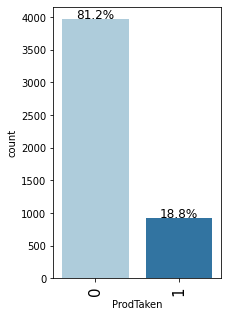

<IPython.core.display.Javascript object>

In [62]:
labeled_barplot(df, "ProdTaken", perc=True)

* 81% of customers didn't purchased a package and almost 19% did purchase a package

### Observations on TypeofContact

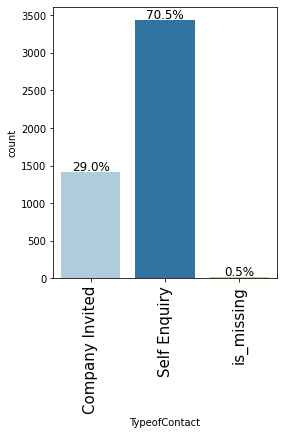

<IPython.core.display.Javascript object>

In [63]:
labeled_barplot(df, "TypeofContact", perc=True)

* More than 70% of customers found the packages through a Self Enquiry and 29% of them was contacted through a company invitation

### Observations on CityTier

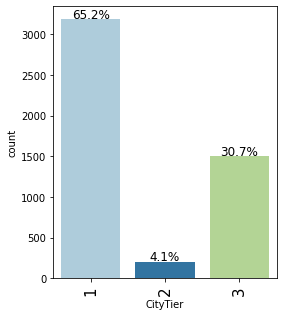

<IPython.core.display.Javascript object>

In [64]:
labeled_barplot(df, "CityTier", perc=True)

* 65% of customers are in the category Tier 1, more than 30% in the category Tier 3 and around 4% are in the category Tier 2

### Observations on Occupation

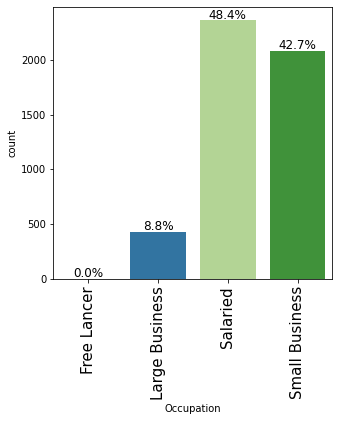

<IPython.core.display.Javascript object>

In [65]:
labeled_barplot(df, "Occupation", perc=True)

* 48.4% of the customers are Salaried, 42.7% are Small Business, 8.8% are Large Business and a few rare customers are Free Lancer

### Observations on Gender

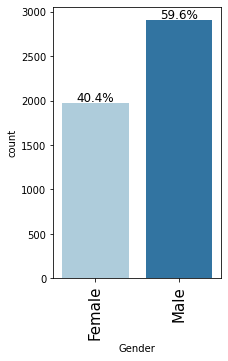

<IPython.core.display.Javascript object>

In [66]:
labeled_barplot(df, "Gender", perc=True)

* Approx 60% of customers in the company Database are Male while around 40% are Female

### Observations on NumberOfPersonVisiting

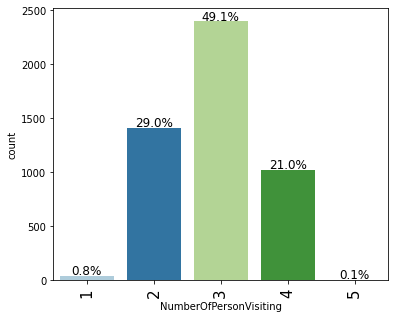

<IPython.core.display.Javascript object>

In [67]:
labeled_barplot(df, "NumberOfPersonVisiting", perc=True)

* Around 49% of customer plan to take the trip with a total number of 3 persons, 29% with 2 persons, 21% plan to take the trip with 4 persons and approx the 1% customers remaining plan to take the trip with 1 or 5 persons

### Observations on NumberOfFollowups

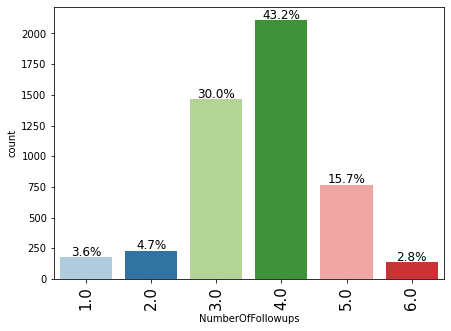

<IPython.core.display.Javascript object>

In [68]:
labeled_barplot(df, "NumberOfFollowups", perc=True)

* 43.2% of the number of follow-ups done after the sales pitch is 4 on a scale of 6. 30% of the number of follow-ups done is 3

### Observations on ProductPitched

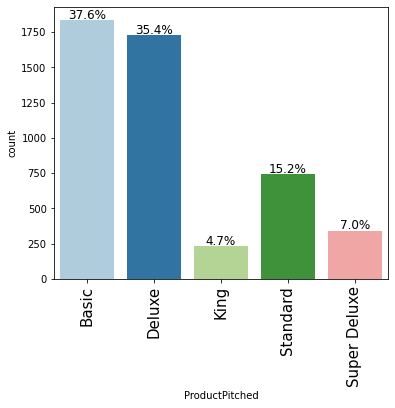

<IPython.core.display.Javascript object>

In [69]:
labeled_barplot(df, "ProductPitched", perc=True)

* The Basic package represent 37.6% of the Product pitched by the salesperson, followed respectively by Deluxe (35.4%), Standard (15.2%), Super Deluxe (7%) and King (4.7%)

### Observations on PreferredPropertyStar

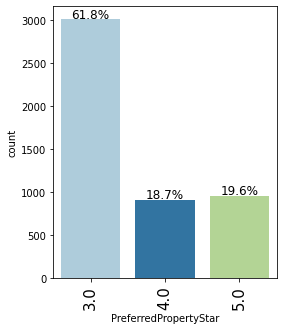

<IPython.core.display.Javascript object>

In [70]:
labeled_barplot(df, "PreferredPropertyStar", perc=True)

* 61.8% of the customers have rated the hotel property at 3 (the scale is from 3 to 5). The rating 4 and 5 represent respectively 18.7% and 19.6%

### Observations on MaritalStatus

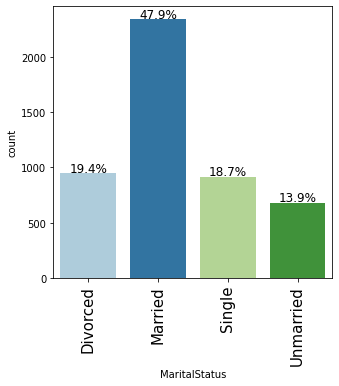

<IPython.core.display.Javascript object>

In [71]:
labeled_barplot(df, "MaritalStatus", perc=True)

* Approx 48% of customers are Married, 19.4% are Divorced, 18.7% are Single and approx 14% are Unmarried

### Observations on Passport

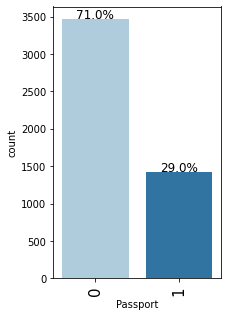

<IPython.core.display.Javascript object>

In [72]:
labeled_barplot(df, "Passport", perc=True)

* 71% of customers don't have a passport. Only 29% have it

### Observations on PitchSatisfactionScore

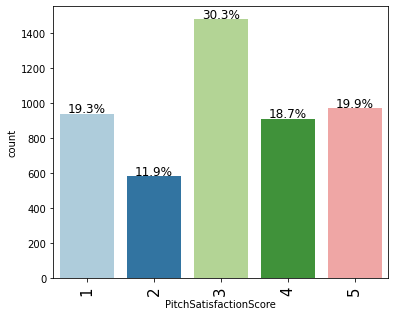

<IPython.core.display.Javascript object>

In [73]:
labeled_barplot(df, "PitchSatisfactionScore", perc=True)

* 30.3% of customers' Sales pitch satisfaction score is 3, followed by the ratings 5 (19.9%), 1 (19.3%), 4 (18.7%) and 2 (11.9%)

### Observations on OwnCar

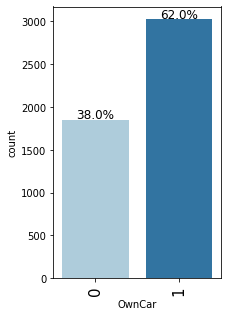

<IPython.core.display.Javascript object>

In [74]:
labeled_barplot(df, "OwnCar", perc=True)

* 62% of customers own a car and 38% don't

### Observations on NumberOfChildrenVisiting

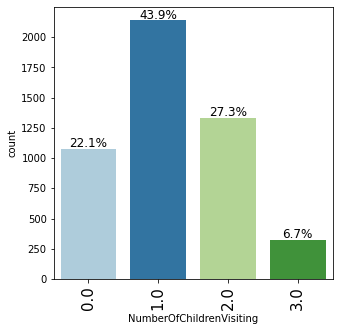

<IPython.core.display.Javascript object>

In [75]:
labeled_barplot(df, "NumberOfChildrenVisiting", perc=True)

* 43.9% of customers have 1 child with age less than 5 to take the trip, 27.3% of them have 2 children, 22% of the customers take the trip without children and 6.7% plan to take the trip with 3 children

### Observations on Designation

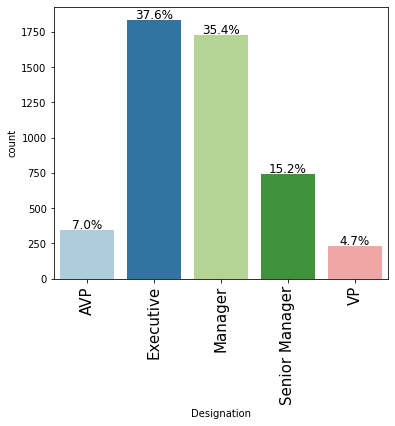

<IPython.core.display.Javascript object>

In [76]:
labeled_barplot(df, "Designation", perc=True)

* 37.6% of customers are Executive, 35.4% are Manager, 15.2% are 15.2%, 7% of customers are AVP and 4.7% of them are AVP

### Bivariate Analysis

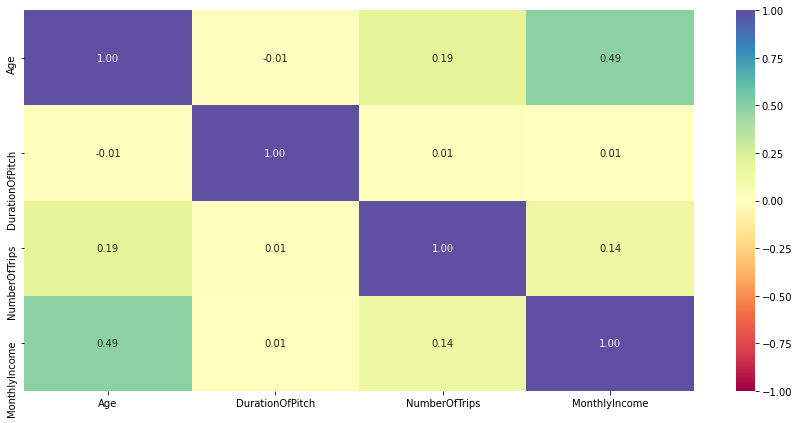

<IPython.core.display.Javascript object>

In [77]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* No notable correlations between numerical variables

### ProdTaken vs Age

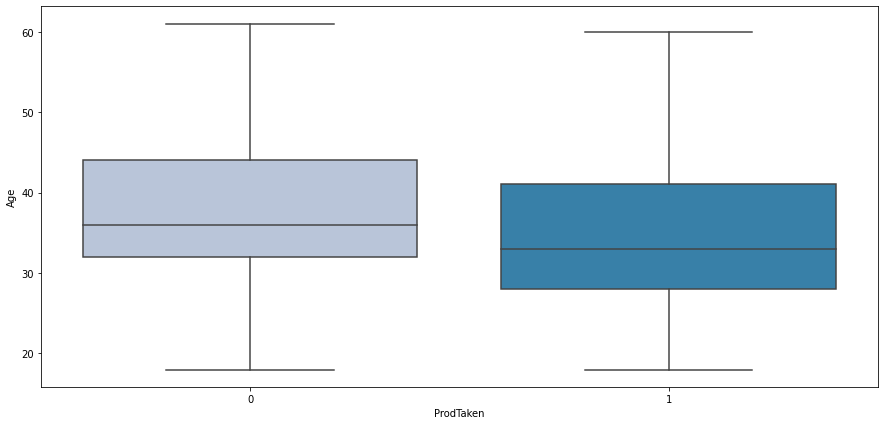

<IPython.core.display.Javascript object>

In [78]:
plt.figure(figsize=(15, 7))
sns.boxplot(df["ProdTaken"], df["Age"], palette="PuBu")
plt.show()

* The Average Age of customers that request the packages is around 33 years. The Average of the customers who refused the packages is above 35 years old.
* 75% of customers who purchased the packages are aged in the range 18-41 years old

### ProdTaken vs DurationOfPitch

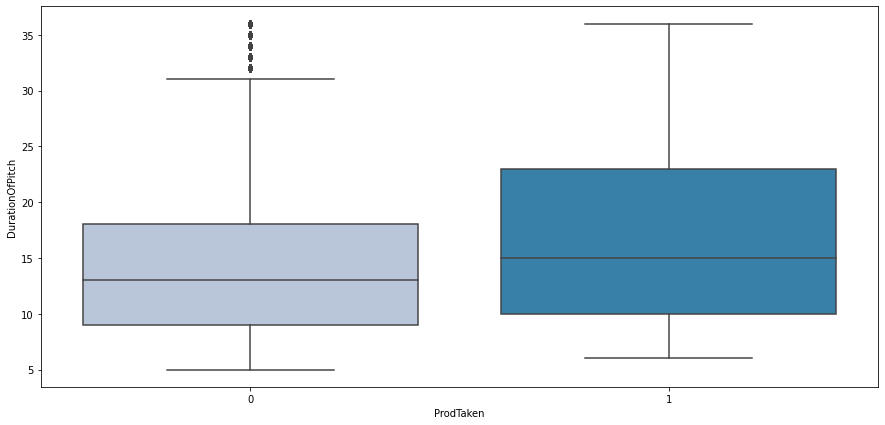

<IPython.core.display.Javascript object>

In [79]:
plt.figure(figsize=(15, 7))
sns.boxplot(df["ProdTaken"], df["DurationOfPitch"], palette="PuBu")
plt.show()

* The duration of spitch by salepersons is more spread among customers who bought packages. Some customers accept the packages from the 6th minute of spitch with a median at 15 minutes. 
* The duration box splot is less larger among the customers that refuse the packages. The median duration of speech is around 13 minutes

### ProdTaken vs NumberOfTrips

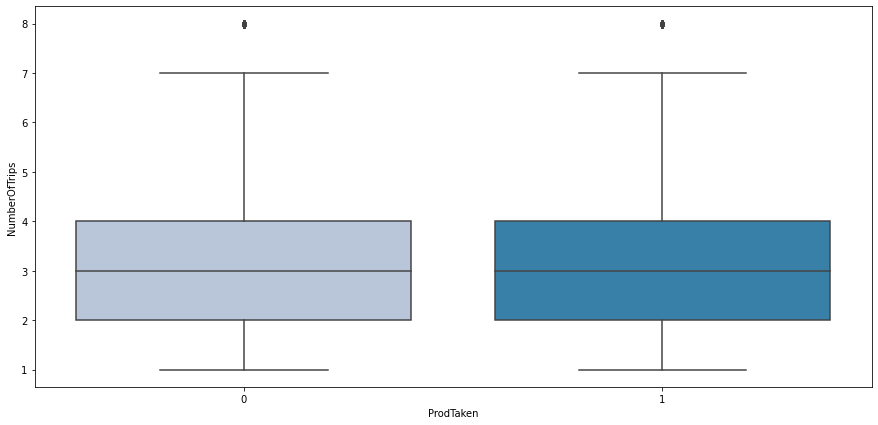

<IPython.core.display.Javascript object>

In [80]:
plt.figure(figsize=(15, 7))
sns.boxplot(df["ProdTaken"], df["NumberOfTrips"], palette="PuBu")
plt.show()

* There is no significant difference in the average number of trips in a year among those who buy or who do not buy packages

### ProdTaken vs MonthlyIncome

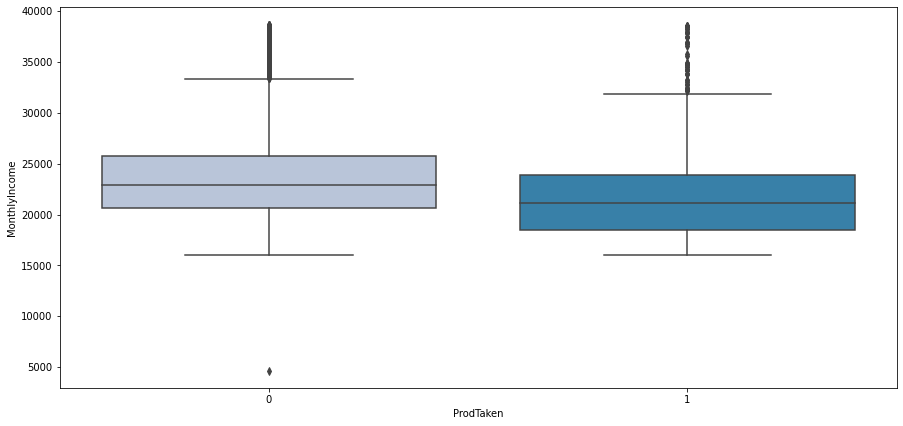

<IPython.core.display.Javascript object>

In [81]:
plt.figure(figsize=(15, 7))
sns.boxplot(df["ProdTaken"], df["MonthlyIncome"], palette="PuBu")
plt.show()

* Customers with the higher average of monthly income tend not to purchase the packages offered

## ProductPitched vs ProdTaken

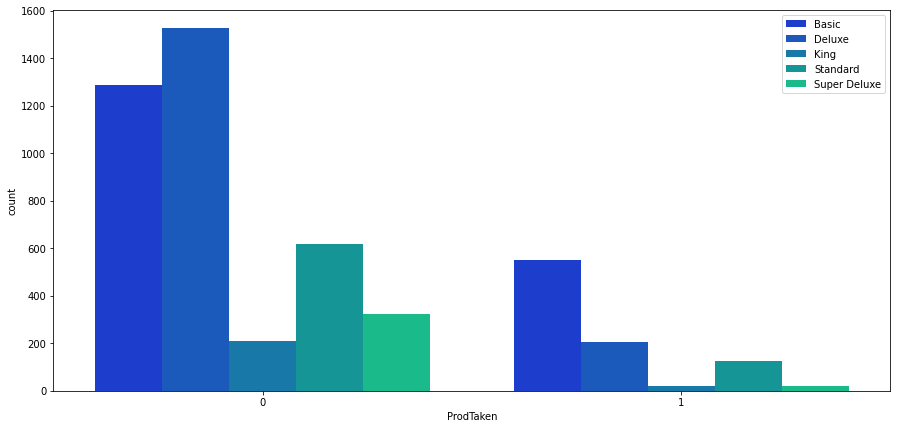

<IPython.core.display.Javascript object>

In [82]:
plt.figure(figsize=(15, 7))
sns.countplot(df["ProdTaken"], hue=df["ProductPitched"], palette="winter")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

* Basic package is the most purchased. Deluxe is the most refused, followed by Basic but Deluxe is the second most purchased. King and Super Deluxe packages are the less required by the customers

## TypeofContact vs ProdTaken

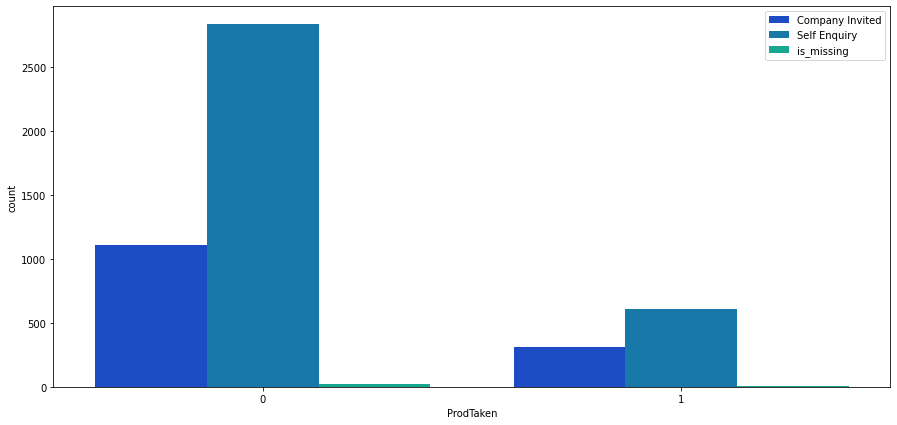

<IPython.core.display.Javascript object>

In [83]:
plt.figure(figsize=(15, 7))
sns.countplot(df["ProdTaken"], hue=df["TypeofContact"], palette="winter")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

* Self inquiry customers are the one who purchase the most the packages. There are also those who do not purchase the packages

## CityTier vs ProdTaken

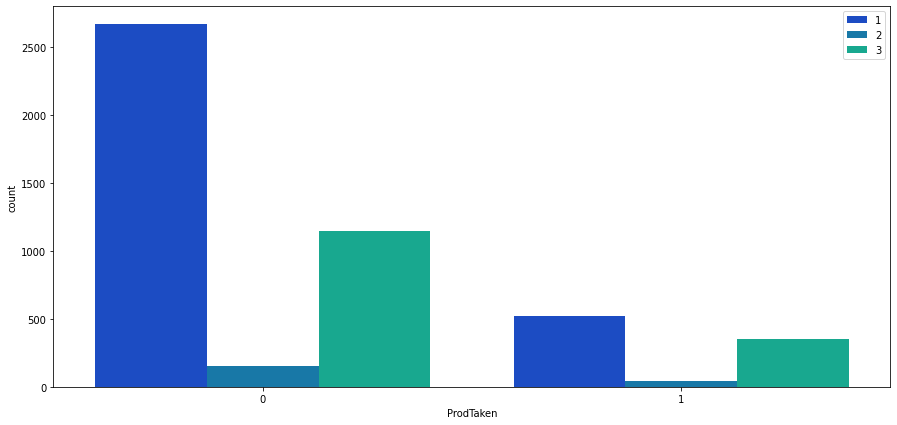

<IPython.core.display.Javascript object>

In [84]:
plt.figure(figsize=(15, 7))
sns.countplot(df["ProdTaken"], hue=df["CityTier"], palette="winter")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

* The customers who bought the packages are in the category Tier 1 and Tier 3. Only very few of them are in the category Tier 2

## Occupation vs ProdTaken

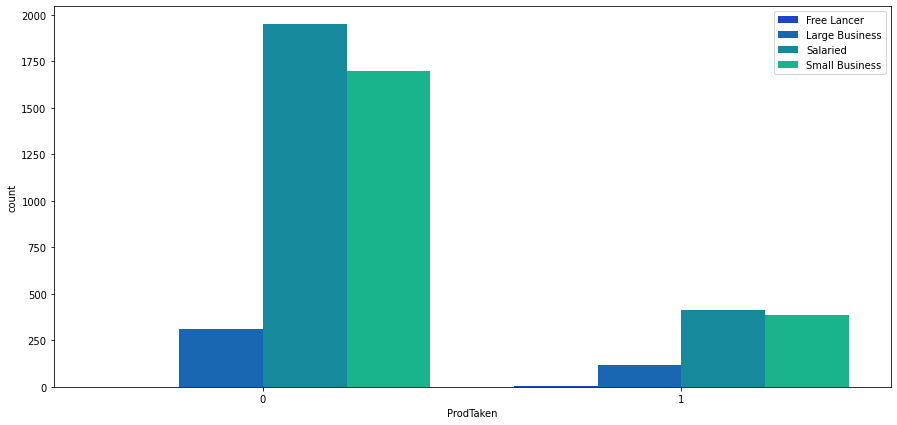

<IPython.core.display.Javascript object>

In [85]:
plt.figure(figsize=(15, 7))
sns.countplot(df["ProdTaken"], hue=df["Occupation"], palette="winter")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

* Most of the customers who purchased the packages Salaried and Small Business. Few Large Business accepted to purchase the packages as well. Free Lancer purchases are very negligeable

### Gender vs ProdTaken

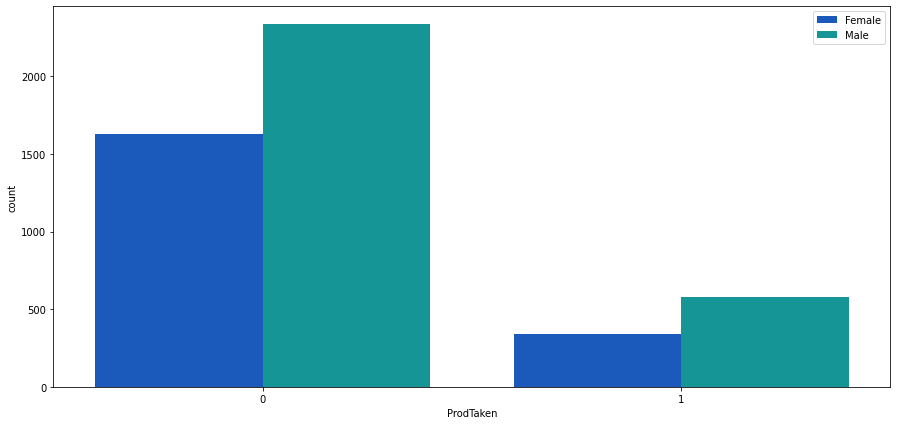

<IPython.core.display.Javascript object>

In [86]:
plt.figure(figsize=(15, 7))
sns.countplot(df["ProdTaken"], hue=df["Gender"], palette="winter")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

* The packages are more often purchased by Male than by Female

### NumberOfPersonVisiting vs ProdTaken

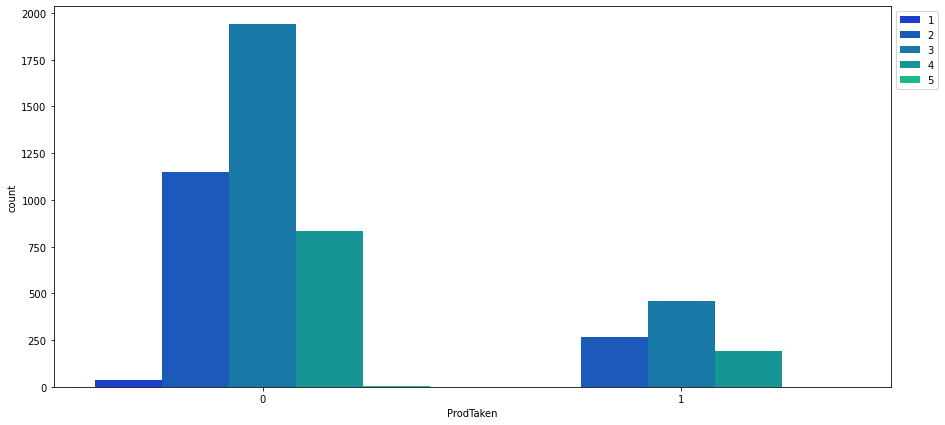

<IPython.core.display.Javascript object>

In [87]:
plt.figure(figsize=(15, 7))
sns.countplot(df["ProdTaken"], hue=df["NumberOfPersonVisiting"], palette="winter")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

* Total number of persons planning to take the trip with the customers who purchase the package is 1, followed by 2 and 4

### NumberOfFollowups vs ProdTaken

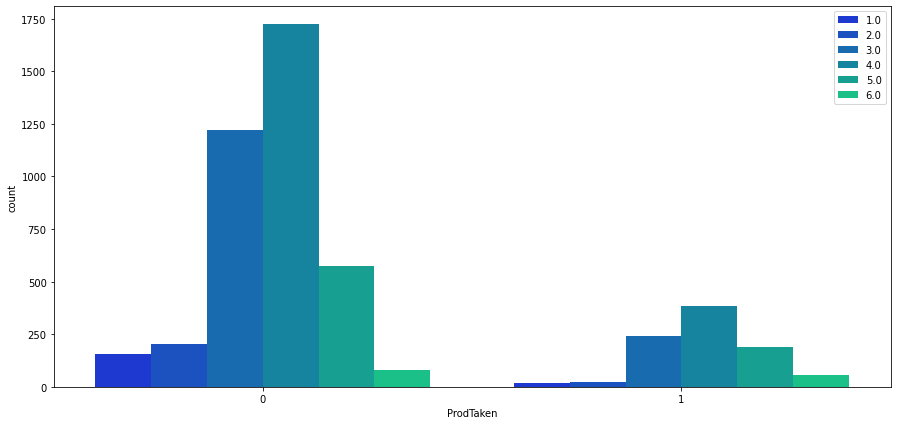

<IPython.core.display.Javascript object>

In [88]:
plt.figure(figsize=(15, 7))
sns.countplot(df["ProdTaken"], hue=df["NumberOfFollowups"], palette="winter")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

* The number of follow-ups done to the customers who purchased the packages is regularly 4, followed by 3, 5.

### ProductPitched vs ProdTaken

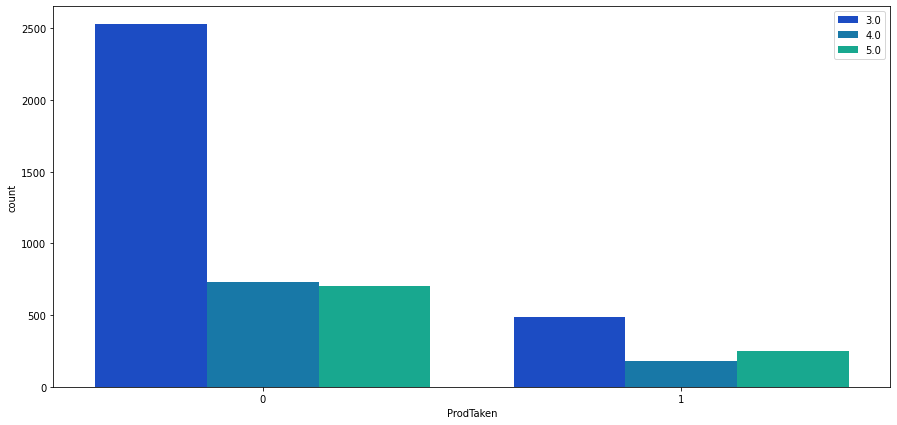

<IPython.core.display.Javascript object>

In [89]:
plt.figure(figsize=(15, 7))
sns.countplot(df["ProdTaken"], hue=df["PreferredPropertyStar"], palette="winter")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

* The Preferred hotel property rating by customer 3, both for the who purchased the packages or not. The rates 5 and 4 followed respectively for customers that purchased

### MaritalStatus vs ProdTaken

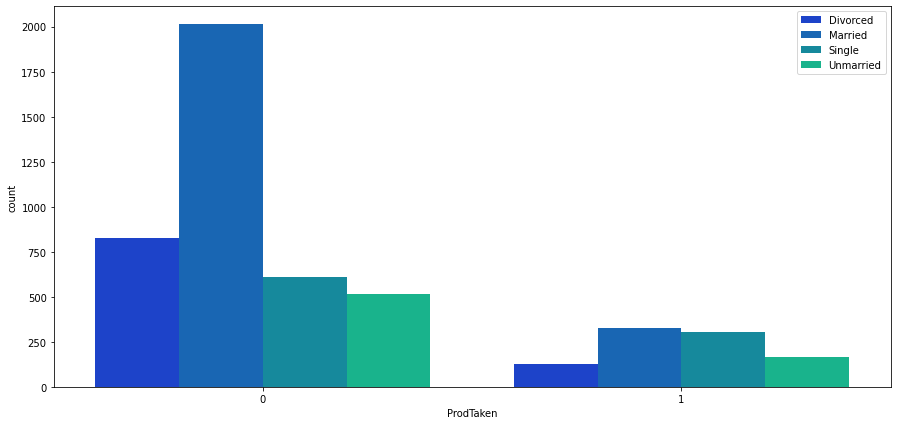

<IPython.core.display.Javascript object>

In [90]:
plt.figure(figsize=(15, 7))
sns.countplot(df["ProdTaken"], hue=df["MaritalStatus"], palette="winter")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

* Married customers by the packages the most, followed by Single customers. Divorced and Unmarried are the customers who purchased the less

### Passport vs ProdTaken

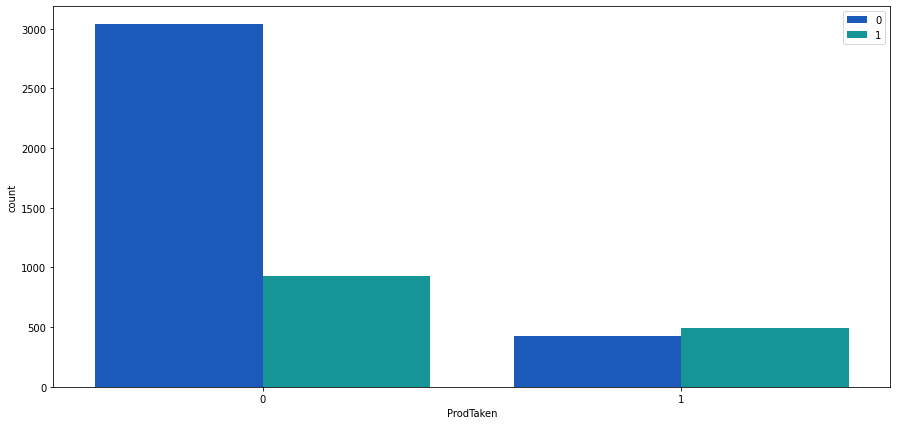

<IPython.core.display.Javascript object>

In [91]:
plt.figure(figsize=(15, 7))
sns.countplot(df["ProdTaken"], hue=df["Passport"], palette="winter")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

* The purchases of the packages tend not to be influenced by holding a passport or not

### PitchSatisfactionScore vs ProdTaken

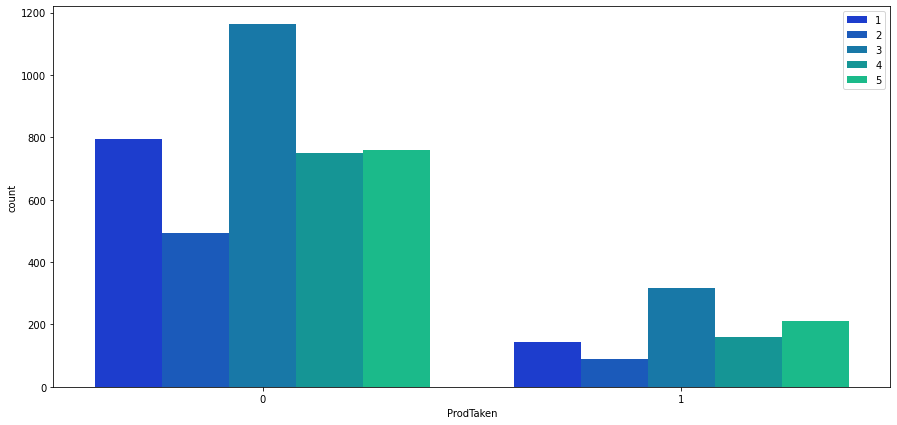

<IPython.core.display.Javascript object>

In [92]:
plt.figure(figsize=(15, 7))
sns.countplot(df["ProdTaken"], hue=df["PitchSatisfactionScore"], palette="winter")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

* The common Sales pitch satisfaction score for customers who purchased the packages is 3, followed by 5, 4, 1 and 2

### OwnCar vs ProdTaken

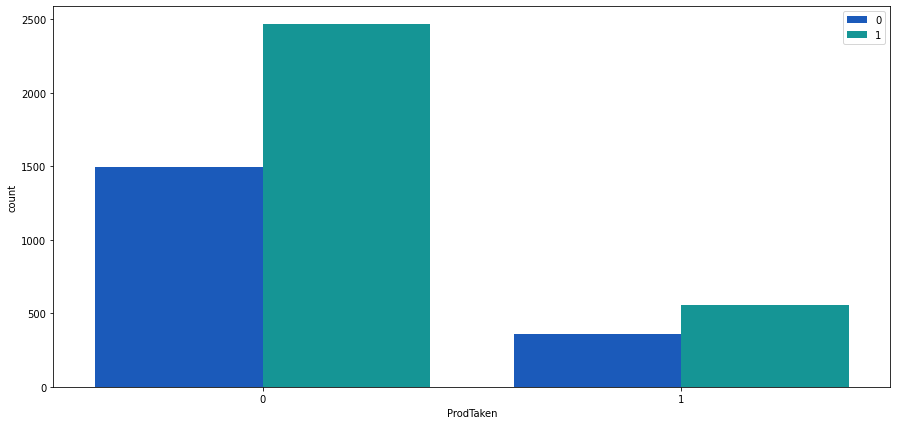

<IPython.core.display.Javascript object>

In [93]:
plt.figure(figsize=(15, 7))
sns.countplot(df["ProdTaken"], hue=df["OwnCar"], palette="winter")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

* Most of the customers that purchased the packages own a car. However, many of those who parchased do not have a car

### NumberOfChildrenVisiting vs ProdTaken

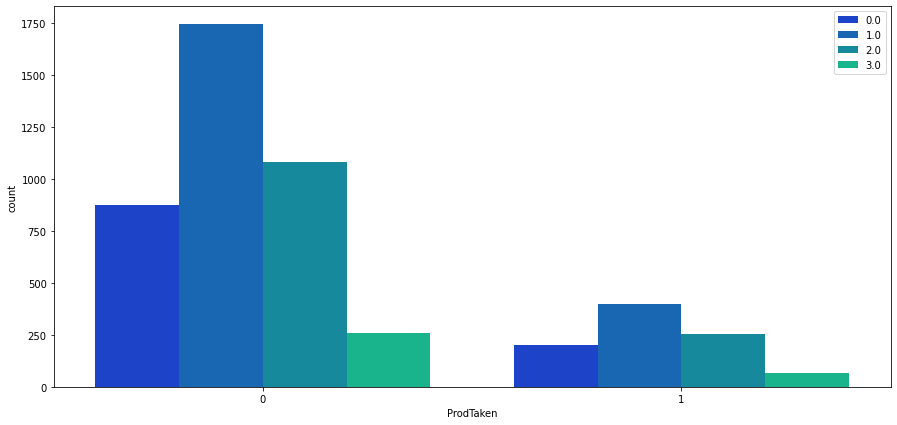

<IPython.core.display.Javascript object>

In [94]:
plt.figure(figsize=(15, 7))
sns.countplot(df["ProdTaken"], hue=df["NumberOfChildrenVisiting"], palette="winter")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

* The frequent number of children with age less than 5 planning to take the trip with the customers who purchased the packages is 1. This number is followed by 2. Some customers plan the trip with no children

### Designation vs ProdTaken

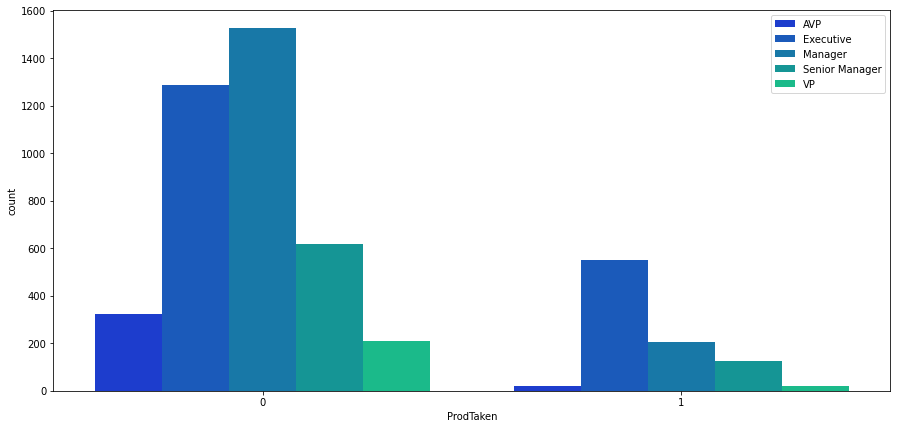

<IPython.core.display.Javascript object>

In [95]:
plt.figure(figsize=(15, 7))
sns.countplot(df["ProdTaken"], hue=df["Designation"], palette="winter")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

* Executive purchased the most the packages, followed by Managers and Senior Managers

### NumberOfTrips vs ProdTaken

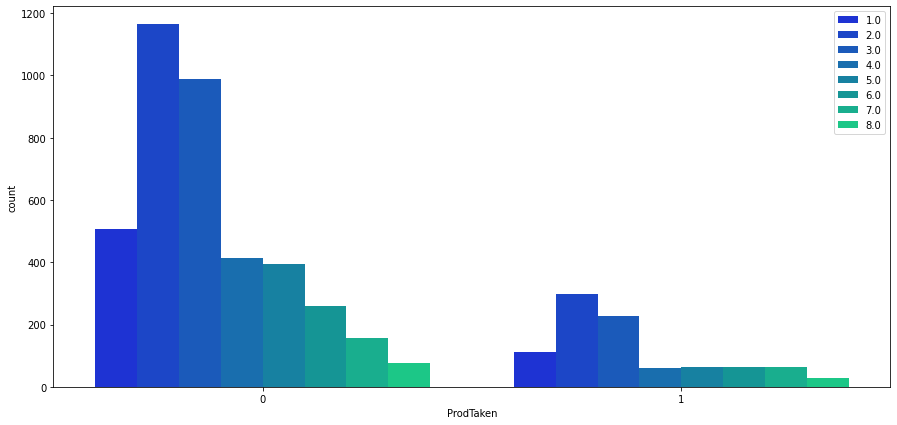

<IPython.core.display.Javascript object>

In [96]:
plt.figure(figsize=(15, 7))
sns.countplot(df["ProdTaken"], hue=df["NumberOfTrips"], palette="winter")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

* The most frequent average number of trips in a year of the customers who purchased the packages is 2. 3 is also frequent among customers purchasing the packages

### Multivariate Analysis

### Gender vs ProdTakenvs MaritalStatus vs MonthlyIncome

<Figure size 1440x720 with 0 Axes>

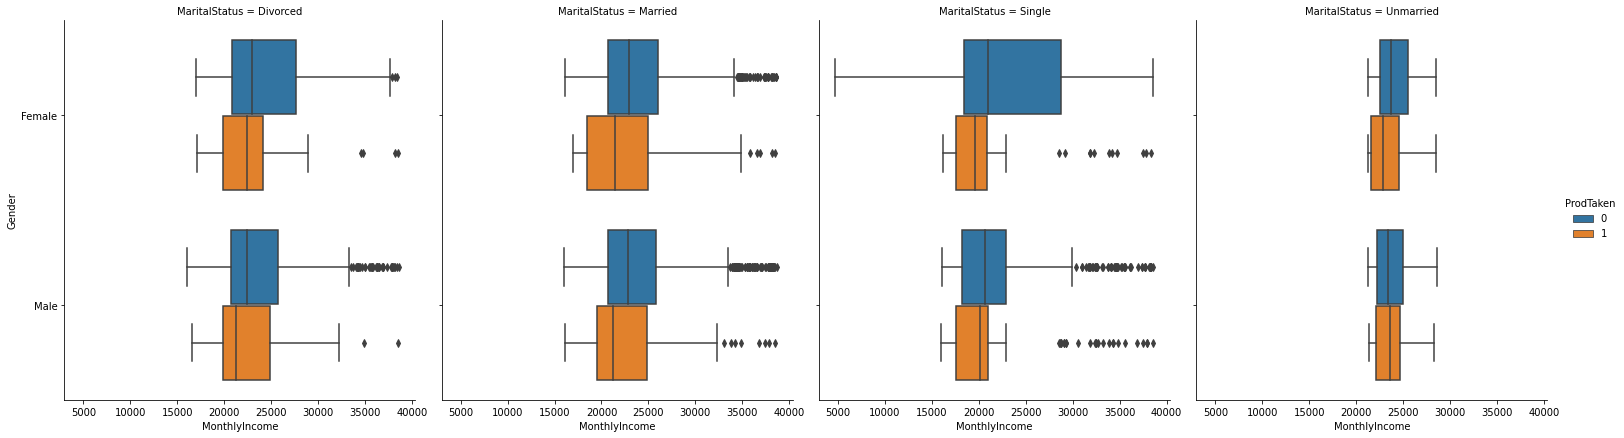

<IPython.core.display.Javascript object>

In [97]:
# Box plot MonthlyIncome Vs Gender of customer wiht hue = ProdTaken and on the column MaritalStatus

plt.figure(figsize=(20, 10))  # setting the figure size
ax = sns.catplot(
    x="MonthlyIncome",
    y="Gender",
    hue="ProdTaken",
    col="MaritalStatus",
    data=df,
    kind="box",
    height=6,
    aspect=0.9,
    ci=95,
    dodge=True,
)

* The monthly average income of Divorced Female customers who purchased the packages is around 23K whereas the the monthly average income of Divorced Male customers who purchage the packages is 21K
* The monthly revenu of Female and Male Married customers who purchased the packages is comparable
* The average of monthly income is higher for Single Male customers who bought the packages (20K) than for Single Female customers (around 18K) who purchase the packages
* The observation for Unmarried Male customers who purchased the packages is the same than the Unmarried Female customers that purchased the packages

* The monthly income levels of customers who purchased the packages are quite similar, regardless of marital status and gender

### Gender vs ProdTakenvs MaritalStatus vs Age

<Figure size 1440x720 with 0 Axes>

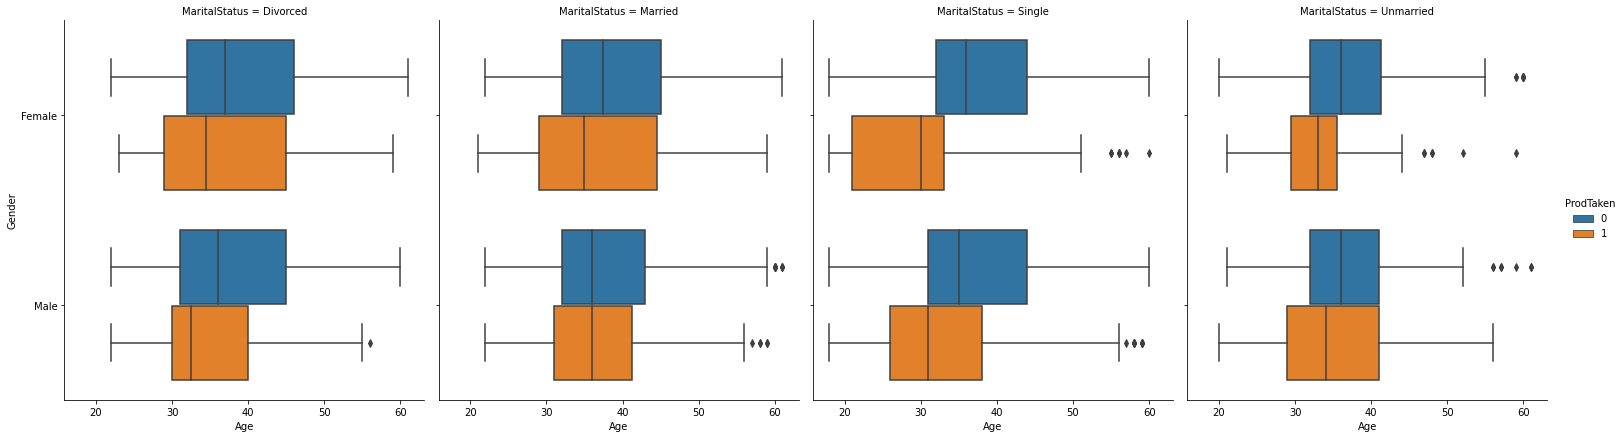

<IPython.core.display.Javascript object>

In [98]:
# Box plot Age Vs Gender of customer wiht hue = ProdTaken and on the column MaritalStatus

plt.figure(figsize=(20, 10))  # setting the figure size
ax = sns.catplot(
    x="Age",
    y="Gender",
    hue="ProdTaken",
    col="MaritalStatus",
    data=df,
    kind="box",
    height=6,
    aspect=0.9,
    ci=95,
    dodge=True,
)

* 75% of Divorced Male customers who purchase the packages are aged under 40. The Divorced Female customers who purchased the packages are aged under 45. The average Age of Divorced Female customers who purchased the packages is around 35 years old whereas the the average Age of Divorced Male customers who purchage the packages is 32. The Divorced Male customers who purchased the packages are younger than the Divorced Female who bought the packages.

* 75% of Married Female customers who bought the packages are under age of 45. 75% of Married Male customers who purchased the packages are under 41-42. The average Age of Married Female customers who purchased the packages is aaround 35 years old while the average Age of Married Male customers who purchased the packages is around 37. So, most of the Married Male customers who purchased the packages are younger than the majority of Female Married customers who purchased.

* 75% of Single Female customers who purchased the packages are under 33 whereas 75% of Single Male customers who purchased the packages are under 40. The average Age of Single Male customers who bought the packages is around 32 whereas the average Age of Single Female customers who purchase the packages is around 30. So, most of the Single Male customers who purchased the packages are older than the majority of Female Single customers who purchased.

* The 3/4 of Unmarried Female customers who purchased the packages are under 35 while the 3/4 of Unmarried Male customers who bought the packages are under 42. The average Age of Unmarried Male customers who purchased the packages is around 33 years old and the average Age of the Single Female customers that purchased the packages is around 31-32. So, most of the Unmarried Male customers who purchased the packages are older than the majority of Female Unmarried customers who purchased.

### Gender vs ProdTakenvs MaritalStatus vs DurationOfPitch

<Figure size 1440x720 with 0 Axes>

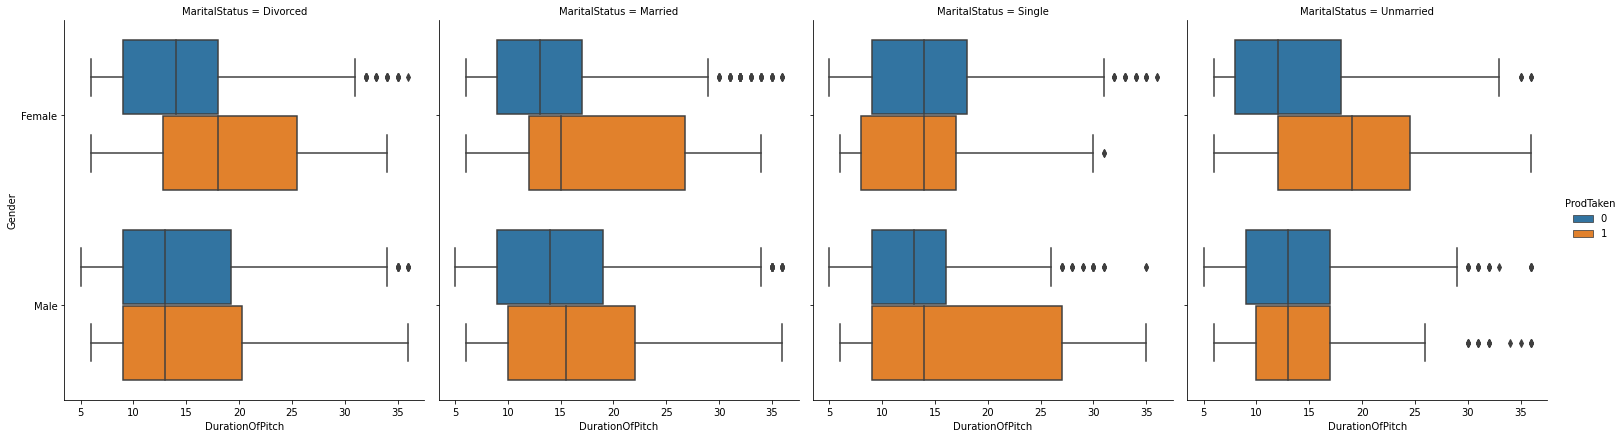

<IPython.core.display.Javascript object>

In [99]:
# Box plot DurationOfPitch Vs Gender of customer wiht hue = ProdTaken and on the column MaritalStatus

plt.figure(figsize=(20, 10))  # setting the figure size
ax = sns.catplot(
    x="DurationOfPitch",
    y="Gender",
    hue="ProdTaken",
    col="MaritalStatus",
    data=df,
    kind="box",
    height=6,
    aspect=0.9,
    ci=95,
    dodge=True,
)

* The duration of the pitch for the 3/4 of Divorced Female customers who purchased the packages is up to 25 minutes. The 25% of Divorced Female customers remaining monopolized between 25 and 34 minutes of duration of pitch. The average duration of the Divorced Female customers is around 17-18 minutes. 75% of Divorced Male customers who purchased the packages took around 20-21 minutes to the sale persons. The 25% of Divorced Male customers remaining monopolized between 21 and 36 minutes of duration of pitch. The average duration of the Divorced Male customers is around 13-14 minutes. **In general, the duration of the pitch by sale person for Divorced Male customers who purchased the packages is lower than the duration of the pitch for Divorce Female customers** 

* The duration of the pitch for the 3/4 of Married Female customers who purchased the packages is up to 28 minutes. The 25% of Married Female customers remaining monopolized between 28 and 35 minutes of duration of pitch. The average duration of the Married Female customers is around 15 minutes. 75% of Married Male customers who purchased the packages took around 22 minutes to the sale persons. The 25% of Married Male customers remaining monopolized between 23 and 36 minutes of duration of pitch. The average duration of the Married Male customers is around 16 minutes. **In general, the duration of the pitch by sale person for Married Male customers who purchased the packages is lower than the duration of the pitch for Married Female customers** 

* The duration of the pitch for the 3/4 of Single Female customers who purchased the packages is up to 17 minutes. The 1/4 of Single Female customers remaining monopolized between 17 and 30 minutes of duration of pitch. The average duration of the Single Female customers who purchased the packages is around 14 minutes. 75% of Single Male customers who purchased the packages took around 27 minutes to the sale persons. The 25% of Single Male customers remaining monopolized between 27 and 35 minutes of duration of pitch. The average duration of the Single Male customers is around 14 minutes. **In general, the duration of the pitch by sale person for Single Male customers who purchased the packages is greater than the duration of the pitch for Single Female customers**

* The duration of the pitch for the 3/4 of Unmarried Female customers who purchased the packages is up to 24 minutes. The 1/4 of Unmarried Female customers remaining monopolized between 24 and 35 minutes of duration of pitch. The average duration of the Unmarried Female customers who purchased the packages is around 19 minutes. 75% of Unmarried Male customers who purchased the packages took around 17 minutes to the sale persons. The 25% of Unmarried Male customers remaining monopolized between 17 and 27 minutes of duration of pitch. The average duration of the Unmarried Male customers is around 13 minutes. **In general, the duration of the pitch by sale person for Unmarried Male customers who purchased the packages is lower than the duration of the pitch for Unmarried Female customers**

### Gender vs ProdTaken vs Designation vs Age

<Figure size 1440x720 with 0 Axes>

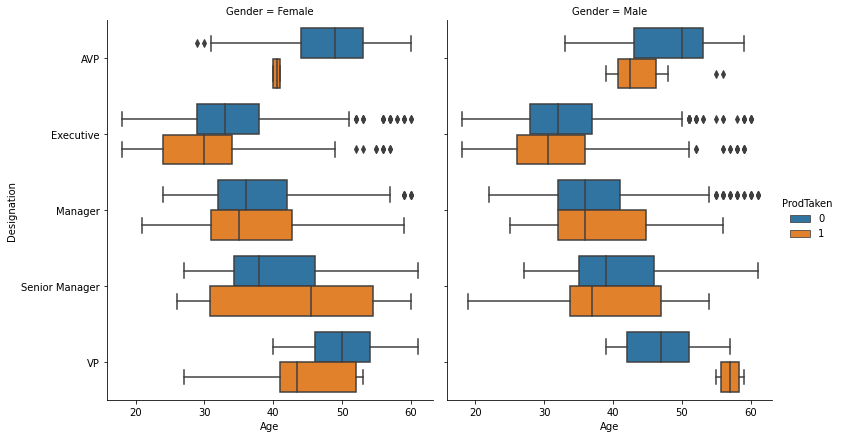

<IPython.core.display.Javascript object>

In [100]:
# Box plot Age Vs Gender of customer wiht hue = ProdTaken and on the column Designation

plt.figure(figsize=(20, 10))  # setting the figure size
ax = sns.catplot(
    x="Age",
    y="Designation",
    hue="ProdTaken",
    col="Gender",
    data=df,
    kind="box",
    height=6,
    aspect=0.9,
    ci=95,
    dodge=True,
)

**Insights:**
- The Female AVP customers who purchased the packages are around 40 years old. The Male AVP customers who purchased the packages are at most 47 years old. 
- Most of the Female Executive customers who took a packages are at most or under 35 years old whereas the Male Executive customers who purchased the packages are at most 37 years.
- The Female Managers who bought the packages are in majority at most 42 years old while 3/4 of the Male Managers who took the packages are at most 46 years old.
- 75% of Female Senior Managers who purchased the packages are at most 55 years old. The range of this segment of customers is very spread (from 25 to 60 years old). 75% of the Male Senior Managers who purchased the packages are at most 47 years old.
- The 3/4 of Female VP customers who purchased the packages are under 53 years old whereas all the Male VP customers who purchased the packages are between 55 and approx 60 years old

### Gender vs ProdTaken vs Designation vs MonthlyIncome

<Figure size 1440x720 with 0 Axes>

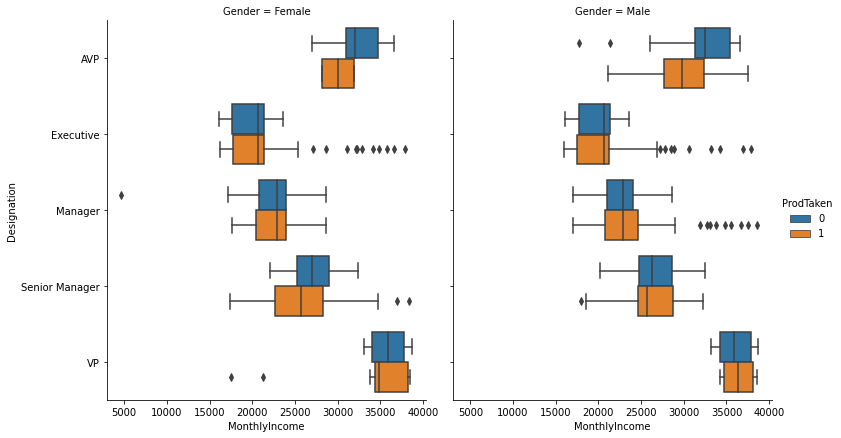

<IPython.core.display.Javascript object>

In [101]:
# Box plot MonthlyIncome Vs Gender of customer wiht hue = ProdTaken and on the column Designation

plt.figure(figsize=(20, 10))  # setting the figure size
ax = sns.catplot(
    x="MonthlyIncome",
    y="Designation",
    hue="ProdTaken",
    col="Gender",
    data=df,
    kind="box",
    height=6,
    aspect=0.9,
    ci=95,
    dodge=True,
)

**Insights:**
- The Female AVP customers who purchased the packages have a monthly revenue between 28K and 33K. 3/4 of Male AVP customers who purchased the packages earn between 22K and 33K each month.
- Most of (75%) the Female Executive customers who took a packages have a monthly revenue around 23K whereas the Male Executive customers who purchased the packages earn around 21K each month.
- The Female Managers who bought the packages earn in majority (75%) under 25K each month. 3/4 of the Male Managers who took the packages have the same monthly revenue.
- 75% of Female Senior Managers who purchased the packages earn a monthly income of less than 29K. 75% of the Male Senior Managers who purchased the packages are under 29K of monthly income too.
- The 3/4 of Female VP customers who purchased the packages earn a monthly income of less than 40K. which is the same situation of the Male VP customers who purchased the packages 

### Gender vs ProdTaken vs Designation vs DurationOfPitch

<Figure size 1440x720 with 0 Axes>

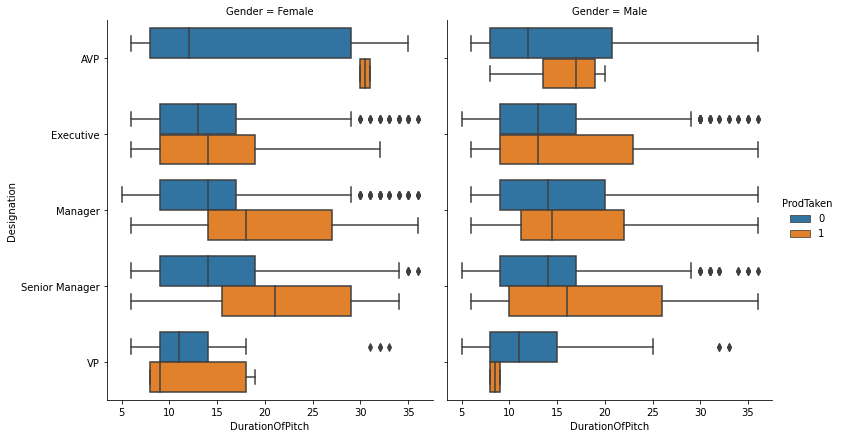

<IPython.core.display.Javascript object>

In [102]:
# Box plot DurationOfPitch Vs Gender of customer wiht hue = ProdTaken and on the column Designation

plt.figure(figsize=(20, 10))  # setting the figure size
ax = sns.catplot(
    x="DurationOfPitch",
    y="Designation",
    hue="ProdTaken",
    col="Gender",
    data=df,
    kind="box",
    height=6,
    aspect=0.9,
    ci=95,
    dodge=True,
)

**Insights:**
- Except for Female Executive, the duration of pitch last the longest among the Female who purchased the packages than among the Male who purchased them too, whatever the Designation. 

### MaritalStatus vs ProdTaken vs Designation vs Age

<Figure size 1440x720 with 0 Axes>

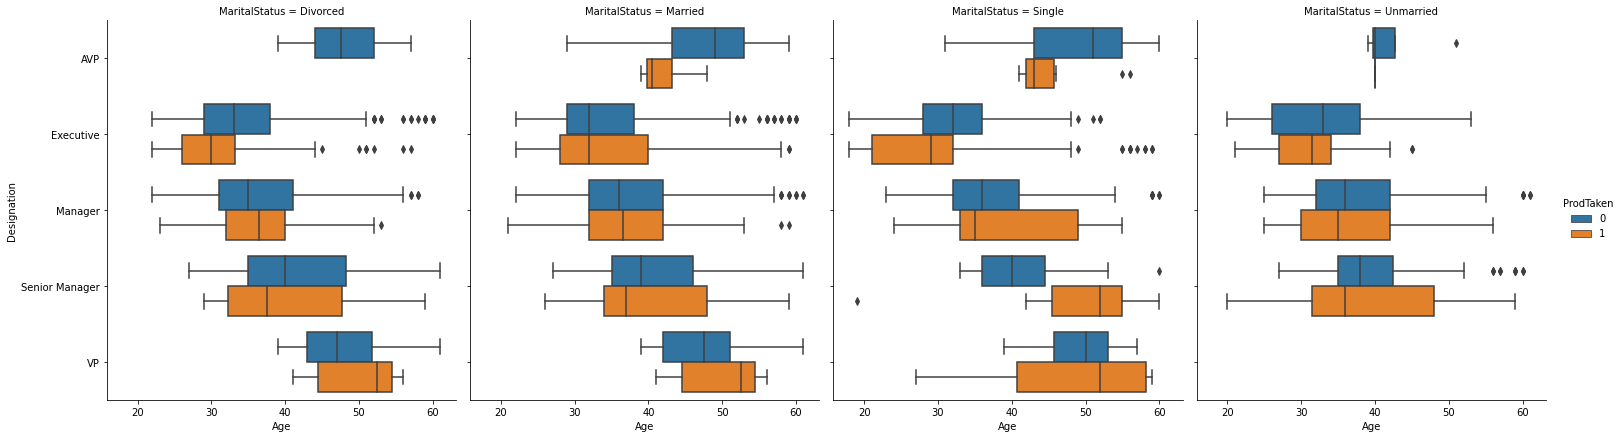

<IPython.core.display.Javascript object>

In [103]:
# Box plot Age Vs MaritalStatus of customer wiht hue = ProdTaken and on the column Designation

plt.figure(figsize=(20, 10))  # setting the figure size
ax = sns.catplot(
    x="Age",
    y="Designation",
    hue="ProdTaken",
    col="MaritalStatus",
    data=df,
    kind="box",
    height=6,
    aspect=0.9,
    ci=95,
    dodge=True,
)

**Insights:**
- No Divorced AVP purchased the packages and it is almost the case for clients who are Unmarried. 
- The AVPs customers who took the packages are either Married or Single. They are aged between 39 and 50 for Married customers and between 40 and 45 when Single

### MaritalStatus vs ProdTaken vs Designation vs MonthlyIncome

<Figure size 1440x720 with 0 Axes>

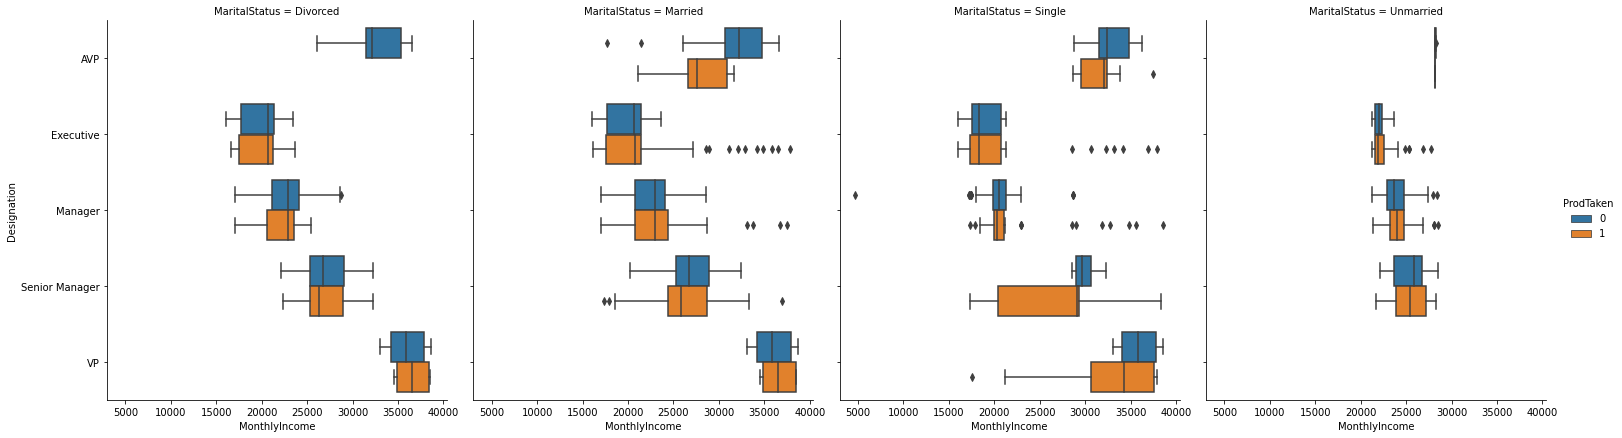

<IPython.core.display.Javascript object>

In [104]:
# Box plot MonthlyIncome Vs MaritalStatus of customer wiht hue = ProdTaken and on the column Designation

plt.figure(figsize=(20, 10))  # setting the figure size
ax = sns.catplot(
    x="MonthlyIncome",
    y="Designation",
    hue="ProdTaken",
    col="MaritalStatus",
    data=df,
    kind="box",
    height=6,
    aspect=0.9,
    ci=95,
    dodge=True,
)

**Insights:**
- The Single Senior Managers and VP customers purchased the packages eventhough their monthly income is lower than their counterparts who have other MaritalStatus

### MaritalStatus vs ProdTaken vs Designation vs DurationOfPitch

<Figure size 1440x720 with 0 Axes>

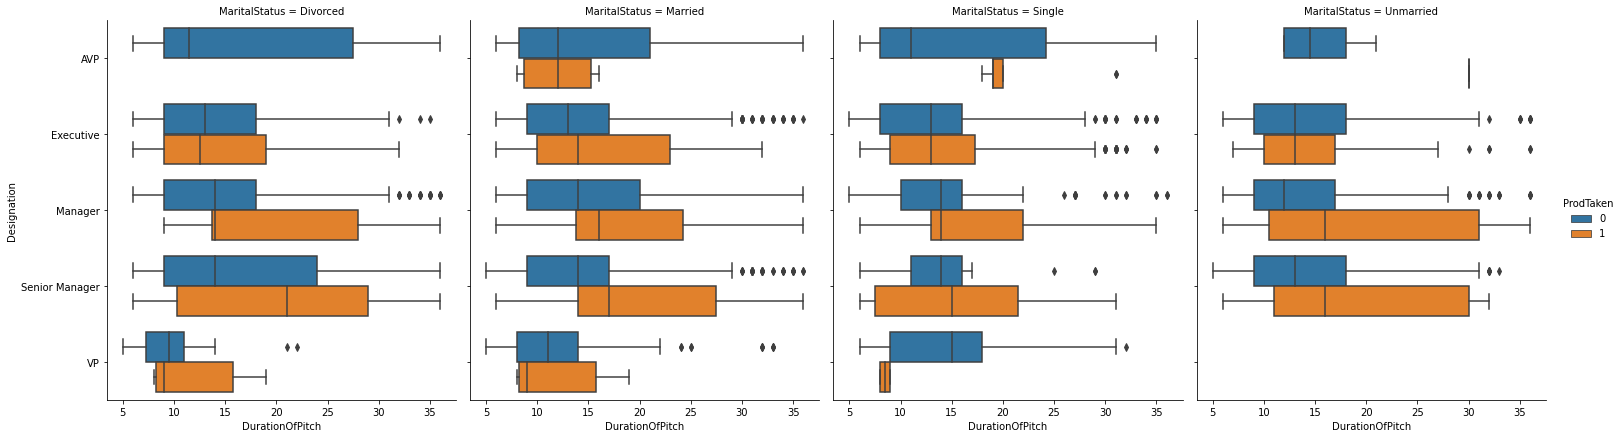

<IPython.core.display.Javascript object>

In [105]:
# Box plot DurationOfPitch Vs MaritalStatus of customer wiht hue = ProdTaken and on the column Designation

plt.figure(figsize=(20, 10))  # setting the figure size
ax = sns.catplot(
    x="DurationOfPitch",
    y="Designation",
    hue="ProdTaken",
    col="MaritalStatus",
    data=df,
    kind="box",
    height=6,
    aspect=0.9,
    ci=95,
    dodge=True,
)

**Insights:**
- The duration of speech last the most for Divorced Managers and Senior Managers, for Married and Single Senior Managers and even more for Unmarried Managers and Senior Managers

### Designation vs ProdTaken vs Occupation vs MonthlyIncome

<Figure size 1440x720 with 0 Axes>

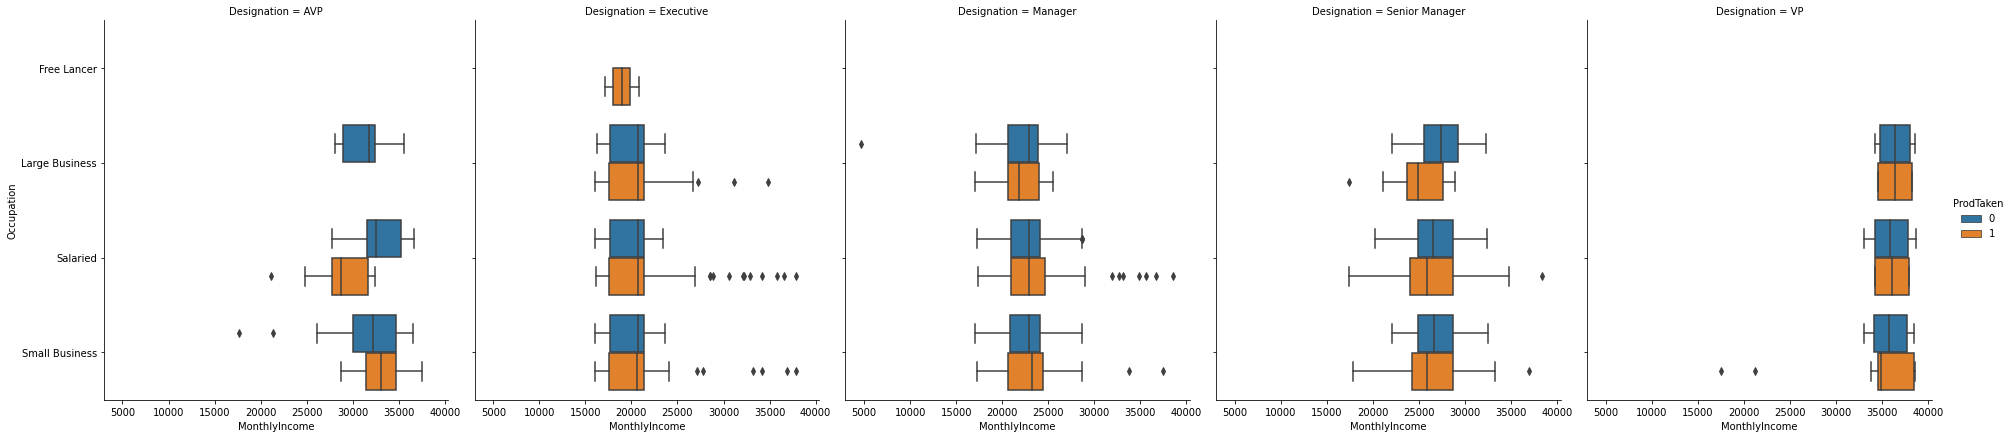

<IPython.core.display.Javascript object>

In [106]:
# Box plot MonthlyIncome Vs Designation of customer wiht hue = ProdTaken and on the column Occupation

plt.figure(figsize=(20, 10))  # setting the figure size
ax = sns.catplot(
    x="MonthlyIncome",
    y="Occupation",
    hue="ProdTaken",
    col="Designation",
    data=df,
    kind="box",
    height=6,
    aspect=0.9,
    ci=95,
    dodge=True,
)

**Insights:**
- All the Executive Free Lancer contacted purchased the packages
- The monthly income level of AVP who purchased the packages is greater for Small Business than for Salaries

### Designation vs ProdTaken vs Occupation vs Age

<Figure size 1440x720 with 0 Axes>

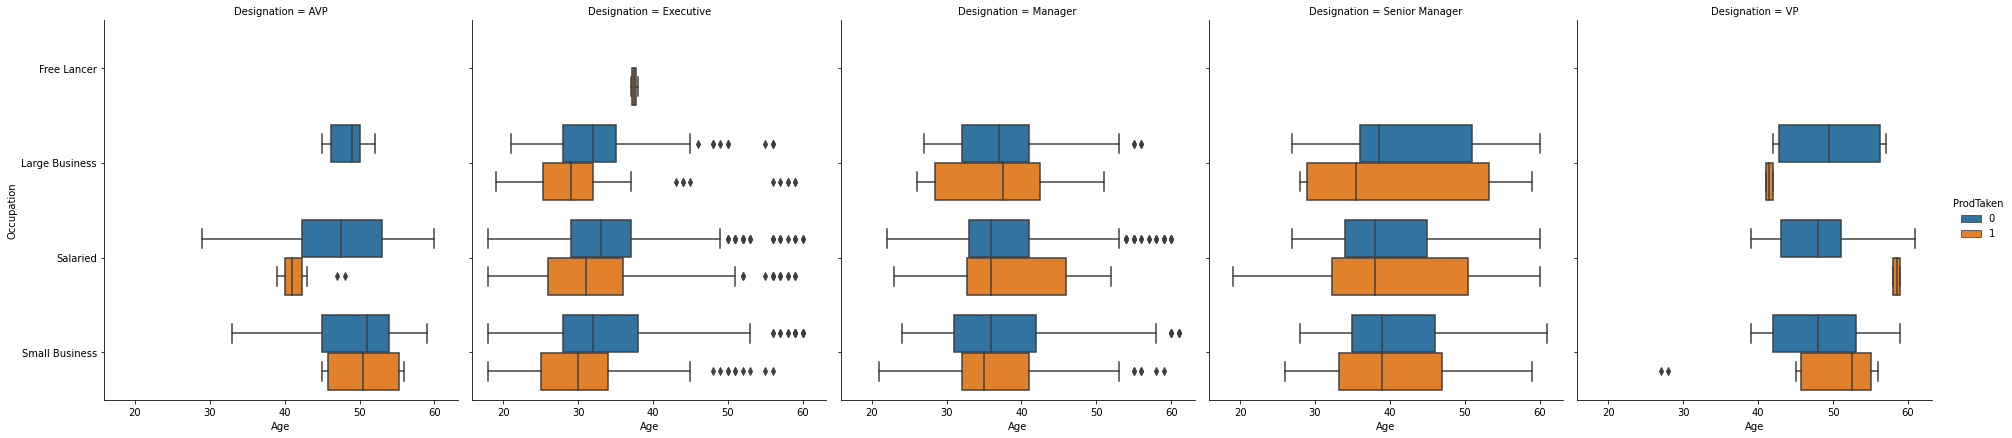

<IPython.core.display.Javascript object>

In [107]:
# Box plot Age Vs Occupation of customer wiht hue = ProdTaken and on the column Designation

plt.figure(figsize=(20, 10))  # setting the figure size
ax = sns.catplot(
    x="Age",
    y="Occupation",
    hue="ProdTaken",
    col="Designation",
    data=df,
    kind="box",
    height=6,
    aspect=0.9,
    ci=95,
    dodge=True,
)

**Insights:**
- The VP Large Business customers who purchased the packages are between 40-42 years old
- The VP Salaried customers who purchased the packages are between 58-60 years old
- The AVP Salaried who took the packages are in majoroty betweenn 39-42 years old
- Tje Executive Free Lancer who purchased the packages are between 38 and 39 years old


### Designation vs ProdTaken vs Occupation vs DurationOfPitch

<Figure size 1440x720 with 0 Axes>

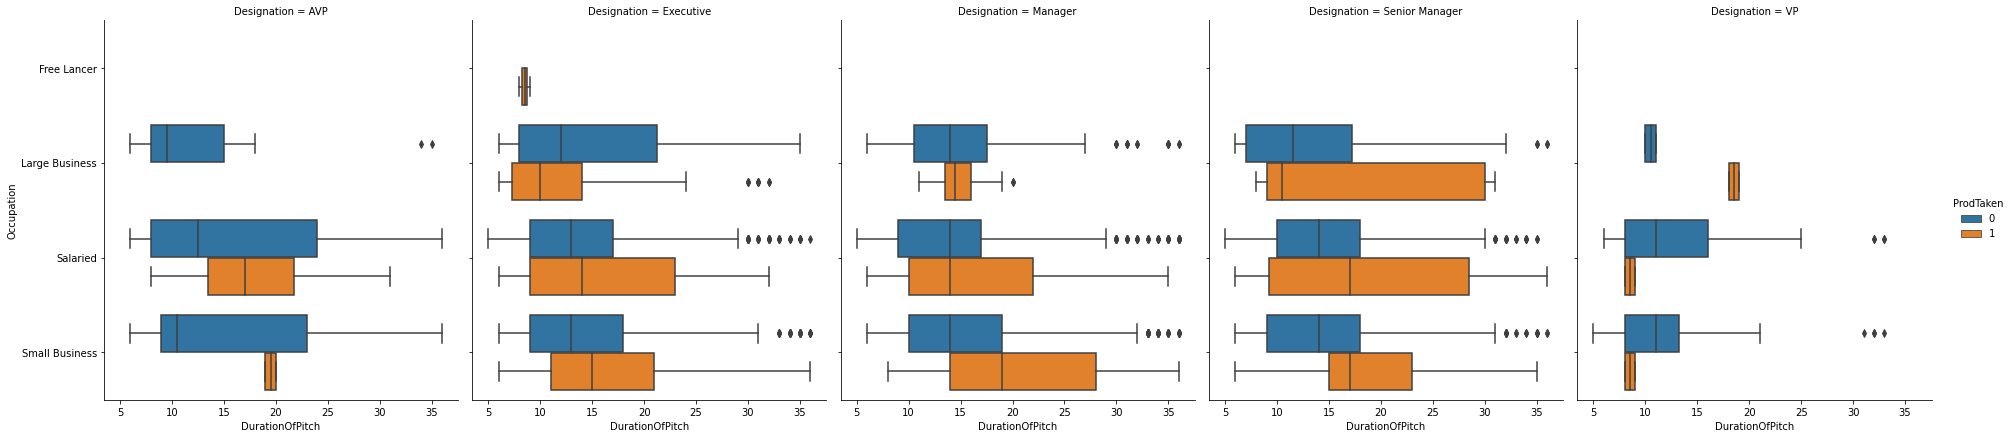

<IPython.core.display.Javascript object>

In [108]:
# Box plot DurationOfPitch Vs Occupation of customer wiht hue = ProdTaken and on the column Designation

plt.figure(figsize=(20, 10))  # setting the figure size
ax = sns.catplot(
    x="DurationOfPitch",
    y="Occupation",
    hue="ProdTaken",
    col="Designation",
    data=df,
    kind="box",
    height=6,
    aspect=0.9,
    ci=95,
    dodge=True,
)

**Insights:**
- Senior Managers Large Business and Salaried need more time (duration of pitch) with sale person, Executive Salaried, Managers Salaried and Small Business as well

### Designation vs ProdTaken vs ProductPitched vs Age

<Figure size 1440x720 with 0 Axes>

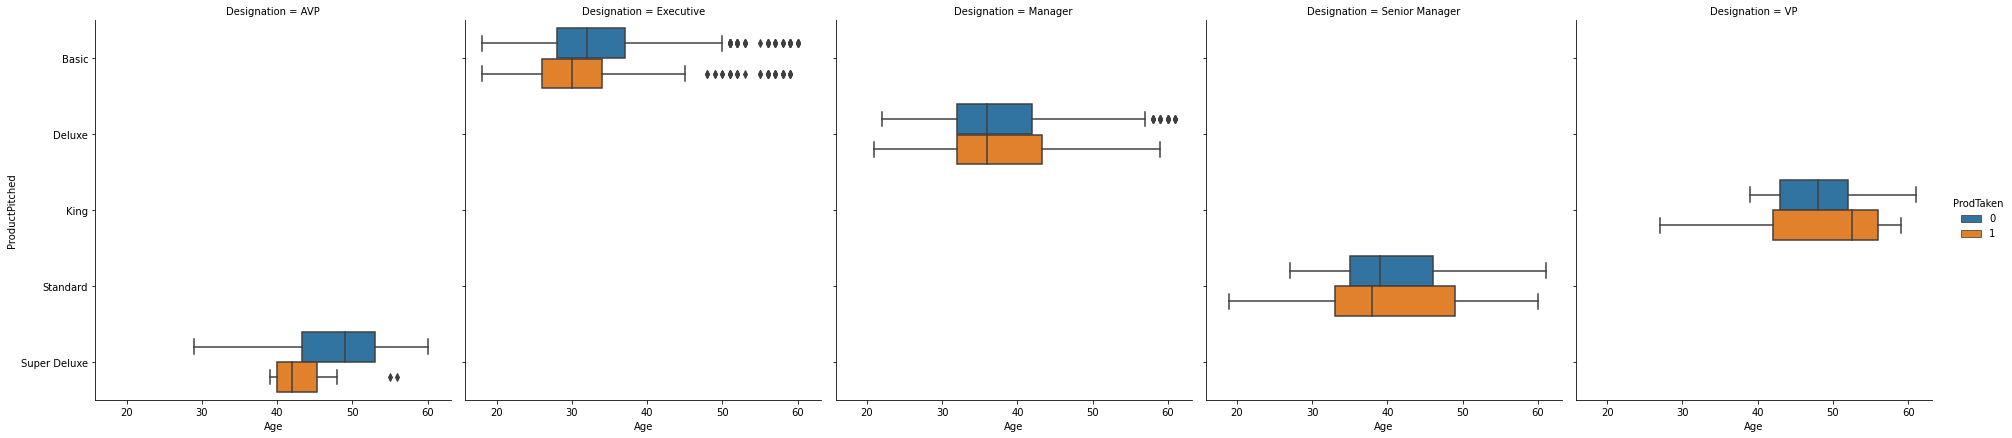

<IPython.core.display.Javascript object>

In [109]:
# Box plot Age Vs Designation of customer wiht hue = ProdTaken and on the column MaritalStatus

plt.figure(figsize=(20, 10))  # setting the figure size
ax = sns.catplot(
    x="Age",
    y="ProductPitched",
    hue="ProdTaken",
    col="Designation",
    data=df,
    kind="box",
    height=6,
    aspect=0.9,
    ci=95,
    dodge=True,
)

**Insights:**
- AVP customers purchased Super Deluxe package. Those who bought the package are in majority (75%) younger than the whole population of AVP
- Executive customers as well with the package Basic.

### Designation vs ProdTaken vs ProductPitched vs MonthlyIncome

<Figure size 1440x720 with 0 Axes>

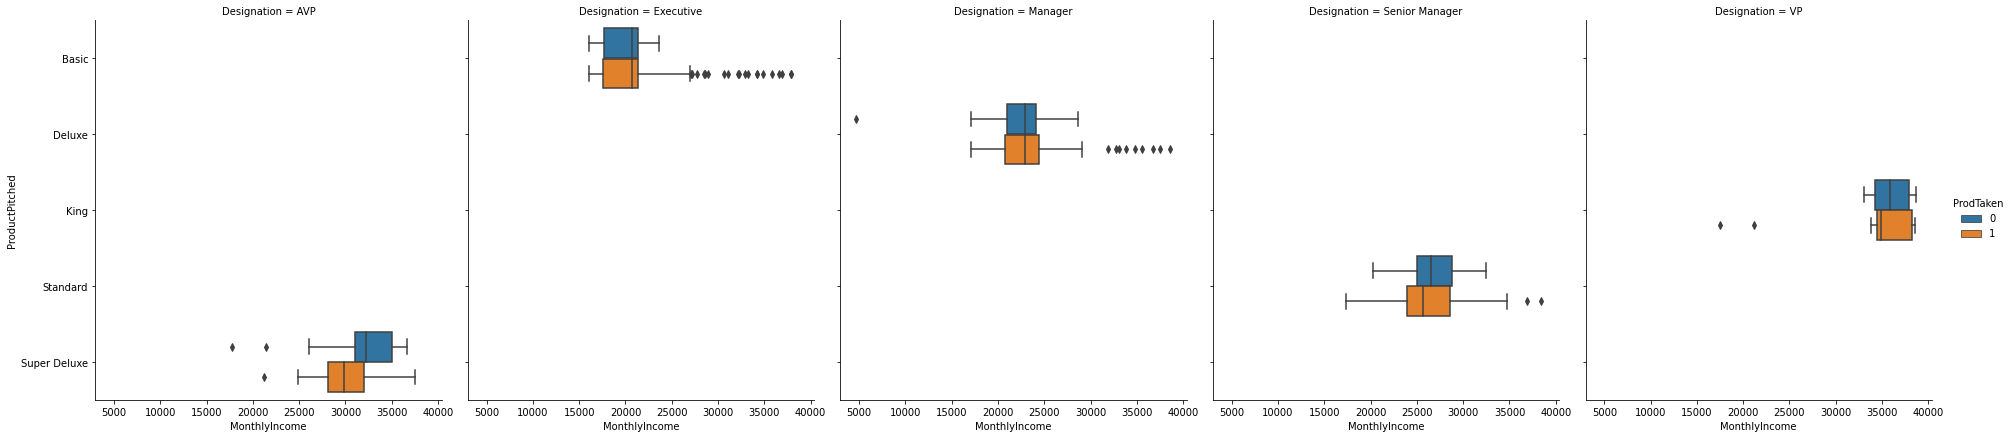

<IPython.core.display.Javascript object>

In [110]:
# Box plot MonthlyIncome Vs Designation of customer wiht hue = ProdTaken and on the column MaritalStatus

plt.figure(figsize=(20, 10))  # setting the figure size
ax = sns.catplot(
    x="MonthlyIncome",
    y="ProductPitched",
    hue="ProdTaken",
    col="Designation",
    data=df,
    kind="box",
    height=6,
    aspect=0.9,
    ci=95,
    dodge=True,
)

**Insights:**
- The monthly income of the 3/4 of AVP customers who purchased the Super Deluxe package is lower than median monthly income of the AVP who did not purchase the package.

### Designation vs ProdTaken vs ProductPitched vs DurationOfPitch

<Figure size 1440x720 with 0 Axes>

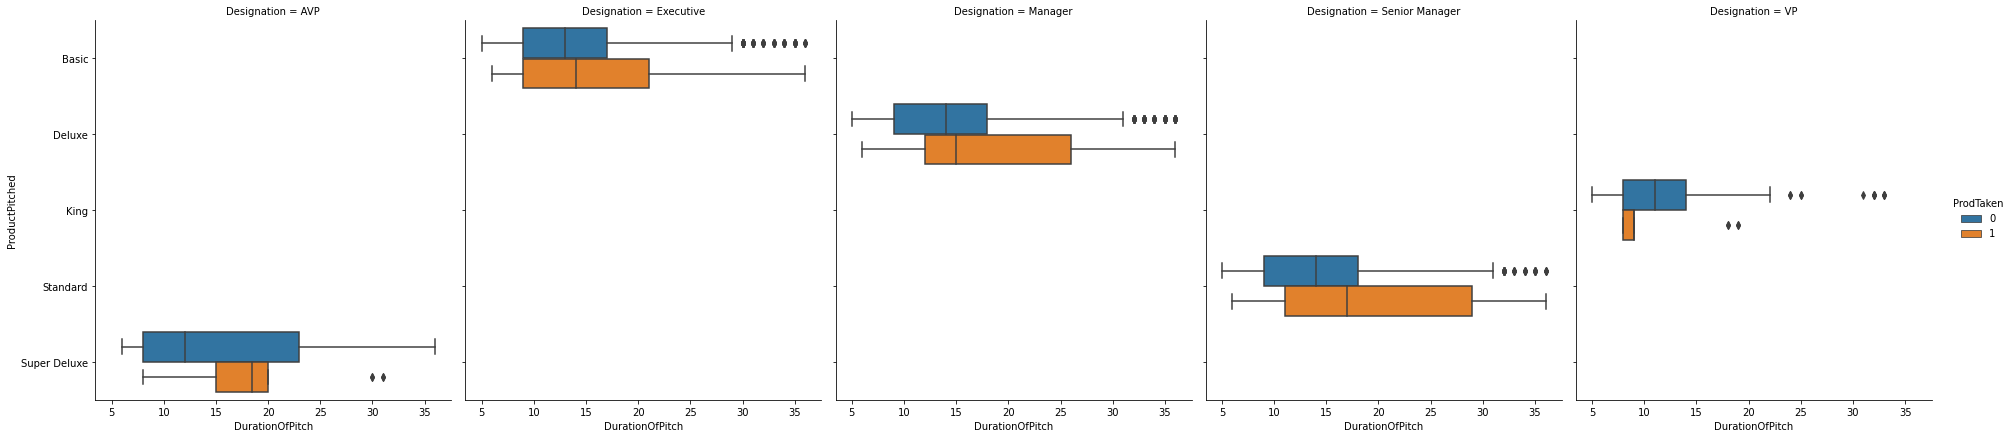

<IPython.core.display.Javascript object>

In [111]:
# Box plot DurationOfPitch Vs Designation of customer wiht hue = ProdTaken and on the column MaritalStatus

plt.figure(figsize=(20, 10))  # setting the figure size
ax = sns.catplot(
    x="DurationOfPitch",
    y="ProductPitched",
    hue="ProdTaken",
    col="Designation",
    data=df,
    kind="box",
    height=6,
    aspect=0.9,
    ci=95,
    dodge=True,
)

**Insights:**

- VP customers who purchased the King package usually don't need a long pitch duration unlike  Senior Managers, Managers and Executives.
- AVP duration of pitch does not last long either


### <a id='link1'>Summary of EDA</a>

* Dataset has 4888 rows and 20 columns.

* 14 of 20 columns of the data set are numerical.

* As there was one different `CustomerID` at each row of the dataset, We`ve dropped the column as it did not bring any added value for the analysis

**Missing values**
* There is no missing values in the target column `ProdTaken`
* Most rows don`t have missing values
* The columns `DurationOfPitch`, `MonthlyIncome` and `Age` have a lot of missing values. These could be customers who were contacted at random and their details were not reported
* Certain columns tend to be missing together or all nonmissing together. Rows with exactly 2 missing values are the most important, followed respectively by rows with 1 and 3 missing values
* The entries with no values on `MonthlyIncome` concern 2 Product pitched by the salesperson : Deluxe and Basic and 2 Designation of the customer : Manager and Executive)
* Those empty entries concern people aged in range 24 to 56 years old
* For modeling purpose, we will impute them
* The column `TypeofContact` is now filled. No missing values anymore
* Missing values have been computed in all columns of the dataset


* The columns `ProdTaken`, `PreferredPropertyStar`, `CityTier`, `NumberOfPersonVisiting`, `NumberOfFollowups`, `NumberOfChildrenVisiting`, `Passport`, `OwnCar`, `TypeofContact`, `Occupation`, `Gender`, `ProductPitched`, `MaritalStatus` and `Designation` have been converted to categories

* Fe Male value has been replace by Female

**Data summary**
* Customer Age is spread in the range 18 to 61 years old. It`s a litle bite right skewed.
* DurationOfPitch (Duration of the pitch by a salesperson to the customer) is also right skewed (The mean is greater than median).
* We can see a slight right skewness on the column NumberOfTrips.
* The is a huge gap between the 75% quantile and the maximum. There is a right skewness in this column too
  - **Insight** : We can see some right skewness in the numerical value of the dataset 


**Basic package customers insights:**

* The Basic package represents the most important package bought by the customers. It represents around 38% of the offer
* It's a regular package for Salaried, Small Business, Large Business and Free Lancer (Since they are those who demand the basic package)
* Those customers was mostly contacted through Self Enquiry and through CompanyInvited. We don't have information about how 10 of them was contacted
* The vast majority of the customers of the Basic package are in CityTier Tier 1 (around 80%). Around 6% are in CotyTier Tier 2 and 14% are in CityTier Tier 3
* The Male is the Gender who buy the most this package (63%) and 37% of Female buy the Basic package
* The customers of the Basic package plan to take the trip with 3 persons mostly. They are also often accompagnied by 2 or 4 persons.
* The average number of follup ups done by saleperson on this product is 4
* Very few Unmarried and Divorced persons want this package. It's respectively acclaimed by Married and Single persons
* The Sales pitch satisfaction score is mostly at level of 3 or 4. We have less 5 and have some 1 and 2
* Most of the customers of the Basic package have 1 child with age less than 5 planning to take the trip with them. Others have 2 children. Altmost 22% of them have no child to take trip with them
* They are mostly between 18 and 33 years old.
* The company targets Executives with the Basic package. Approx 30% of the Executives purchased the package
* Most of the Executive (69%) don't have a passport
* 5-127 minutes of Duration of pitch by a salesperson to the customer of this Basic package
* Number of trips between 1 and 20
* Monthly income between 16K and 98.6K


**Deluxe package customers insights:**

* The Deluxe package represents the second most important package bought by the customers. It represents around 35% of the offer
* It's a package requested by Salaried, Small Business and Large Business respectively
* Those customers was mostly contacted through Self Enquiry and through CompanyInvited. We don't have information about how 15 of them was contacted
* The vast majority of the customers of the Deluxe package are in CityTier Tier 1 (around 52%). Around 2% are in CotyTier Tier 2 and 45% are in CityTier Tier 3
* The Male is the Gender who buy the most this package (58%) and 42% of Female buy the Deluxe package
* The customers of the Deluxe package plan to take the trip with 3 persons mostly. They are also often accompagnied by 2 or 4 persons. Rarely with 1 or 5 persons
* The follup ups done by saleperson on this product are frequently 4 or 3
* Many Married persons want this package. They are followed by Divorced  and Unmarried persons. The Deluxe package is less acclaimed by Single persons
* The Sales pitch satisfaction score is mostly at level of 3, 1 or 5. 4 and 2 scores are also common
* Most of the customers of the Deluxe package have 1 child with age less than 5 planning to take the trip with them. Others have 2 children. Some times, those customers are with 3 children. Altmost 22.6% of them have no child to take trip with them
* The company customized the Deluxe package for Managers. 11.8% of the Managers purchased the package
* 72% of Managers don't have a passport
* They are mostly between 21 and 37 years old.
* 5-36 minutes of Duration of pitch by a salesperson to the customer of this Deluxe package
* Number of trips between 1 and 22
* Monthly income between 1K and 38.5K


**Standard package customers insights:**

* The Standard package represents the third most important package bought by the customers. It represents around 15% of the offer
* It's a package requested by Salaried, Small Business and Large Business respectively
* Those customers was exclusively contacted through Self Enquiry and through CompanyInvited.
* The vast majority of the customers of the Standard package are in CityTier Tier 1 (around 59%). Around 2% are in CotyTier Tier 2 and 39% are in CityTier Tier 3
* The Male is the Gender who buy the most this package (56%) and 44% of Female buy the Standard package
* The customers of the Standard package plan to take the trip with 3 persons mostly. They are also often accompagnied by 2 or 4 persons. Rarely with 1 or 5 persons
* The follup ups done by saleperson on this product are frequently 4 or 3
* Many Married persons want this package. They are followed by Unmarried and Divorced persons. The Standard package is less acclaimed by Single persons
* The Sales pitch satisfaction score is mostly at level of 3, 5 or 1. 4 and 2 scores are also common
* Most of the customers of the Standard package have 1 child with age less than 5 planning to take the trip with them. Others have 2 children. Some times, those customers are with 3 children. Altmost 23.2% of them have no child to take trip with them
* The company targets Senior Managers with the Standard package. 16.7% of the Senior Manager purchased the package
* Approx 72% of Senior Managers don't have a passport
* They are mostly between 19 and 41 years old.
* 5-36 minutes of Duration of pitch by a salesperson to the customer of this Standard package
* Number of trips between 1 and 8
* Monthly income between 17.4K and 38.4K



**Super Deluxe package customers insights:**

* The Super Deluxe package represents the fourth most important package bought by the customers. It represents around 7% of the offer
* It's a package requested by Salaried, Small Business and Large Business respectively
* Those customers was exclusively contacted through Self Enquiry and through CompanyInvited.
* The vast majority of the customers of the Super Deluxe package are in CityTier Tier 1 (around 62%). Around 3% are in CityTier Tier 2 and 35% are in CityTier Tier 3
* The Male is the Gender who buy the most this package (53%) and 47% of Female buy the Super Deluxe package
* The customers of the Super Deluxe package plan to take the trip with 3 persons mostly. They are also often accompagnied by 2 or 4 persons. Rarely with 1 person and never 5 persons up to now
* The follup ups done by saleperson on this product are frequently 4 or 3
* Many Married persons want this package. They are followed by Divorced and Single persons. The Super Deluxe package is less acclaimed by Unmarried persons
* The Sales pitch satisfaction score is mostly at level of 3 and 5 . 4 and 1 scores are often common. The score 2 is sometime allocated by the Super Deluxe customers
* Most of the customers of the Super Deluxe package have 1 child with age less than 5 planning to take the trip with them. Others have 2 children. Some times, those customers are with 3 children. Altmost 24.6% of them have no child to take trip with them
* The Super Deluxe package is cutomized for AVP. 5.8% of the AVP purchased the package
* Approx 70% of AVP don't have a passport
* They are mostly between 48 and 60 years old.
* 6-36 minutes of Duration of pitch by a salesperson to the customer of this Super Deluxe package
* Number of trips between 1 and 8
* Monthly income between 17.7K and 37.5K


**King package customers insights:**

* The King package is the less important package bought by the customers. It represents around 5% of the offer
* It's a package requested by Salaried, Small Business and Large Business respectively
* Those customers was exclusively contacted through Self Enquiry and through CompanyInvited.
* The vast majority of the customers of the King package are in CityTier Tier 1 (around 73%). Around 10% are in CityTier Tier 2 and 17% are in CityTier Tier 3
* The Male is the Gender who buy the most this package (64%) and 36% of Female buy the King package
* The customers of the King package plan to take the trip with 3 persons mostly. They are also often accompagnied by 2 or 4 persons. Never with 1 or 5 persons up to now
* The follup ups done by saleperson on this product are frequently 4 or 3
* Many Married persons request this package. They are followed by Divorced and Single persons. The King package is not much acclaimed by Unmarried persons up to now
* The Sales pitch satisfaction score is mostly at level of 5 and 4. The score 3 is also well represented in this group as well as the scores 1 and 2
* Most of the customers of the King package have 1 child with age less than 5 planning to take the trip with them. Others have 2 children. Some times, those customers are with 3 children. Altmost 13.5% of them have no child to take trip with them
* The company targets the VP customers with the King package and they are 8.7% to take the package. 
* Approx 74% of VP don't have a passport
* They are mostly between 48 and 61 years old.
* 5-33 minutes of Duration of pitch by a salesperson to the customer of this King package. 91.3% of them don't take package King
* Number of trips between 1 and 8
* Monthly income between 17.5K and 38.7K


**Outliers detection and handling**
* We have 3 outliers in the column `MonthlyIncome`
* We have 4 outliers in the column `NumberOfTrips`
* We have 2 outliers in the column `DurationOfPitch`
* All these outliers have been removed



**Univariate Analysis**

* The distribution of Age is right skewed.
* From boxplot we can see that the third quartile(Q3) is equal to 43 which means 75% of customers are below the age of 43.

* Mean Duration of the pitch by a salesperson to the customer is 15.36 minutes
* There are a few some extreme values (outliers?) present in data (Duration of the pitch greater than 33 minutes)

* Most customers Average number of trips in a year is between 3 and 4.
* The column values are discrete

* Mean monthly income of customers who bought packages is around 23525.
* Monthly income is right skewed.
* It seems to still have out of range values towards the higher end.

* 81% of customers didn't purchased a package and almost 19% did purchase a package
* More than 70% of customers was contacted through by Sel Enquiry and 29% of them was contacted theough a company invitation
* 65% of customers are in the category Tier 1, more than 30% in the category Tier 3 and around 4% are in the category Tier 2
* 48.4% of the customers are Salaried, 42.7% are Small Business, 8.8% are Large Business and a few rare customers are Free Lancer
* Approx 60% of customers are Male while around 40% are Female
* Around 49% of customer plan to take the trip with a total number of 3 persons, 29% with 2 persons, 21% plan to take the trip with 4 persons and approx the 1% customers remaining plan to take the trip with 1 or 5 persons
* 43.2% of the number of follow-ups done after the sales pitch is 4 on a scale of 6. 30% of the number of follow-ups done is 3
* The Basic package represent 37.6% of the Product pitched by the salesperson, followed respectively by Deluxe (35.4%), Standard (15.2%), Super Deluxe (7%) and King (4.7%)
* 61.8% of the customers have rated the hotel property at 3 (the scale is from 3 to 5). The rating 4 and 5 represent respectively 18.7% and 19.6%
* Approx 48% of customers are Married, 19.4% are Divorced, 18.7% are Single and approx 14% are Unmarried
* 71% of customers don't have a passport. Only 29% have it
* 30.3% of customers' Sales pitch satisfaction score is 3, followed by the ratings 5 (19.9%), 1 (19.3%), 4 (18.7%) and 2 (11.9%)
* 62% of customers own a car and 38% don't
* 43.9% of customers have 1 child with age less than 5 to take the trip, 27.3% of them have 2 children, 22% of the customers take the trip without children and 6.7% plan to take the trip with 3 children
* 37.6% of customers are Executive, 35.4% are Manager, 15.2% are 15.2%, 7% of customers are AVP and 4.7% of them are AVP

**Bivariate Analysis**
  
* No notable correlations between numerical variables
* The Average Age of customers that request the packages is around 33 years. The Average of the customers who refused the packages is above 35 years old.
* The duration of spitch by salepersons is more spread among customers who bought packages. Some customers accept the packages from the 6th minute of spitch with a mean at 15 minutes. 
* The duration box splot is less larger among the customers that refuse the packages. The average duration of speech is around 13 minutes
* There is no significant difference in the average number of trips in a year among those who buy or who do not buy packages
* Customers with the higher average of monthly income tend not to purchase the packages offered
* Basic package is the most purchased. Deluxe is the most refused, followed by Basic but Deluxe is the second most purchased. King and Super Deluxe packages are the less required by the customers
* Self inquiry customers are the one who purchase the most the packages. There are also those who do not purchase the packages
* The customers who bought the packages are in the category Tier 1 and Tier 3. Only very few of them are in the category Tier 2
* Most of the customers who purchased the packages Salaried and Small Business. Few Large Business accepted to purchase the packages as well. Free Lancer purchases are very negligeable
* The packages are more often purchased by Male than by Female
* Total number of persons planning to take the trip with the customers who purchase the package is 1, followed by 2 and 4
* The number of follow-ups done to the customers who purchased the packages is regularly 4, followed by 3, 5.
* The Preferred hotel property rating by customer 3, both for the who purchased the packages or not. The rates 5 and 4 followed respectively for customers that purchased
* Married customers by the packages the most, followed by Single customers. Divorced and Unmarried are the customers who purchased the less
* The purchases of the packages tend not to be influenced by holding a passport or not
* The common Sales pitch satisfaction score for customers who purchased the packages is 3, followed by 5, 4, 1 and 2
* Most of the customers that purchased the packages own a car. However, many of those who parchased do not have a car
* The frequent number of children with age less than 5 planning to take the trip with the customers who purchased the packages is 1. This number is followed by 2. Some customers plan the trip with no children
* Executive purchased the most the packages, followed by Managers and Senior Managers
* The most frequent average number of trips in a year of the customers who purchased the packages is 2. 3 is also frequent among customers purchasing the packages


  **Multivariate Analysis**

* The monthly average income of Divorced Female customers who purchased the packages is around 23K whereas the the monthly average income of Divorced Male customers who purchage the packages is 21K
* The monthly revenu of Female and Male Married customers who purchased the packages is comparable
* The average of monthly income is higher for Single Male customers who bought the packages (20K) than for Single Female customers (around 18K) who purchase the packages
* The observation for Unmarried Male customers who purchased the packages is the same than the Unmarried Female customers that purchased the packages
* The monthly income levels of customers who have purchased the packages are quite similar, regardless of marital status and gender

* 75% of Divorced Male customers who purchase the packages are aged under 40. The Divorced Female customers who purchased the packages are aged under 45. The average Age of Divorced Female customers who purchased the packages is around 35 years old whereas the the average Age of Divorced Male customers who purchage the packages is 32. The Divorced Male customers who purchased the packages are younger than the Divorced Female who bought the packages.
* 75% of Married Female customers who bought the packages are under age of 45. 75% of Married Male customers who purchased the packages are under 41-42. The average Age of Married Female customers who purchased the packages is aaround 35 years old while the average Age of Married Male customers who purchased the packages is around 37. So, most of the Married Male customers who purchased the packages are younger than the majority of Female Married customers who purchased.
* 75% of Single Female customers who purchased the packages are under 33 whereas 75% of Single Male customers who purchased the packages are under 40. The average Age of Single Male customers who bought the packages is around 32 whereas the average Age of Single Female customers who purchase the packages is around 30. So, most of the Single Male customers who purchased the packages are older than the majority of Female Single customers who purchased.
* The 3/4 of Unmarried Female customers who purchased the packages are under 35 while the 3/4 of Unmarried Male customers who bought the packages are under 42. The average Age of Unmarried Male customers who purchased the packages is around 33 years old and the average Age of the Single Female customers that purchased the packages is around 31-32. So, most of the Unmarried Male customers who purchased the packages are older than the majority of Female Unmarried customers who purchased.

* The duration of the pitch for the 3/4 of Divorced Female customers who purchased the packages is up to 25 minutes. The 25% of Divorced Female customers remaining monopolized between 25 and 34 minutes of duration of pitch. The average duration of the Divorced Female customers is around 17-18 minutes. 75% of Divorced Male customers who purchased the packages took around 20-21 minutes to the sale persons. The 25% of Divorced Male customers remaining monopolized between 21 and 36 minutes of duration of pitch. The average duration of the Divorced Male customers is around 13-14 minutes. **In general, the duration of the pitch by sale person for Divorced Male customers who purchased the packages is lower than the duration of the pitch for Divorce Female customers** 
* The duration of the pitch for the 3/4 of Married Female customers who purchased the packages is up to 28 minutes. The 25% of Married Female customers remaining monopolized between 28 and 35 minutes of duration of pitch. The average duration of the Married Female customers is around 15 minutes. 75% of Married Male customers who purchased the packages took around 22 minutes to the sale persons. The 25% of Married Male customers remaining monopolized between 23 and 36 minutes of duration of pitch. The average duration of the Married Male customers is around 16 minutes. **In general, the duration of the pitch by sale person for Married Male customers who purchased the packages is lower than the duration of the pitch for Married Female customers** 
* The duration of the pitch for the 3/4 of Single Female customers who purchased the packages is up to 17 minutes. The 1/4 of Single Female customers remaining monopolized between 17 and 30 minutes of duration of pitch. The average duration of the Single Female customers who purchased the packages is around 14 minutes. 75% of Single Male customers who purchased the packages took around 27 minutes to the sale persons. The 25% of Single Male customers remaining monopolized between 27 and 35 minutes of duration of pitch. The average duration of the Single Male customers is around 14 minutes. **In general, the duration of the pitch by sale person for Single Male customers who purchased the packages is greater than the duration of the pitch for Single Female customers**
* The duration of the pitch for the 3/4 of Unmarried Female customers who purchased the packages is up to 24 minutes. The 1/4 of Unmarried Female customers remaining monopolized between 24 and 35 minutes of duration of pitch. The average duration of the Unmarried Female customers who purchased the packages is around 19 minutes. 75% of Unmarried Male customers who purchased the packages took around 17 minutes to the sale persons. The 25% of Unmarried Male customers remaining monopolized between 17 and 27 minutes of duration of pitch. The average duration of the Unmarried Male customers is around 13 minutes. **In general, the duration of the pitch by sale person for Unmarried Male customers who purchased the packages is lower than the duration of the pitch for Unmarried Female customers**


- The Female AVP customers who purchased the packages are around 40 years old. The Male AVP customers who purchased the packages are at most 47 years old. 
- Most of the Female Executive customers who took a packages are at most or under 35 years old whereas the Male Executive customers who purchased the packages are at most 37 years.
- The Female Managers who bought the packages are in majority at most 42 years old while 3/4 of the Male Managers who took the packages are at most 46 years old.
- 75% of Female Senior Managers who purchased the packages are at most 55 years old. The range of this segment of customers is very spread (from 25 to 60 years old). 75% of the Male Senior Managers who purchased the packages are at most 47 years old.
- The 3/4 of Female VP customers who purchased the packages are under 53 years old whereas all the Male VP customers who purchased the packages are between 55 and approx 60 years old


- The Female AVP customers who purchased the packages have a monthly revenue between 28K and 33K. 3/4 of Male AVP customers who purchased the packages earn between 22K and 33K each month.
- Most of (75%) the Female Executive customers who took a packages have a monthly revenue around 23K whereas the Male Executive customers who purchased the packages earn around 21K each month.
- The Female Managers who bought the packages earn in majority (75%) under 25K each month. 3/4 of the Male Managers who took the packages have the same monthly revenue.
- 75% of Female Senior Managers who purchased the packages earn a monthly income of less than 29K. 75% of the Male Senior Managers who purchased the packages are under 29K of monthly income too.
- The 3/4 of Female VP customers who purchased the packages earn a monthly income of less than 40K. which is the same situation of the Male VP customers who purchased the packages 

- Except for Female Executive, the duration of pitch last the longest among the Female who purchased the packages than among the Male who purchased them too, whatever the Designation. 

- No Divorced AVP purchased the packages and it is almost the case for clients who are Unmarried. 
- The AVPs customers who took the packages are either Married or Single. They are aged between 39 and 50 for Married customers and between 40 and 45 when Single

- The Single Senior Managers and VP customers purchased the packages eventhough their monthly income is lower than their counterparts who have other MaritalStatus

- The duration of speech last the most for Divorced Managers and Senior Managers, for Married and Single Senior Managers and even more for Unmarried Managers and Senior Managers

- All the Executive Free Lancer contacted purchased the packages
- The monthly income level of AVP who purchased the packages is greater for Small Business than for Salaries

- The VP Large Business customers who purchased the packages are between 40-42 years old
- The VP Salaried customers who purchased the packages are between 58-60 years old
- The AVP Salaried who took the packages are in majoroty betweenn 39-42 years old
- Tje Executive Free Lancer who purchased the packages are between 38 and 39 years old

- Senior Managers Large Business and Salaried need more time (duration of pitch) with sale person, Executive Salaried, Managers Salaried and Small Business as well

- AVP customers purchased Super Deluxe package. Those who bought the package are in majority (75%) younger than the whole population of AVP
- Executive customers as well with the package Basic.

- The monthly income of the 3/4 of AVP customers who purchased the Super Deluxe package is lower than median monthly income of the AVP who did not purchase the package.

- VP customers who purchased the King package usually don't need a long pitch duration unlike  Senior Managers, Managers and Executives.
- AVP duration of pitch does not last long either

## Data preparation

In [112]:
# Convert the columns 'Gender" from object to category

df["Gender"] = df["Gender"].astype("category")

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4879 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4879 non-null   category
 1   Age                       4879 non-null   float64 
 2   TypeofContact             4879 non-null   category
 3   CityTier                  4879 non-null   category
 4   DurationOfPitch           4879 non-null   float64 
 5   Occupation                4879 non-null   category
 6   Gender                    4879 non-null   category
 7   NumberOfPersonVisiting    4879 non-null   category
 8   NumberOfFollowups         4879 non-null   category
 9   ProductPitched            4879 non-null   category
 10  PreferredPropertyStar     4879 non-null   category
 11  MaritalStatus             4879 non-null   category
 12  NumberOfTrips             4879 non-null   float64 
 13  Passport                  4879 non-null   catego

<IPython.core.display.Javascript object>

In [113]:
# Making a copy of the dataset
df2 = df.copy()

<IPython.core.display.Javascript object>

In [114]:
# Separating features and the target column
X = df2.drop("ProdTaken", axis=1)
y = df2["ProdTaken"]

<IPython.core.display.Javascript object>

In [115]:
# creating dummy variables
X = pd.get_dummies(X, drop_first=True)

<IPython.core.display.Javascript object>

## Split the dataset

In [116]:
# Splitting the data into train and test sets in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1, shuffle=True
)

<IPython.core.display.Javascript object>

In [117]:
X_train.shape, X_test.shape

((3415, 43), (1464, 43))

<IPython.core.display.Javascript object>

- We have 3,415 observations in the train set and 1,464 observations in the test set.

In [118]:
print("The shape of the Training set is : ", X_train.shape)
print("The shape of the test set is: ", X_test.shape)
print("The Percentage of classes in training set is:")
print(y_train.value_counts(normalize=True))
print("The Percentage of classes in test set is:")
print(y_test.value_counts(normalize=True))

The shape of the Training set is :  (3415, 43)
The shape of the test set is:  (1464, 43)
The Percentage of classes in training set is:
0    0.810542
1    0.189458
Name: ProdTaken, dtype: float64
The Percentage of classes in test set is:
0    0.814891
1    0.185109
Name: ProdTaken, dtype: float64


<IPython.core.display.Javascript object>

## Building Models

- We'll fit different models on the train data and observe their performance. 
- We'll try to improve that performance by tuning some hyperparameters available for that algorithm.
- We'll use GridSearchCv for hyperparameter tuning and **`f1 score`** to optimize the model. As the company wants **1) to know who is going to purchase the newly introduced travel package** and **2) to target the right customers before contacting them**, the situations which are critical for the company are: Simultaneously, reduce the risk of False Positives (FP) as well as the risk of False Negatives (FN). The company needs to have a more precise and closer idea of the customers likely to purchase the package and that he will contact.
- Let's start by creating a function to get model scores, so that we don't have to use the same codes repeatedly.

In [119]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn_with_threshold(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics, based on the threshold specified, to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # predicting using the independent variables
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    pred = np.round(pred_thres)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy Score": acc,
            "Recall Score": recall,
            "Precision Score": precision,
            "F1 Score": f1,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [120]:
# defining a function to plot the confusion_matrix of a classification model built using sklearn
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

## Decision Tree Model

In [121]:
# we can pass a dictionary {0:0.18,1:0.82} to the model to specify the weight of each class and the decision tree will give more weightage to class 1

dtree = DecisionTreeClassifier(
    criterion="gini", class_weight={0: 0.18, 1: 0.82}, random_state=1
)

<IPython.core.display.Javascript object>

In [122]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.18, 1: 0.82}, random_state=1)

<IPython.core.display.Javascript object>

#### Checking model performance on training set

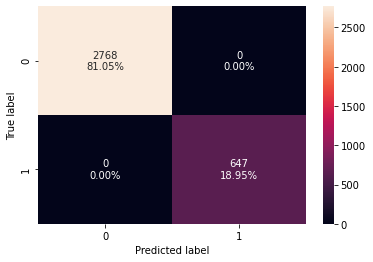

<IPython.core.display.Javascript object>

In [123]:
confusion_matrix_sklearn(dtree, X_train, y_train)

In [124]:
dtree_model_train_perf = model_performance_classification_sklearn_with_threshold(
    dtree, X_train, y_train
)

print("Training performance:")
dtree_model_train_perf

Training performance:


,Accuracy Score,Recall Score,Precision Score,F1 Score
0,1.0,1.0,1.0,1.0


<IPython.core.display.Javascript object>

#### Checking model performance on testing set

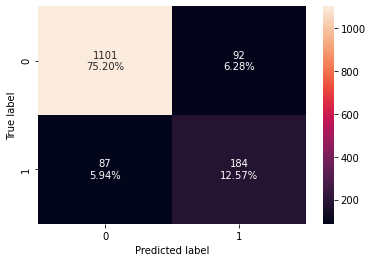

<IPython.core.display.Javascript object>

In [125]:
confusion_matrix_sklearn(dtree, X_test, y_test)

In [126]:
dtree_model_test_perf = model_performance_classification_sklearn_with_threshold(
    dtree, X_test, y_test
)

print("Test set performance:")
dtree_model_test_perf

Test set performance:


,Accuracy Score,Recall Score,Precision Score,F1 Score
0,0.877732,0.678967,0.666667,0.672761


<IPython.core.display.Javascript object>

- The model is perfect on the training set but is not generalized as the F1 score is not very great on the testing set
- The Decision tree model with default parameters is overfitting the train data.
- We'll see later if we can reduce overfitting and improve performance on test data by tuning hyperparameters.

## Random Forest Model

In [127]:
rf = RandomForestClassifier(
    criterion="gini", class_weight={0: 0.18, 1: 0.82}, random_state=1
)

<IPython.core.display.Javascript object>

In [128]:
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.18, 1: 0.82}, random_state=1)

<IPython.core.display.Javascript object>

#### Checking the model performance on the training set

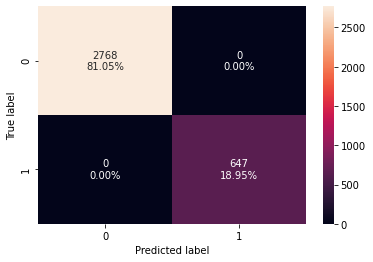

<IPython.core.display.Javascript object>

In [129]:
confusion_matrix_sklearn(rf, X_train, y_train)

In [130]:
rf_model_train_perf = model_performance_classification_sklearn_with_threshold(
    rf, X_train, y_train
)

print("Training performance:")
rf_model_train_perf

Training performance:


,Accuracy Score,Recall Score,Precision Score,F1 Score
0,1.0,1.0,1.0,1.0


<IPython.core.display.Javascript object>

#### Checking the model on the testing test

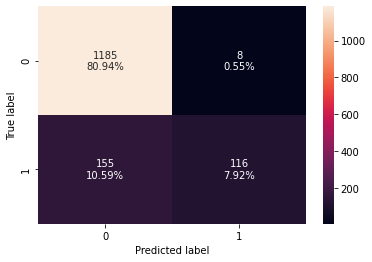

<IPython.core.display.Javascript object>

In [131]:
confusion_matrix_sklearn(rf, X_test, y_test)

In [132]:
rf_model_test_perf = model_performance_classification_sklearn_with_threshold(
    rf, X_test, y_test
)

print("Test set performance:")
rf_model_test_perf

Test set performance:


,Accuracy Score,Recall Score,Precision Score,F1 Score
0,0.888661,0.428044,0.935484,0.587342


<IPython.core.display.Javascript object>

- Random forest is giving a good Precision score of 93.5% on the test data but Recall and F1 score are still very low.
- Model is overfitting the train data as the gap with Recall and F1 score is very very high with the test set
- Let's try to reduce this overfitting by hyperparameter tuning later.

## Bagging Classifier

In [133]:
bagging = BaggingClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [134]:
bagging.fit(X_train, y_train)

BaggingClassifier(random_state=1)

<IPython.core.display.Javascript object>

#### Checking the model performance on the training set

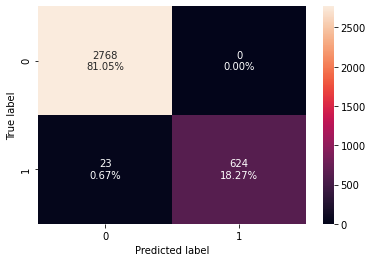

<IPython.core.display.Javascript object>

In [135]:
confusion_matrix_sklearn(bagging, X_train, y_train)

In [136]:
bagging_model_train_perf = model_performance_classification_sklearn_with_threshold(
    bagging, X_train, y_train
)

print("Training performance:")
bagging_model_train_perf

Training performance:


,Accuracy Score,Recall Score,Precision Score,F1 Score
0,0.993265,0.964451,1.0,0.981904


<IPython.core.display.Javascript object>

#### Checking the model performance on the testing set

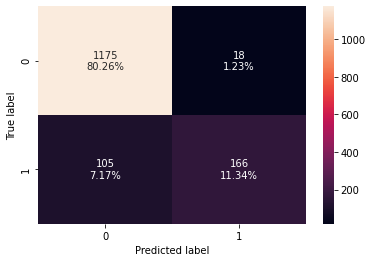

<IPython.core.display.Javascript object>

In [137]:
confusion_matrix_sklearn(bagging, X_test, y_test)

In [138]:
bagging_model_test_perf = model_performance_classification_sklearn_with_threshold(
    bagging, X_test, y_test
)

print("Test set performance:")
bagging_model_test_perf

Test set performance:


,Accuracy Score,Recall Score,Precision Score,F1 Score
0,0.915984,0.612546,0.902174,0.72967


<IPython.core.display.Javascript object>

* Bagging classifier is overfitting on the training set and is performing very less on the test set in terms of recall score espacially.
- The precision and F1 scores are not closer enough on the testing set and on the training set.

### Bagging Classifier with weighted decision tree

In [139]:
bagging_wt = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(
        criterion="gini", class_weight={0: 0.18, 1: 0.82}, random_state=1
    ),
    random_state=1,
)

<IPython.core.display.Javascript object>

In [140]:
bagging_wt.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.18,
                                                                      1: 0.82},
                                                        random_state=1),
                  random_state=1)

<IPython.core.display.Javascript object>

#### Checking the model performance on the training set

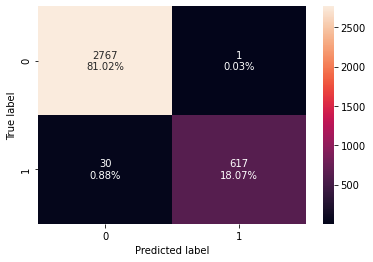

<IPython.core.display.Javascript object>

In [141]:
confusion_matrix_sklearn(bagging_wt, X_train, y_train)

In [142]:
bagging_wt_model_train_perf = model_performance_classification_sklearn_with_threshold(
    bagging_wt, X_train, y_train
)

print("Training performance:")
bagging_wt_model_train_perf

Training performance:


,Accuracy Score,Recall Score,Precision Score,F1 Score
0,0.990922,0.953632,0.998382,0.975494


<IPython.core.display.Javascript object>

#### Checking the model performance on the testing set

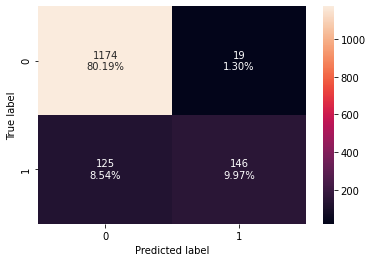

<IPython.core.display.Javascript object>

In [143]:
confusion_matrix_sklearn(bagging_wt, X_test, y_test)

In [144]:
bagging_wt_model_test_perf = model_performance_classification_sklearn_with_threshold(
    bagging_wt, X_test, y_test
)

print("Test set performance:")
bagging_wt_model_test_perf

Test set performance:


,Accuracy Score,Recall Score,Precision Score,F1 Score
0,0.901639,0.538745,0.884848,0.669725


<IPython.core.display.Javascript object>

* Bagging classifier with a weighted decision tree poorly performed compared to the the unweighted Bagging classifier.
* There is still an overfitting

## Decision Tree Hyperparameter Tuning

In [145]:
# Choose the type of classifier.
dtree_tuned = DecisionTreeClassifier(random_state=1, class_weight={0: 0.18, 1: 0.82})

# Grid of parameters to choose from
parameters = {
    "max_depth": list(np.arange(2, 20)) + [None],
    "min_samples_leaf": [1, 3, 5, 7, 10],
    "max_leaf_nodes": [2, 3, 5, 10, 15] + [None],
    "min_impurity_decrease": [0.00001, 0.0001, 0.001, 0.01, 0.1, 0.0],
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_tuned = grid_obj.best_estimator_


# Fit the best algorithm to the data.
dtree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.18, 1: 0.82}, max_depth=15,
                       min_impurity_decrease=1e-05, random_state=1)

<IPython.core.display.Javascript object>

#### Checking performance on training set

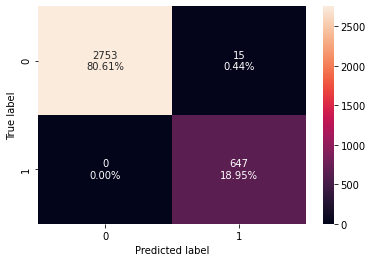

<IPython.core.display.Javascript object>

In [146]:
confusion_matrix_sklearn(dtree_tuned, X_train, y_train)

In [147]:
dtree_tuned_model_train_perf = model_performance_classification_sklearn_with_threshold(
    dtree_tuned, X_train, y_train
)

print("Training performance:")
dtree_tuned_model_train_perf

Training performance:


,Accuracy Score,Recall Score,Precision Score,F1 Score
0,0.995608,1.0,0.977341,0.988541


<IPython.core.display.Javascript object>

#### Checking performance on testing set

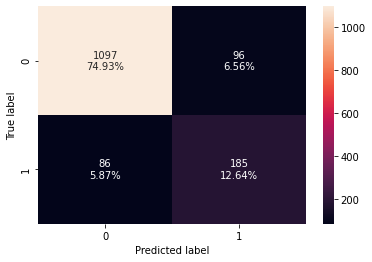

<IPython.core.display.Javascript object>

In [148]:
confusion_matrix_sklearn(dtree_tuned, X_test, y_test)

In [149]:
dtree_tuned_model_test_perf = model_performance_classification_sklearn_with_threshold(
    dtree_tuned, X_test, y_test
)

print("Test set performance:")
dtree_tuned_model_test_perf

Test set performance:


,Accuracy Score,Recall Score,Precision Score,F1 Score
0,0.875683,0.682657,0.658363,0.67029


<IPython.core.display.Javascript object>

* Except the Recall score, the other performance metrics of the tuned Decision Tree Classifier model have decreased.
* The model is still overfitting after hyperparameters tuning and is also not generalised.

### Plotting the feature importance of each variable

In [150]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        dtree_tuned.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                   Imp
DurationOfPitch               0.153259
Age                           0.148315
Passport_1                    0.099690
MonthlyIncome                 0.068086
Designation_Executive         0.060440
NumberOfTrips                 0.052816
PreferredPropertyStar_5.0     0.034442
CityTier_3                    0.030606
Occupation_Large Business     0.026110
PitchSatisfactionScore_3      0.023925
Gender_Male                   0.022682
PitchSatisfactionScore_4      0.022557
MaritalStatus_Married         0.022049
MaritalStatus_Single          0.019552
TypeofContact_Self Enquiry    0.017222
Occupation_Small Business     0.016529
PreferredPropertyStar_4.0     0.016397
NumberOfFollowups_6.0         0.015836
Occupation_Salaried           0.015570
PitchSatisfactionScore_5      0.013458
OwnCar_1                      0.012044
NumberOfFollowups_4.0         0.010839
NumberOfFollowups_5.0         0.010747
MaritalStatus_Unmarried       0.010265
Designation_Senior Manage

<IPython.core.display.Javascript object>

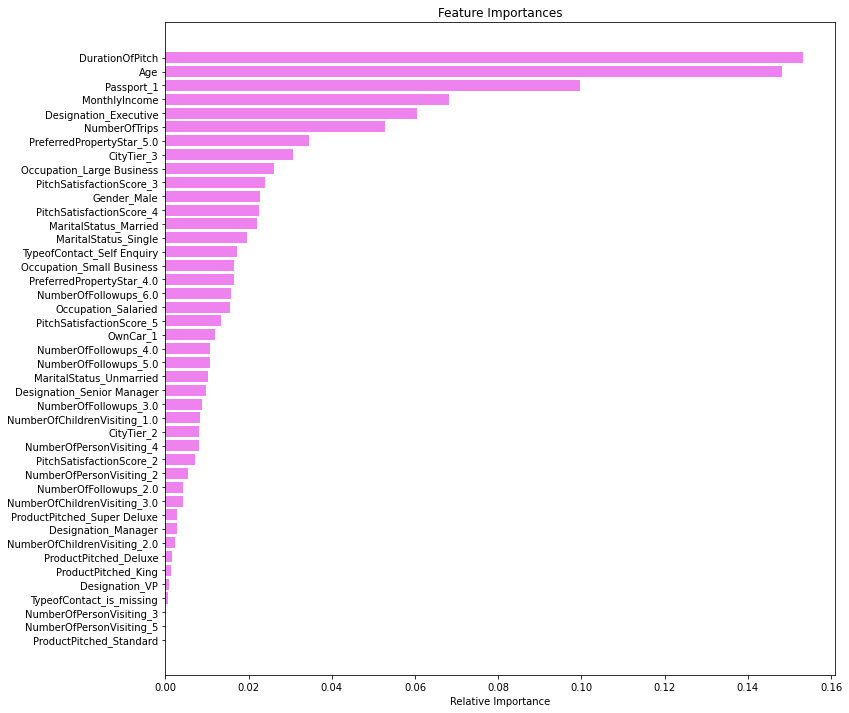

<IPython.core.display.Javascript object>

In [151]:
feature_names = X_train.columns
importances = dtree_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- DurationOfPitch is the most important feature, in addition to Age and Passport, for tuned decision tree model

## Random Forest Hyperparameter Tuning

In [152]:
# Choose the type of classifier.
rf_tuned = RandomForestClassifier(
    criterion="gini", class_weight={0: 0.18, 1: 0.82}, random_state=1
)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [10, 20, 50, 80, 150, 200, 250],
    "min_samples_leaf": np.arange(5, 10),
    "max_features": np.arange(0.2, 0.7, 0.1),
    "max_samples": np.arange(0.3, 0.7, 0.1),
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.18, 1: 0.82},
                       max_features=0.6000000000000001,
                       max_samples=0.6000000000000001, min_samples_leaf=5,
                       n_estimators=50, random_state=1)

<IPython.core.display.Javascript object>

#### Checking the model performance on the training set

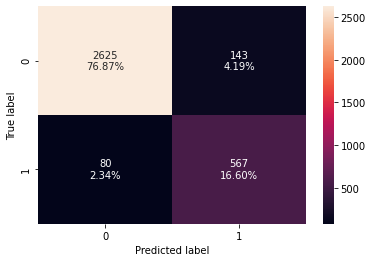

<IPython.core.display.Javascript object>

In [153]:
confusion_matrix_sklearn(rf_tuned, X_train, y_train)

In [154]:
rf_tuned_model_train_perf = model_performance_classification_sklearn_with_threshold(
    rf_tuned, X_train, y_train
)

print("Training performance:")
rf_tuned_model_train_perf

Training performance:


,Accuracy Score,Recall Score,Precision Score,F1 Score
0,0.9347,0.876352,0.798592,0.835667


<IPython.core.display.Javascript object>

#### Checking the model performance on the testing set

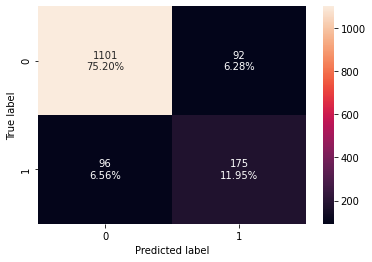

<IPython.core.display.Javascript object>

In [155]:
confusion_matrix_sklearn(rf_tuned, X_test, y_test)

In [156]:
rf_tuned_model_test_perf = model_performance_classification_sklearn_with_threshold(
    rf_tuned, X_test, y_test
)

print("Test set performance:")
rf_tuned_model_test_perf

Test set performance:


,Accuracy Score,Recall Score,Precision Score,F1 Score
0,0.871585,0.645756,0.655431,0.650558


<IPython.core.display.Javascript object>

- The Random Forest model with hyperparameters tuning is performing less on training set than the Random Forest model with default parameters
- But it generalised better
- Nevetherless, both Random Forest with hyperparameters tuning and Random Forest with default parameters are overfitting models.

In [157]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        rf_tuned.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                   Imp
Passport_1                    0.132128
Age                           0.126143
MonthlyIncome                 0.110623
DurationOfPitch               0.104621
Designation_Executive         0.073140
NumberOfTrips                 0.053843
PreferredPropertyStar_5.0     0.033323
CityTier_3                    0.032465
MaritalStatus_Married         0.026698
MaritalStatus_Single          0.025679
Gender_Male                   0.019180
TypeofContact_Self Enquiry    0.017042
PitchSatisfactionScore_4      0.015939
Occupation_Salaried           0.015497
OwnCar_1                      0.014913
PitchSatisfactionScore_3      0.014344
MaritalStatus_Unmarried       0.013915
PitchSatisfactionScore_5      0.012964
Occupation_Small Business     0.011768
PreferredPropertyStar_4.0     0.011441
NumberOfFollowups_6.0         0.010819
NumberOfChildrenVisiting_1.0  0.010223
Occupation_Large Business     0.009534
NumberOfFollowups_5.0         0.009057
NumberOfFollowups_4.0    

<IPython.core.display.Javascript object>

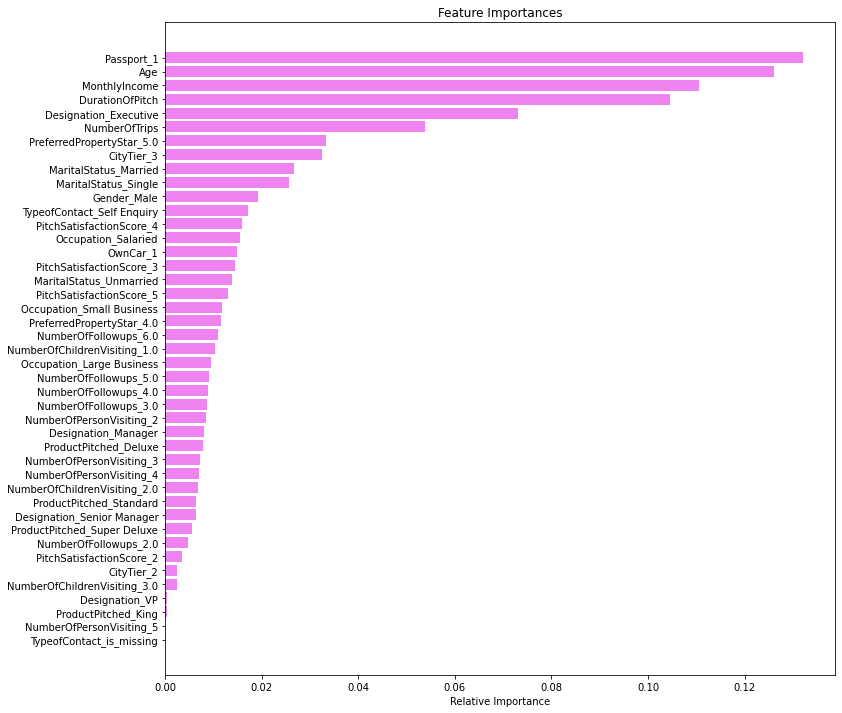

<IPython.core.display.Javascript object>

In [158]:
feature_names = X_train.columns
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- Passport is the most important feature, in addition to Age and MonthlyIncome, for the tuned Random Forest model.

### Tuning Bagging Classifier with Decision Tree Classifier

In [159]:
# grid search for bagging classifier
cl1 = DecisionTreeClassifier(random_state=1)
param_grid = {
    "base_estimator": [cl1],
    "n_estimators": [5, 7, 15, 51, 101],
    "max_features": [0.7, 0.8, 0.9, 1],
}

grid = GridSearchCV(
    BaggingClassifier(random_state=1, bootstrap=True),
    param_grid=param_grid,
    scoring="f1",
    cv=5,
)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=BaggingClassifier(random_state=1),
             param_grid={'base_estimator': [DecisionTreeClassifier(random_state=1)],
                         'max_features': [0.7, 0.8, 0.9, 1],
                         'n_estimators': [5, 7, 15, 51, 101]},
             scoring='f1')

<IPython.core.display.Javascript object>

In [160]:
## getting the best estimator
bagging_estimator = grid.best_estimator_

<IPython.core.display.Javascript object>

In [161]:
bagging_estimator.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1),
                  max_features=0.9, n_estimators=101, random_state=1)

<IPython.core.display.Javascript object>

#### Checking the model performance on the training set

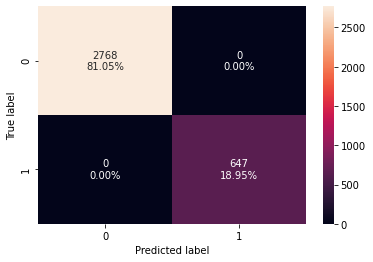

<IPython.core.display.Javascript object>

In [162]:
confusion_matrix_sklearn(bagging_estimator, X_train, y_train)

In [163]:
bagging_estimator_model_train_perf = model_performance_classification_sklearn_with_threshold(
    bagging_estimator, X_train, y_train
)

print("Training performance:")
bagging_estimator_model_train_perf

Training performance:


,Accuracy Score,Recall Score,Precision Score,F1 Score
0,1.0,1.0,1.0,1.0


<IPython.core.display.Javascript object>

#### Checking the model performance on the testing set

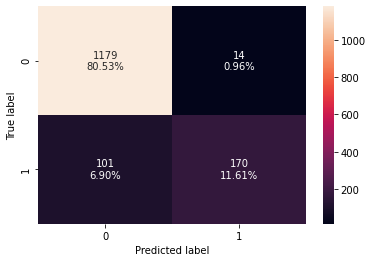

<IPython.core.display.Javascript object>

In [164]:
confusion_matrix_sklearn(bagging_estimator, X_test, y_test)

In [165]:
bagging_estimator_model_test_perf = model_performance_classification_sklearn_with_threshold(
    bagging_estimator, X_test, y_test
)

print("Test set performance:")
bagging_estimator_model_test_perf

Test set performance:


,Accuracy Score,Recall Score,Precision Score,F1 Score
0,0.921448,0.627306,0.923913,0.747253


<IPython.core.display.Javascript object>

- The Tuned Bagging Classifier model with Decision Tree is generalised better than Bagging Classifier model (unweighted and weighted)
- The metric performances in the tuned bagging are all better than the bagging model with default parameters

### Tuning Bagging Classifier with Random Forest Classifier

In [166]:
# grid search for bagging classifier
cl2 = RandomForestClassifier(random_state=1)
param_grid = {
    "base_estimator": [cl2],
    "n_estimators": [5, 7, 15, 51, 101],
    "max_features": [0.7, 0.8, 0.9, 1],
}

grid = GridSearchCV(
    BaggingClassifier(random_state=1, bootstrap=True),
    param_grid=param_grid,
    scoring="f1",
    cv=5,
)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=BaggingClassifier(random_state=1),
             param_grid={'base_estimator': [RandomForestClassifier(random_state=1)],
                         'max_features': [0.7, 0.8, 0.9, 1],
                         'n_estimators': [5, 7, 15, 51, 101]},
             scoring='f1')

<IPython.core.display.Javascript object>

In [167]:
## getting the best estimator
bagging_rf = grid.best_estimator_

<IPython.core.display.Javascript object>

In [168]:
bagging_rf.fit(X_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(random_state=1),
                  max_features=0.9, n_estimators=7, random_state=1)

<IPython.core.display.Javascript object>

#### Checking the model performance on the training set

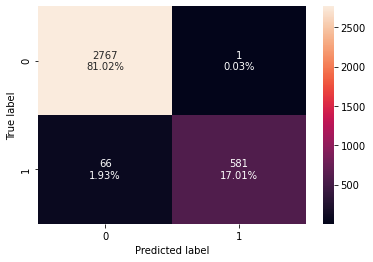

<IPython.core.display.Javascript object>

In [169]:
confusion_matrix_sklearn(bagging_rf, X_train, y_train)

In [170]:
bagging_rf_model_train_perf = model_performance_classification_sklearn_with_threshold(
    bagging_rf, X_train, y_train
)

print("Training performance:")
bagging_rf_model_train_perf

Training performance:


,Accuracy Score,Recall Score,Precision Score,F1 Score
0,0.980088,0.896445,0.998279,0.944625


<IPython.core.display.Javascript object>

#### Checking the model performance on the testing set

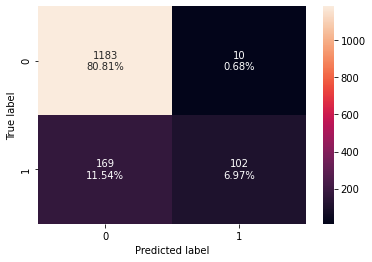

<IPython.core.display.Javascript object>

In [171]:
confusion_matrix_sklearn(bagging_rf, X_test, y_test)

In [172]:
bagging_rf_model_test_perf = model_performance_classification_sklearn_with_threshold(
    bagging_rf, X_test, y_test
)

print("Test set performance:")
bagging_rf_model_test_perf

Test set performance:


,Accuracy Score,Recall Score,Precision Score,F1 Score
0,0.877732,0.376384,0.910714,0.532637


<IPython.core.display.Javascript object>

* The tuned bagging classifier model performances with Random Forest are poor than the tuned bagging classifier model performances with Decision Tree

* Tuned Bagging Classifier performed better on the test
* Random Forest poorly performs on both train and test sets
* Bagging classifier performed better than Tuned Decision Tree classifier, Tuned Random Forest Classifier and Weighted Bagging Classifier but it performed less than Bagging Estimator

* Tuned Bagging Classifier performed well both on testing set in terms of accuracy, recall, precision and F1 scores

## Boosting Classifier

### AdaBoost Classifier

In [173]:
ab_classifier = AdaBoostClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [174]:
ab_classifier.fit(X_train, y_train)

AdaBoostClassifier(random_state=1)

<IPython.core.display.Javascript object>

#### Checking model performance on training set

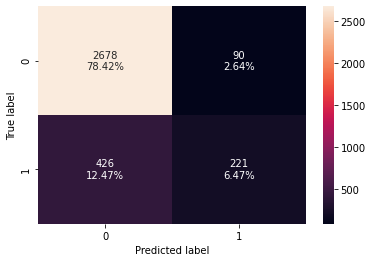

<IPython.core.display.Javascript object>

In [175]:
confusion_matrix_sklearn(ab_classifier, X_train, y_train)

In [176]:
ab_classifier_model_train_perf = model_performance_classification_sklearn_with_threshold(
    ab_classifier, X_train, y_train
)

print("Training performance:")
ab_classifier_model_train_perf

Training performance:


,Accuracy Score,Recall Score,Precision Score,F1 Score
0,0.848902,0.341577,0.710611,0.461378


<IPython.core.display.Javascript object>

#### Checking model performance on testing set

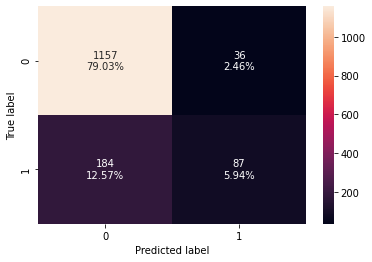

<IPython.core.display.Javascript object>

In [177]:
confusion_matrix_sklearn(ab_classifier, X_test, y_test)

In [178]:
ab_classifier_model_test_perf = model_performance_classification_sklearn_with_threshold(
    ab_classifier, X_test, y_test
)

print("Testing performance:")
ab_classifier_model_test_perf

Testing performance:


,Accuracy Score,Recall Score,Precision Score,F1 Score
0,0.849727,0.321033,0.707317,0.441624


<IPython.core.display.Javascript object>

- AdaBoost is generalizing well but it is giving poor performance, in terms of Recall and F1 score as well, as compared to the Tuned Bagging Classifier model.
- Precision score is not good enough as well

### Tuned Ada Boosting model

In [179]:
# Choose the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    # Let's try different max_depth for base_estimator
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": np.arange(0.1, 2, 0.1),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   n_estimators=90, random_state=1)

<IPython.core.display.Javascript object>

#### Checking model performance on training set

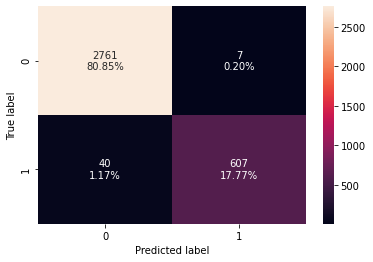

<IPython.core.display.Javascript object>

In [180]:
confusion_matrix_sklearn(abc_tuned, X_train, y_train)

In [181]:
abc_tuned_model_train_perf = model_performance_classification_sklearn_with_threshold(
    abc_tuned, X_train, y_train
)

print("Training performance:")
abc_tuned_model_train_perf

Training performance:


,Accuracy Score,Recall Score,Precision Score,F1 Score
0,0.986237,0.938176,0.988599,0.962728


<IPython.core.display.Javascript object>

#### Checking model performance on testing set

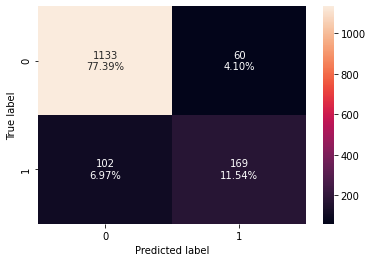

<IPython.core.display.Javascript object>

In [182]:
confusion_matrix_sklearn(abc_tuned, X_test, y_test)

In [183]:
abc_tuned_model_test_perf = model_performance_classification_sklearn_with_threshold(
    abc_tuned, X_test, y_test
)

print("Testing performance:")
abc_tuned_model_test_perf

Testing performance:


,Accuracy Score,Recall Score,Precision Score,F1 Score
0,0.889344,0.623616,0.737991,0.676


<IPython.core.display.Javascript object>

- The Tuned Ada Boosting Model is performing better than the Ada Boosting with default parameters
- However, the model shows an overfitting and it does not generalize well
- The model doesn't identify well those who purchased the packages

In [184]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        abc_tuned.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                   Imp
MonthlyIncome                 0.266022
Age                           0.153068
DurationOfPitch               0.135780
NumberOfTrips                 0.051182
PreferredPropertyStar_5.0     0.031794
PitchSatisfactionScore_4      0.025884
Passport_1                    0.022448
CityTier_3                    0.021944
Gender_Male                   0.018188
OwnCar_1                      0.017721
MaritalStatus_Single          0.015050
Designation_Executive         0.014545
NumberOfPersonVisiting_4      0.014081
Occupation_Salaried           0.013965
TypeofContact_Self Enquiry    0.013794
PitchSatisfactionScore_5      0.013710
Designation_Senior Manager    0.012026
PitchSatisfactionScore_3      0.011407
NumberOfFollowups_6.0         0.010945
Occupation_Small Business     0.010835
MaritalStatus_Unmarried       0.010681
PreferredPropertyStar_4.0     0.009834
NumberOfPersonVisiting_2      0.009678
NumberOfFollowups_5.0         0.008813
ProductPitched_Deluxe    

<IPython.core.display.Javascript object>

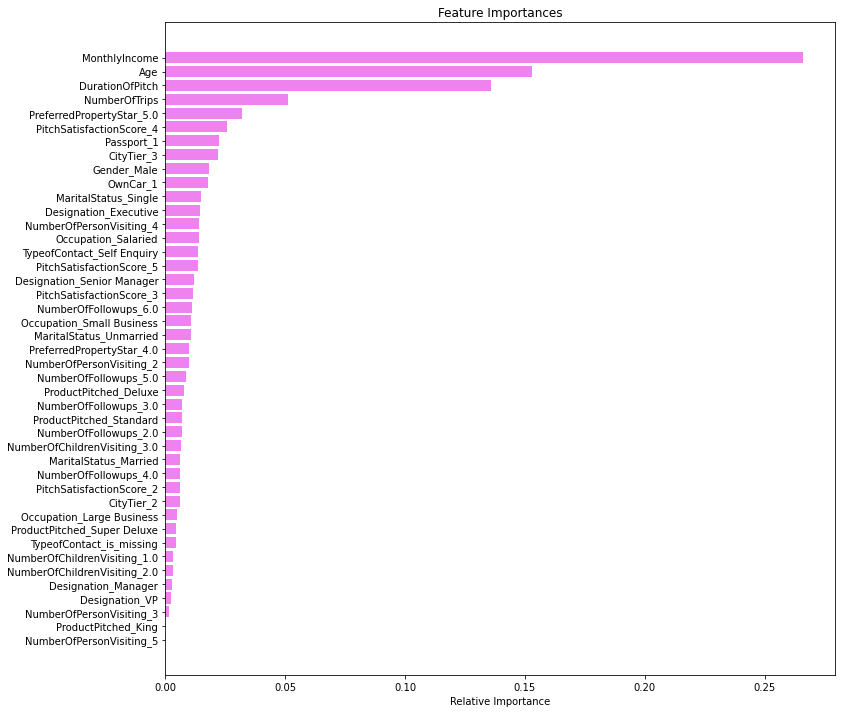

<IPython.core.display.Javascript object>

In [185]:
importances = abc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- MonthlyIncome is the most important feature, in addition to Age and DurationOfPitch, for the tuned Ada boosting model.

### Gradient Boosting Classifier

In [186]:
gb_classifier = GradientBoostingClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [187]:
gb_classifier.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

<IPython.core.display.Javascript object>

#### Checking model performance on training set

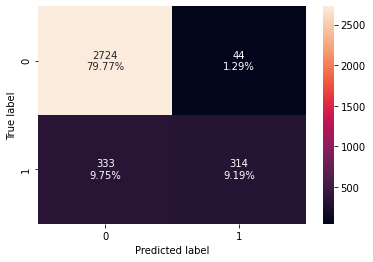

<IPython.core.display.Javascript object>

In [188]:
confusion_matrix_sklearn(gb_classifier, X_train, y_train)

In [189]:
gb_classifier_model_train_perf = model_performance_classification_sklearn_with_threshold(
    gb_classifier, X_train, y_train
)

print("Training performance:")
gb_classifier_model_train_perf

Training performance:


,Accuracy Score,Recall Score,Precision Score,F1 Score
0,0.889605,0.485317,0.877095,0.624876


<IPython.core.display.Javascript object>

#### Checking model performance on testing set

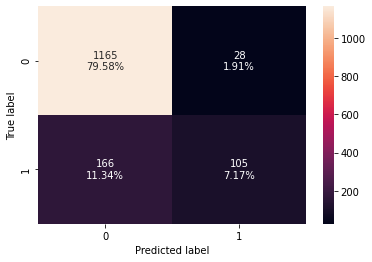

<IPython.core.display.Javascript object>

In [190]:
confusion_matrix_sklearn(gb_classifier, X_test, y_test)

In [191]:
gb_classifier_model_test_perf = model_performance_classification_sklearn_with_threshold(
    gb_classifier, X_test, y_test
)

print("Testing performance:")
gb_classifier_model_test_perf

Testing performance:


,Accuracy Score,Recall Score,Precision Score,F1 Score
0,0.867486,0.387454,0.789474,0.519802


<IPython.core.display.Javascript object>

- Gradient boosting also generalised well but the performance metrics are not looking high even if it gives better results than Adaboost classifier.

### Tuned Gradient Boosting model

In [192]:
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": [100, 150, 200, 250],
    "subsample": [0.8, 0.9, 1],
    "max_features": [0.7, 0.8, 0.9, 1],
    "max_depth": [3, 5, 7, 10],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(f1_score)


# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_depth=10, max_features=0.7, n_estimators=250,
                           random_state=1, subsample=0.9)

<IPython.core.display.Javascript object>

#### Checking model performance on training set

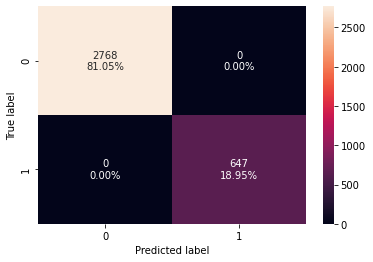

<IPython.core.display.Javascript object>

In [193]:
confusion_matrix_sklearn(gbc_tuned, X_train, y_train)

In [194]:
gbc_tuned_model_train_perf = model_performance_classification_sklearn_with_threshold(
    gbc_tuned, X_train, y_train
)

print("Training performance:")
gbc_tuned_model_train_perf

Training performance:


,Accuracy Score,Recall Score,Precision Score,F1 Score
0,1.0,1.0,1.0,1.0


<IPython.core.display.Javascript object>

#### Checking model performance on testing set

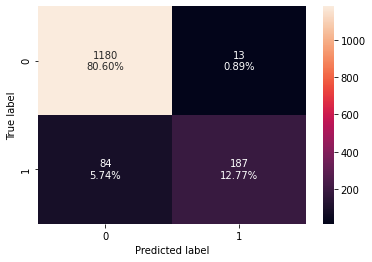

<IPython.core.display.Javascript object>

In [195]:
confusion_matrix_sklearn(gbc_tuned, X_test, y_test)

In [196]:
gbc_tuned_model_test_perf = model_performance_classification_sklearn_with_threshold(
    gbc_tuned, X_test, y_test
)

print("Testing performance:")
gbc_tuned_model_test_perf

Testing performance:


,Accuracy Score,Recall Score,Precision Score,F1 Score
0,0.933743,0.690037,0.935,0.794055


<IPython.core.display.Javascript object>

- Tuned Gradient boosting performed better than the simple Gradient boosting
- Accuracy and Precision scores look good and the the Recall and F1 scores are not too bad

In [197]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        gbc_tuned.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                   Imp
Age                           0.147427
MonthlyIncome                 0.129667
DurationOfPitch               0.124510
Passport_1                    0.066907
NumberOfTrips                 0.060142
Designation_Executive         0.051492
CityTier_3                    0.035129
PreferredPropertyStar_5.0     0.028890
TypeofContact_Self Enquiry    0.026265
Gender_Male                   0.025230
PitchSatisfactionScore_3      0.020128
Occupation_Small Business     0.018685
MaritalStatus_Single          0.018461
PitchSatisfactionScore_5      0.018118
PitchSatisfactionScore_4      0.017684
Occupation_Large Business     0.017669
PreferredPropertyStar_4.0     0.015759
Occupation_Salaried           0.014583
MaritalStatus_Unmarried       0.013915
MaritalStatus_Married         0.011822
NumberOfFollowups_6.0         0.011814
NumberOfFollowups_5.0         0.010249
OwnCar_1                      0.009670
NumberOfPersonVisiting_2      0.009492
ProductPitched_Deluxe    

<IPython.core.display.Javascript object>

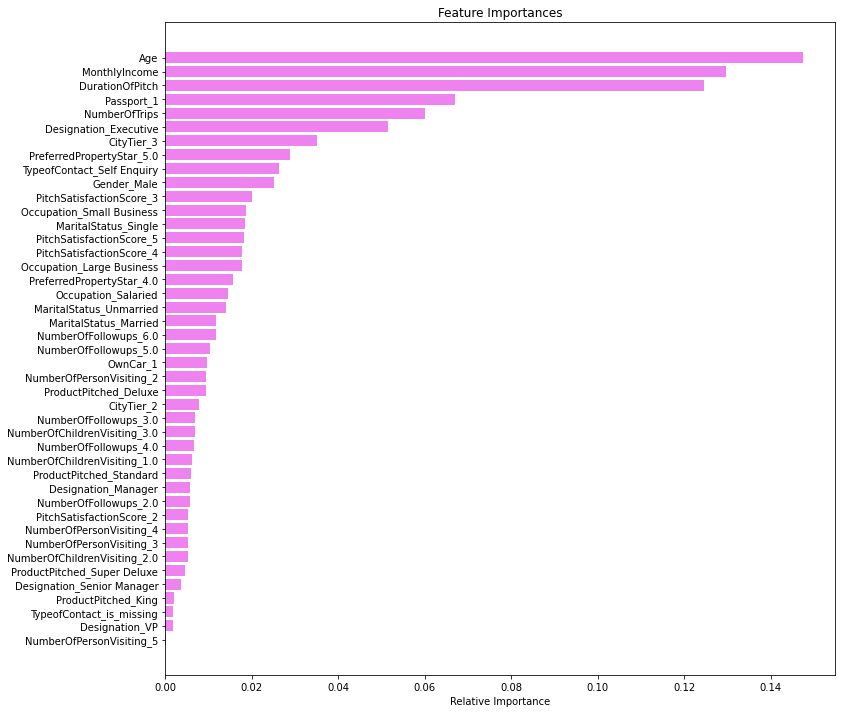

<IPython.core.display.Javascript object>

In [198]:
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- Age is the most important feature, in addition to MonthlyIncome and DurationOfPitch, for the tuned Gradient boosting model.

### XGBoost Classifier

In [199]:
xgb_class = XGBClassifier(random_state=1, eval_metric="logloss")

<IPython.core.display.Javascript object>

In [200]:
xgb_class.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

#### Checking model performance on training set

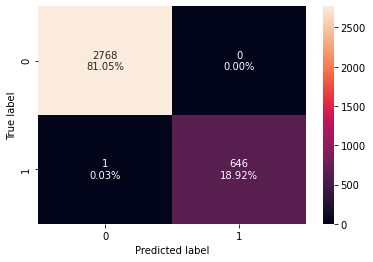

<IPython.core.display.Javascript object>

In [201]:
confusion_matrix_sklearn(xgb_class, X_train, y_train)

In [202]:
xgb_class_model_train_perf = model_performance_classification_sklearn_with_threshold(
    xgb_class, X_train, y_train
)

print("Training performance:")
xgb_class_model_train_perf

Training performance:


,Accuracy Score,Recall Score,Precision Score,F1 Score
0,0.999707,0.998454,1.0,0.999227


<IPython.core.display.Javascript object>

#### Checking model performance on testing set

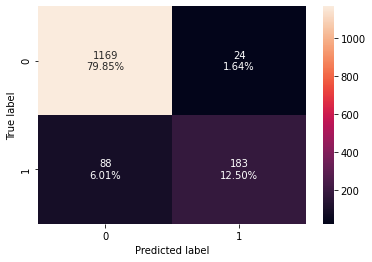

<IPython.core.display.Javascript object>

In [203]:
confusion_matrix_sklearn(xgb_class, X_test, y_test)

In [204]:
xgb_class_model_test_perf = model_performance_classification_sklearn_with_threshold(
    xgb_class, X_test, y_test
)

print("Testing performance:")
xgb_class_model_test_perf

Testing performance:


,Accuracy Score,Recall Score,Precision Score,F1 Score
0,0.923497,0.675277,0.884058,0.76569


<IPython.core.display.Javascript object>

- XGBoost with default parameters is giving better results than Adaboost and Grandient boosting model

### Tuned XGBoost model

In [205]:
# Choose the type of classifier.
xgb_tuned = XGBClassifier(random_state=1, eval_metric="logloss")

# Grid of parameters to choose from
## add from
parameters = {
    "n_estimators": np.arange(10, 100, 20),
    "scale_pos_weight": [0, 1, 2, 5],
    "subsample": [0.5, 0.7, 0.9, 1],
    "learning_rate": [0.01, 0.1, 0.2, 0.05],
    "gamma": [0, 1, 3],
    "colsample_bytree": [0.5, 0.7, 0.9, 1],
    "colsample_bylevel": [0.5, 0.7, 0.9, 1],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.7,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=1, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=90, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=5, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

#### Checking model performance on training set

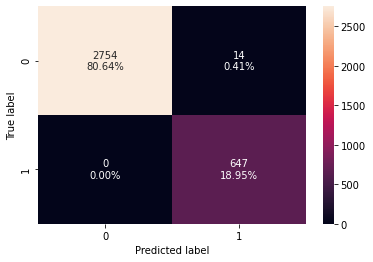

<IPython.core.display.Javascript object>

In [206]:
confusion_matrix_sklearn(xgb_tuned, X_train, y_train)

In [207]:
xgb_tuned_model_train_perf = model_performance_classification_sklearn_with_threshold(
    xgb_tuned, X_train, y_train
)

print("Training performance:")
xgb_tuned_model_train_perf

Training performance:


,Accuracy Score,Recall Score,Precision Score,F1 Score
0,0.9959,1.0,0.97882,0.989297


<IPython.core.display.Javascript object>

#### Checking model performance on testing set

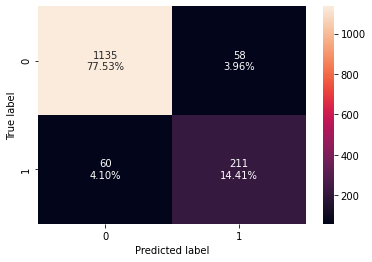

<IPython.core.display.Javascript object>

In [208]:
confusion_matrix_sklearn(xgb_tuned, X_test, y_test)

In [209]:
xgb_tuned_model_test_perf = model_performance_classification_sklearn_with_threshold(
    xgb_tuned, X_test, y_test
)

print("Testing performance:")
xgb_tuned_model_test_perf

Testing performance:


,Accuracy Score,Recall Score,Precision Score,F1 Score
0,0.919399,0.778598,0.784387,0.781481


<IPython.core.display.Javascript object>

In [210]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        xgb_tuned.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                   Imp
Passport_1                    0.088353
Designation_Executive         0.087068
NumberOfFollowups_6.0         0.034365
MaritalStatus_Single          0.034121
Designation_Senior Manager    0.031516
ProductPitched_Standard       0.031453
PreferredPropertyStar_5.0     0.031411
MaritalStatus_Married         0.030730
Designation_VP                0.029180
NumberOfFollowups_2.0         0.028293
CityTier_3                    0.027204
ProductPitched_Super Deluxe   0.027163
Occupation_Large Business     0.026213
MaritalStatus_Unmarried       0.025207
PitchSatisfactionScore_5      0.024039
DurationOfPitch               0.022619
Age                           0.022555
PitchSatisfactionScore_4      0.021851
CityTier_2                    0.021283
TypeofContact_Self Enquiry    0.020682
Occupation_Salaried           0.019701
Designation_Manager           0.019518
PitchSatisfactionScore_3      0.019201
NumberOfFollowups_5.0         0.018979
NumberOfTrips            

<IPython.core.display.Javascript object>

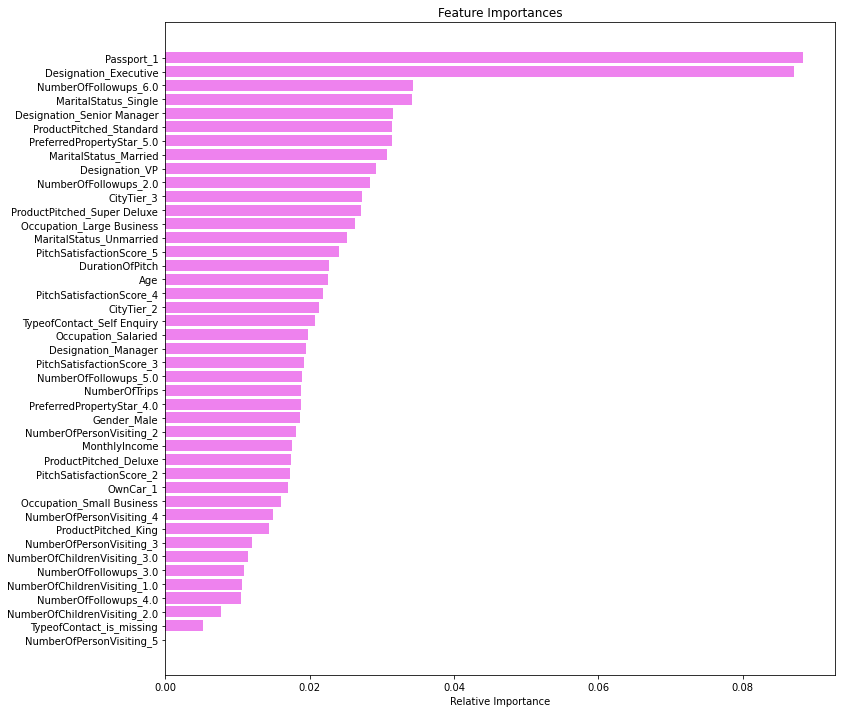

<IPython.core.display.Javascript object>

In [211]:
feature_names = X_train.columns
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- In tuned XGBoost, Passport is the most important feature followed by features - Designation and NumberOfFollowup

## Stacking Model

**Now, let's build a stacking model with the tuned models - decision tree, random forest, and gradient boosting, then use XGBoost to get the final prediction.**

In [212]:
estimators = [
    ("Decision Tree", dtree_tuned),
    ("Random Forest", rf_tuned),
    ("Gradient Boosting", gbc_tuned),
]
final_estimator = XGBClassifier(random_state=1, eval_metric="logloss")

<IPython.core.display.Javascript object>

In [213]:
stacking_estimator = StackingClassifier(
    estimators=estimators, final_estimator=final_estimator, cv=5
)
stacking_estimator.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('Decision Tree',
                                DecisionTreeClassifier(class_weight={0: 0.18,
                                                                     1: 0.82},
                                                       max_depth=15,
                                                       min_impurity_decrease=1e-05,
                                                       random_state=1)),
                               ('Random Forest',
                                RandomForestClassifier(class_weight={0: 0.18,
                                                                     1: 0.82},
                                                       max_features=0.6000000000000001,
                                                       max_samples=0.6000000000000001,
                                                       min_samples_leaf=5,
                                                       n_estimators=50,
               

<IPython.core.display.Javascript object>

#### Checking model performance on training set

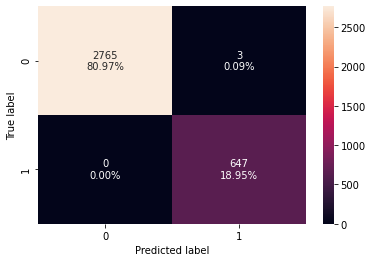

<IPython.core.display.Javascript object>

In [214]:
confusion_matrix_sklearn(stacking_estimator, X_train, y_train)

In [215]:
stacking_estimator_model_train_perf = model_performance_classification_sklearn_with_threshold(
    stacking_estimator, X_train, y_train
)

print("Training performance:")
stacking_estimator_model_train_perf

Training performance:


,Accuracy Score,Recall Score,Precision Score,F1 Score
0,0.999122,1.0,0.995385,0.997687


<IPython.core.display.Javascript object>

#### Checking model performance on testing set

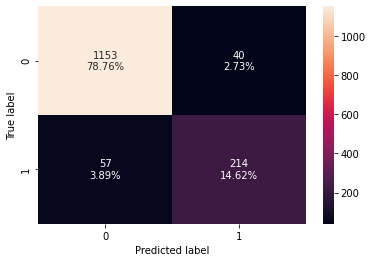

<IPython.core.display.Javascript object>

In [216]:
confusion_matrix_sklearn(stacking_estimator, X_test, y_test)

In [217]:
stacking_estimator_model_test_perf = model_performance_classification_sklearn_with_threshold(
    stacking_estimator, X_test, y_test
)

print("Testing performance:")
stacking_estimator_model_test_perf

Testing performance:


,Accuracy Score,Recall Score,Precision Score,F1 Score
0,0.933743,0.789668,0.84252,0.815238


<IPython.core.display.Javascript object>

### Comparing all the models

In [218]:
# Training performance comparison

models_train_comp_df = pd.concat(
    [
        dtree_model_train_perf.T,
        dtree_tuned_model_train_perf.T,
        rf_model_train_perf.T,
        rf_tuned_model_train_perf.T,
        bagging_model_train_perf.T,
        bagging_wt_model_train_perf.T,
        bagging_estimator_model_train_perf.T,
        bagging_rf_model_train_perf.T,
        ab_classifier_model_train_perf.T,
        gb_classifier_model_train_perf.T,
        xgb_class_model_train_perf.T,
        abc_tuned_model_train_perf.T,
        gbc_tuned_model_train_perf.T,
        xgb_tuned_model_train_perf.T,
        stacking_estimator_model_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree ",
    "Tuned Decision Tree",
    "Random Forest ",
    "Tuned Random Forest",
    "Bagging Classifier",
    "Weighted Bagging",
    "Bagging DTree",
    "Bagging RForest",
    "Adaboost",
    "Gradient Boosting",
    "XGB Classifer",
    "Tuned Adaboost",
    "Tuned Gradient Boosting",
    "Tuned XGB",
    "Stacking Classifier",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Tuned Decision Tree,Random Forest,Tuned Random Forest,Bagging Classifier,Weighted Bagging,Bagging DTree,Bagging RForest,Adaboost,Gradient Boosting,XGB Classifer,Tuned Adaboost,Tuned Gradient Boosting,Tuned XGB,Stacking Classifier
Accuracy Score,1.0,0.995608,1.0,0.934700,0.993265,0.990922,1.0,0.980088,0.848902,0.889605,0.999707,0.986237,1.0,0.995900,0.999122
Recall Score,1.0,1.000000,1.0,0.876352,0.964451,0.953632,1.0,0.896445,0.341577,0.485317,0.998454,0.938176,1.0,1.000000,1.000000
Precision Score,1.0,0.977341,1.0,0.798592,1.000000,0.998382,1.0,0.998279,0.710611,0.877095,1.000000,0.988599,1.0,0.978820,0.995385
F1 Score,1.0,0.988541,1.0,0.835667,0.981904,0.975494,1.0,0.944625,0.461378,0.624876,0.999227,0.962728,1.0,0.989297,0.997687


<IPython.core.display.Javascript object>

In [219]:
# Testing performance comparison

models_test_comp_df = pd.concat(
    [
        dtree_model_test_perf.T,
        dtree_tuned_model_test_perf.T,
        rf_model_test_perf.T,
        rf_tuned_model_test_perf.T,
        bagging_model_test_perf.T,
        bagging_wt_model_test_perf.T,
        bagging_estimator_model_test_perf.T,
        bagging_rf_model_test_perf.T,
        ab_classifier_model_test_perf.T,
        gb_classifier_model_test_perf.T,
        xgb_class_model_test_perf.T,
        abc_tuned_model_test_perf.T,
        gbc_tuned_model_test_perf.T,
        xgb_tuned_model_test_perf.T,
        stacking_estimator_model_test_perf.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree ",
    "Tuned Decision Tree",
    "Random Forest ",
    "Tuned Random Forest",
    "Bagging Classifier",
    "Weighted Bagging",
    "Bagging DTree",
    "Bagging RForest",
    "Adaboost",
    "Gradient Boosting",
    "XGB Classifer",
    "Tuned Adaboost",
    "Tuned Gradient Boosting",
    "Tuned XGB",
    "Stacking Classifier",
]

print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Tuned Decision Tree,Random Forest,Tuned Random Forest,Bagging Classifier,Weighted Bagging,Bagging DTree,Bagging RForest,Adaboost,Gradient Boosting,XGB Classifer,Tuned Adaboost,Tuned Gradient Boosting,Tuned XGB,Stacking Classifier
Accuracy Score,0.877732,0.875683,0.888661,0.871585,0.915984,0.901639,0.921448,0.877732,0.849727,0.867486,0.923497,0.889344,0.933743,0.919399,0.933743
Recall Score,0.678967,0.682657,0.428044,0.645756,0.612546,0.538745,0.627306,0.376384,0.321033,0.387454,0.675277,0.623616,0.690037,0.778598,0.789668
Precision Score,0.666667,0.658363,0.935484,0.655431,0.902174,0.884848,0.923913,0.910714,0.707317,0.789474,0.884058,0.737991,0.935000,0.784387,0.842520
F1 Score,0.672761,0.670290,0.587342,0.650558,0.729670,0.669725,0.747253,0.532637,0.441624,0.519802,0.765690,0.676000,0.794055,0.781481,0.815238


<IPython.core.display.Javascript object>

- The stacking classifier model is the best model here. It has the highest level of F1 score and the precision, recall and accuracy scores on the testing set look good.
- Gradient Boosting, XGB and Stacking classifier are the the top 3 models. They are all given comparable performance.

##  Business Recommendations

* The company has an affordable package in its portfolio that brings in the bulk of the volume of its sales, which is the Basic package.

* For all the packages offered, there is a greater demand for Male than for Female. The company needs to engage in more marketing to convey packages suitable for both the genders, in each designation type.

* No Divorced AVP purchased the packages and it is almost the case for clients who are Unmarried. The formulas currently offered are certainly not suitable for them. The marketing should adapt the offers for those marital status categories

* All the Executive Free Lancer contacted purchased the packages. They should be targeted more as it seems that the packages which have designed suit them well.

- The VP Large Business customers should be targeted at the age between 40-42 years old
- The VP Salaried customers should be targeted at the age between 58-60 years old
- The AVP Salaried should be targeted at the age between 39-42years old
- The Executive Free Lancer should be targeted at the age between 38 and 39 old
- The company should target more:
 - *AVP customers who earn less than 33K per month*
 - *Customers who have a passport (70% of them don't have one)*
 
 * The marketing Department of the company should put more effort to attract AVPs Large Business as no one in this category of designation purchased the packages
 
* Sales pitch satisfaction is a area to improve for the company because the scores allocated by customers in general are not great.
* The quality of the services in the hotel should be upgraded as the frequent Preferred hotel property rating by  customer is 3 (on a scale from 3 to 5)
* The age of customers who purchased the Basic package, the Executive customers is avering 30 years old.
* Most of the customers who purchased the packages are in CityTier 1, cities which have a developed and established real estate market. These cities tend to be highly developed, with desirable schools, 
 facilities, and businesses. The company should deploy much more in these categories of cities to increase its chances of selling its packages

* We can use this model to predict the customer who is more likely to purchase the newly introduced travel package